In [1]:
%run ./DataGen2.ipynb

In [2]:
class Standard_Param():
    def __init__(self, NumberOfClusters = 40):
        # Region of interest :
        self.x_lim = [0, 4] # micrometer
        self.y_lim = [0, 4]

        # Clusters :
        self.NumberOfClusters = NumberOfClusters
        self.LocPerCluster    = [24] * self.NumberOfClusters
        self.r                = [30] * self.NumberOfClusters # nm
        self.cluster_shape    = 'uniform'

        # Noise :
        self.NoisePercentage  = 0.5 # between 0 adnd 0.8
        self.UniformNoise     = True 
        
        # SMLM points : 
        self.mean_uncertainty      = 20
        self.dev_uncertainty       = 3
        self.N_photons             = 150
        
        # Scales : 
        self.NumberOfScales   = 1

In [3]:
def Call_DataGenerator(p):
    datagen = DataGenerator(x_lim = p.x_lim,
                        y_lim = p.y_lim,
                        NumberOfClusters = p.NumberOfClusters,
                        LocPerCluster = p.LocPerCluster,
                        r = p.r,
                        NoisePercentage = p.NoisePercentage,
                        NumberOfScales = p.NumberOfScales,
                        cluster_shape = p.cluster_shape,
                        UniformNoise = p.UniformNoise, 
                        mean_delta = p.mean_uncertainty, 
                        dev_delta = p.dev_uncertainty,
                        N_photons = p.N_photons)
    return datagen

In [5]:
def compute_T(N, sigma_s = 40.0, x_lim = [0,4], y_lim = [0,4]):
    csr = CsrGenerator(N=N, x_lim = x_lim, y_lim = y_lim)
    data = csr.GetAllData()
    P = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
    truelabels = data['labels_1'].to_numpy()
    
    Sigma1          = np.ones((P.shape[0], 2, 2)) * 0
    Sigma1[:, 0, 1] = 0
    Sigma1[:, 1, 0] = 0
    n1              = np.ones((P.shape[0], 1)).ravel()
    
    density_csr, G0 = compute_density(P, Sigma1, sigma_s)
    
    # Computing the standard T 
    av = np.mean(density_csr)
    sd = np.std(density_csr)
    T = av + 2 * sd
    if (T>= 1):
        print('T = ', T, ' is bigger than 1. There is a problem. ')
        return 0.99
    see_histogram(density_csr, T, 'vertical method')
    
    # Computing the horizontal T
    histo = plt.hist(density_csr, bins = 50)
    min_ = min(histo[0])
    max_ = max(histo[0])
    v = min_ + (max_ - min_)/10

    T_h = 1 # default value in case it is not found
    for i, x in enumerate(histo[1]):
        if i>0:
            if (histo[0][i-1] <= v):
                T_h = histo[1][i]
                break
    see_histogram(density_csr, T_h, 'horizontal method')
    
    return T, T_h

In [6]:
def compute_T_90_95(N, sigma_s = 40.0, x_lim = [0,4], y_lim = [0,4]):
    csr = CsrGenerator(N=N, x_lim = x_lim, y_lim = y_lim)
    data = csr.GetAllData()
    P = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
    truelabels = data['labels_1'].to_numpy()
    
    Sigma1          = np.ones((P.shape[0], 2, 2)) * 0
    Sigma1[:, 0, 1] = 0
    Sigma1[:, 1, 0] = 0
    n1              = np.ones((P.shape[0], 1)).ravel()
    
    density_csr, G0 = compute_density(P, Sigma1, sigma_s)
    
    # Computing T for 90% and for 95% 
    T90 = np.quantile(density_csr, 0.90)
    T95 = np.quantile(density_csr, 0.95)
    
        
    see_histogram(density_csr, T90, '90')
    see_histogram(density_csr, T95, '95')
    
    return T90, T95

In [13]:
def compute_T_95(N, sigma_s = 40.0, x_lim = [0,4], y_lim = [0,4]):
    csr = CsrGenerator(N=N, x_lim = x_lim, y_lim = y_lim)
    data = csr.GetAllData()
    P = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
    truelabels = data['labels_1'].to_numpy()
    
    Sigma1          = np.ones((P.shape[0], 2, 2)) * 0
    Sigma1[:, 0, 1] = 0
    Sigma1[:, 1, 0] = 0
    n1              = np.ones((P.shape[0], 1)).ravel()
    
    density_csr, G0 = compute_density(P, Sigma1, sigma_s)
    
    # Computing T 
    T = np.quantile(density_csr, 0.95)
        
    see_histogram(density_csr, T, '0.95 quantile')
    
    return T

<Figure size 720x576 with 0 Axes>

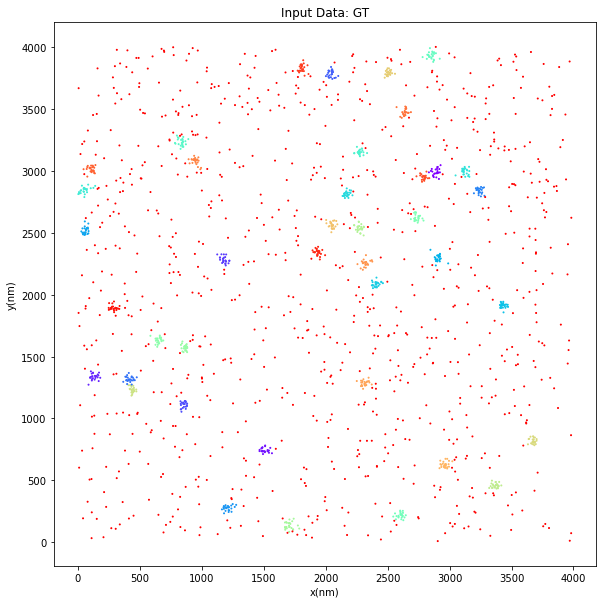

In [125]:
p = Standard_Param()
datagen = Call_DataGenerator(p)
plt.figure(figsize=(10,8))
datagen.plot_points()

In [126]:
N = len(datagen.GetPoints())
csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])

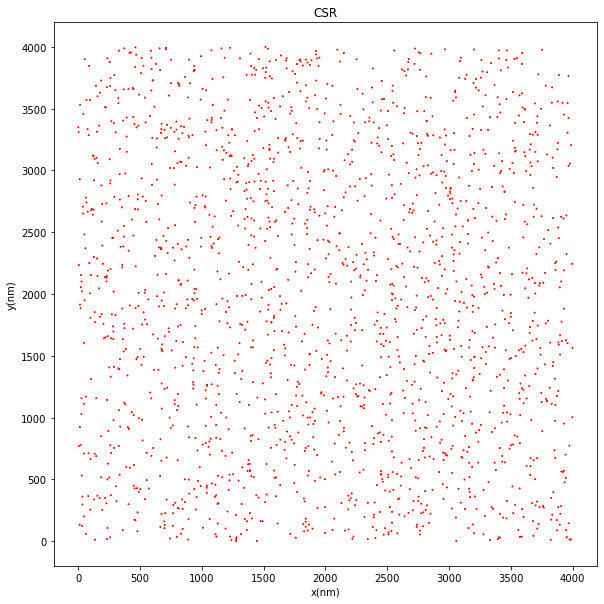

In [127]:
csr.plot_points()

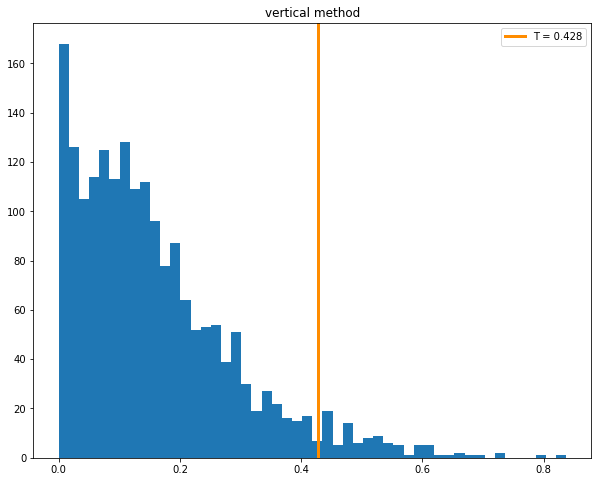

In [128]:
T = compute_T_95(N, sigma_s = 35.0, x_lim = [0,4], y_lim = [0,4])

In [129]:
df = datagen.GetAllData()
P = df[['x', 'y']].to_numpy()
Sigma1          = np.ones((P.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
sigma_s = 35
density, G = compute_density(P, Sigma1, sigma_s)

In [51]:
plt.hist(density, bins = 50)

(array([277., 110.,  80.,  75.,  53.,  66.,  53.,  46.,  32.,  29.,  31.,
         18.,  26.,  15.,  20.,  20.,  17.,  10.,  15.,  28.,  20.,  15.,
         11.,  11.,  24.,  14.,  18.,  12.,  14.,  18.,  12.,  15.,  18.,
         19.,  13.,  26.,  22.,  18.,  36.,  28.,  33.,  52.,  58.,  62.,
         66.,  78.,  67.,  66.,  38.,  15.]),
 array([8.56539380e-08, 1.98286644e-02, 3.96572432e-02, 5.94858220e-02,
        7.93144008e-02, 9.91429796e-02, 1.18971558e-01, 1.38800137e-01,
        1.58628716e-01, 1.78457295e-01, 1.98285874e-01, 2.18114452e-01,
        2.37943031e-01, 2.57771610e-01, 2.77600189e-01, 2.97428768e-01,
        3.17257346e-01, 3.37085925e-01, 3.56914504e-01, 3.76743083e-01,
        3.96571662e-01, 4.16400240e-01, 4.36228819e-01, 4.56057398e-01,
        4.75885977e-01, 4.95714556e-01, 5.15543134e-01, 5.35371713e-01,
        5.55200292e-01, 5.75028871e-01, 5.94857449e-01, 6.14686028e-01,
        6.34514607e-01, 6.54343186e-01, 6.74171765e-01, 6.94000343e-01,
        7.

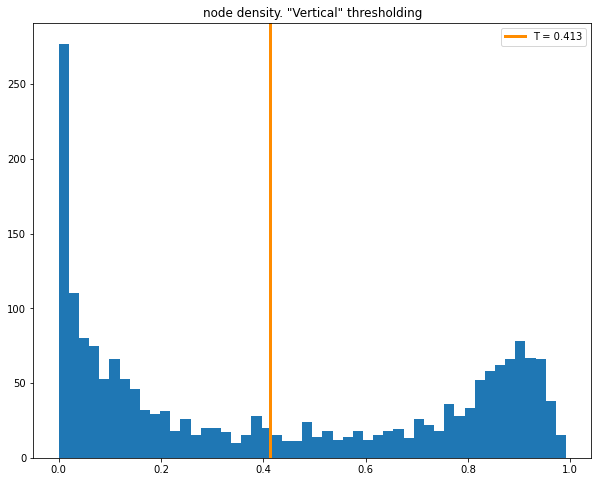

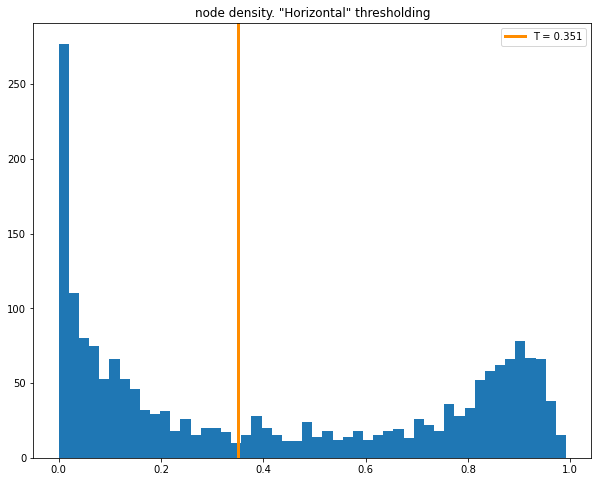

In [52]:
see_histogram(density, T, 'node density. "Vertical" thresholding')
see_histogram(density, hT, 'node density. "Horizontal" thresholding')

La prochaine cellule est une démonstration pour le standard, cette fois ci avec les incertitudes prises en compte. 

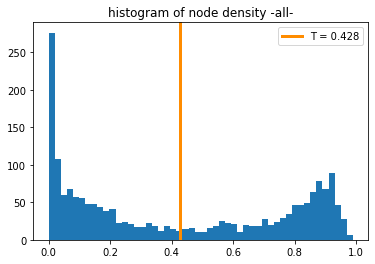

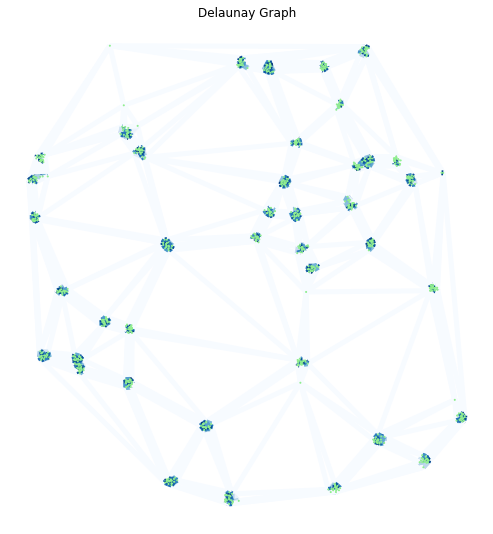

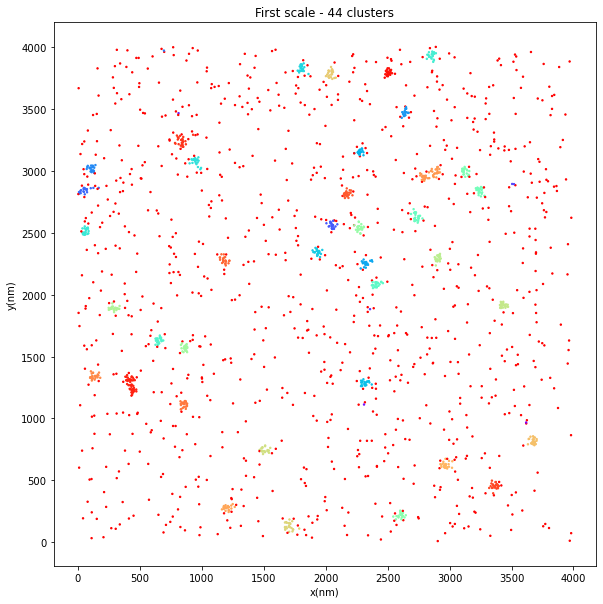

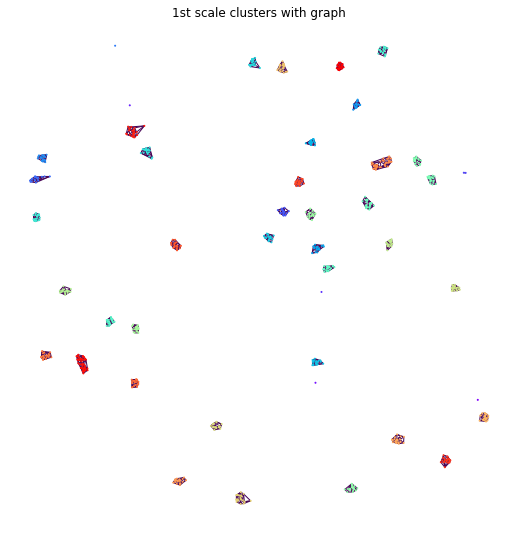

In [131]:
# thershold vertical 
labels = calling_graphic(df, sigma_s, T)

#threshold horizontal 
#calling_graphic(df, sigma_s, hT)

10
N =  150
N =  200
N =  250
N =  300
N =  350
N =  400
N =  450
N =  500
N =  550
N =  600
N =  650
N =  700
N =  750
55
N =  150
N =  200
N =  250
N =  300
N =  350
N =  400
N =  450
N =  500
N =  550
N =  600
N =  650
N =  700
N =  750
100
N =  150
N =  200
N =  250
N =  300
N =  350
N =  400
N =  450
N =  500
N =  550
N =  600
N =  650
N =  700
N =  750


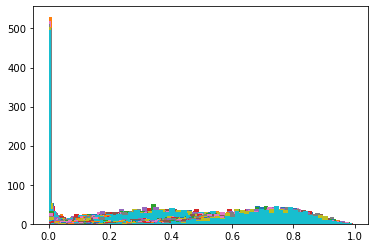

In [60]:
Sigma_s_s = [10, 55, 100]
Ns = np.arange(150, 751, 50).tolist()
#Ns = np.arange(1000, 2000, 200).tolist()

all_T_sd = []
all_T_av = []

for sigma_s in Sigma_s_s:
    print(sigma_s)
    T_N_sd = []
    T_N_av = []
    for N in Ns:
        print('N = ', N)
        Ts = []
        for i in range(10):
            T, hT = compute_T(N, sigma_s, x_lim = [0,2], y_lim = [0,2])
            Ts.append(hT) # CHANGE THIS LINE TO CHOOSE T OR hT. 
        Ts    = np.asarray(Ts)
        T_std = np.std(Ts)
        T_avg = np.mean(Ts)

        T_N_sd.append(T_std)
        T_N_av.append(T_avg)
    all_T_sd.append(T_N_sd)
    all_T_av.append(T_N_av)
    

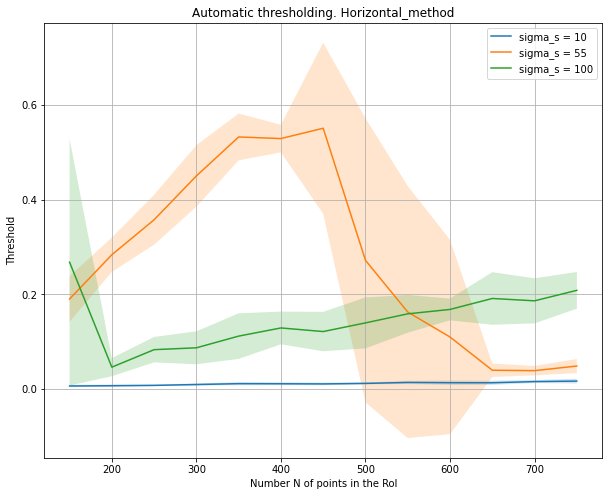

In [62]:

labels = ['sigma_s = ' + str(s) for s in Sigma_s_s]

x = Ns
plt.figure(figsize = (10,8))
for i, av in enumerate(all_T_av):
    av = np.asarray(av)
    sd = np.asarray(all_T_sd[i])
    plt.plot(x,av, label = labels[i])
    plt.fill_between(x, (av - sd), (av + sd), alpha=.2)

plt.title('Automatic thresholding. Horizontal_method')
plt.xlabel('Number N of points in the RoI')
plt.ylabel('Threshold')
plt.legend()
plt.grid()
plt.show()

10
N =  300


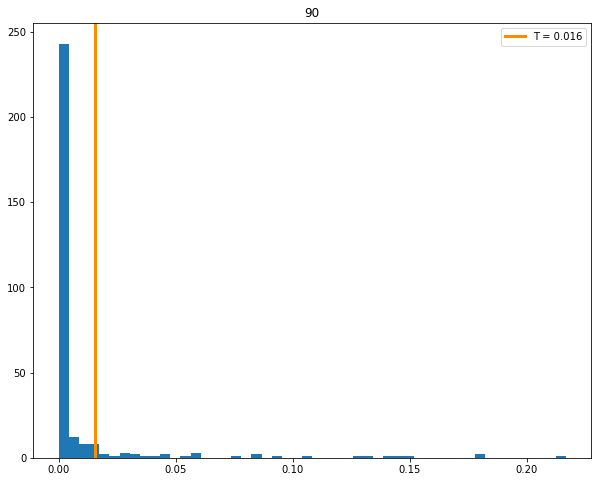

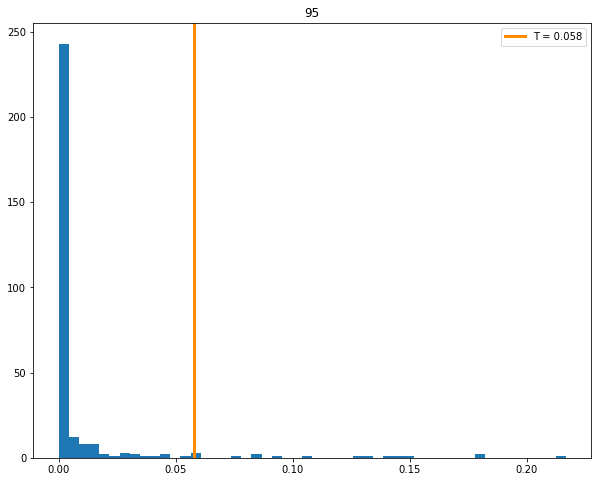

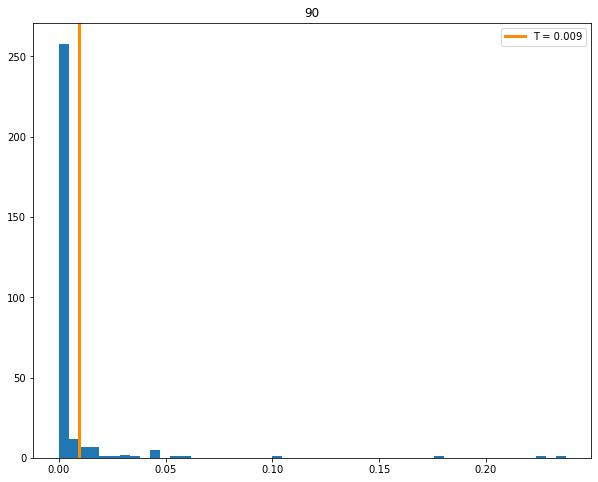

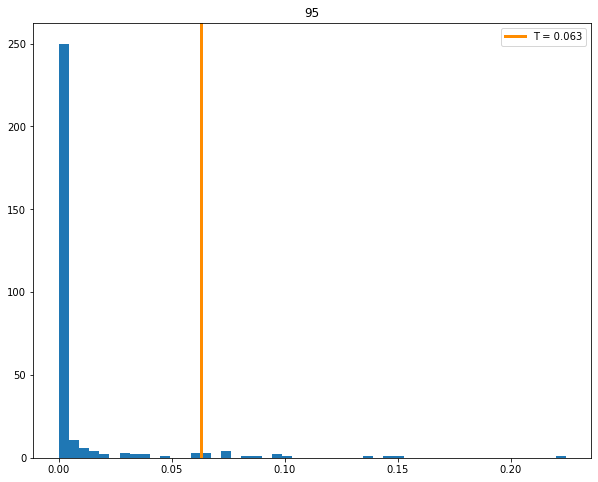

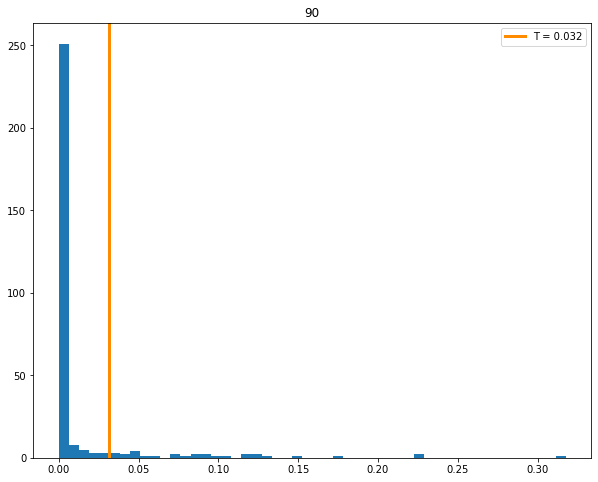

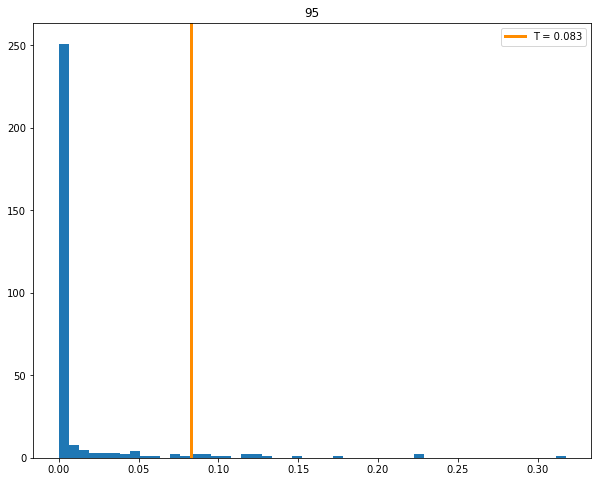

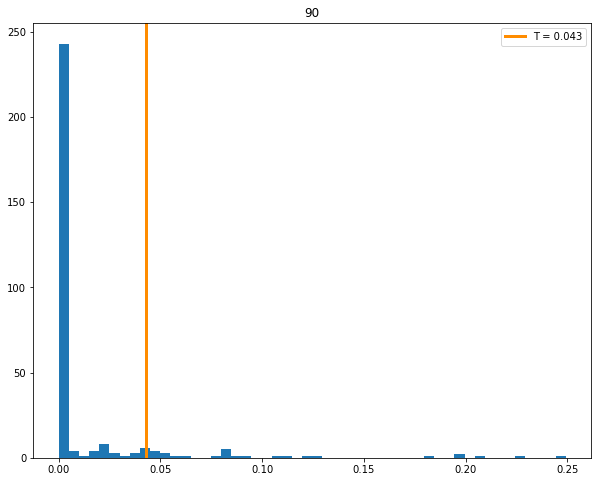

N =  350


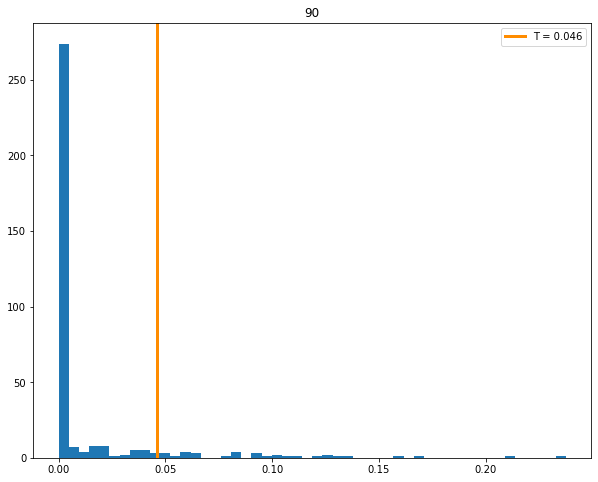

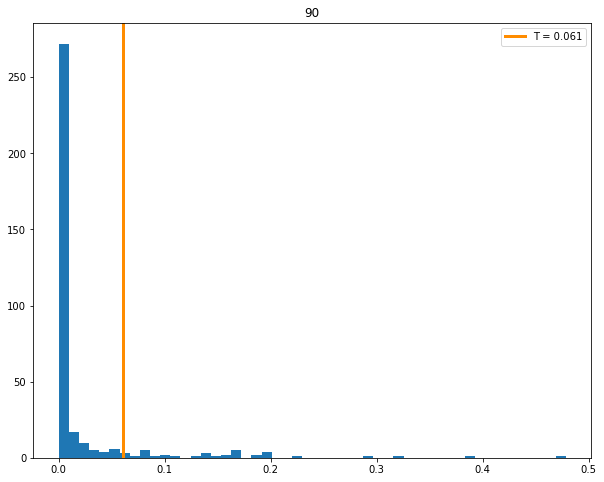

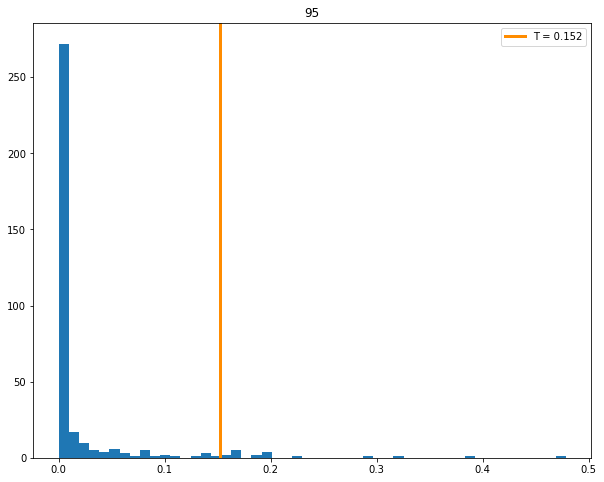

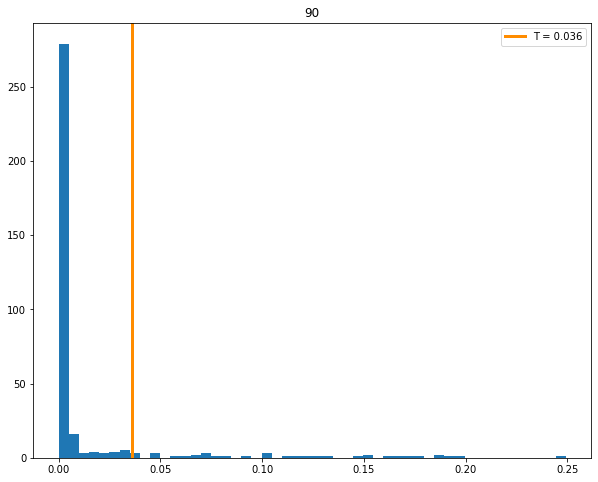

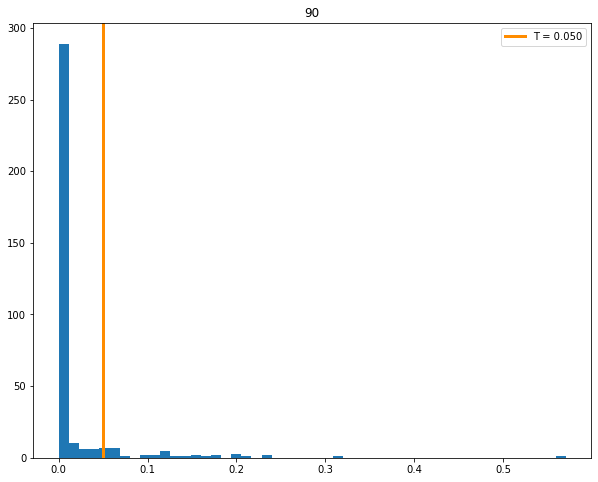

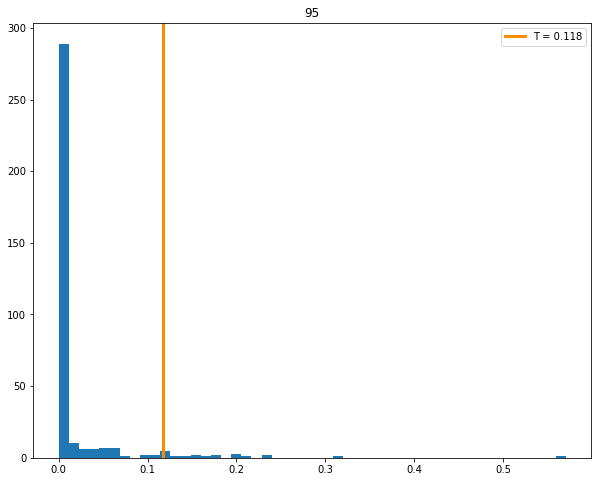

N =  400


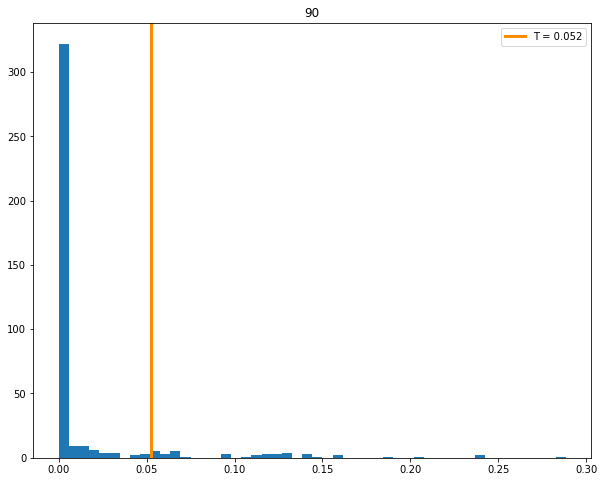

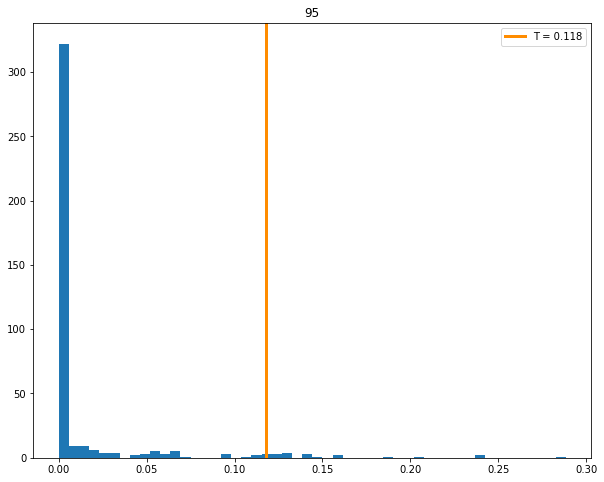

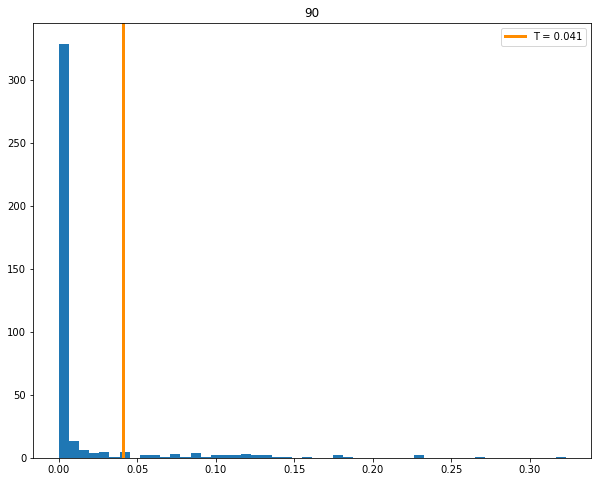

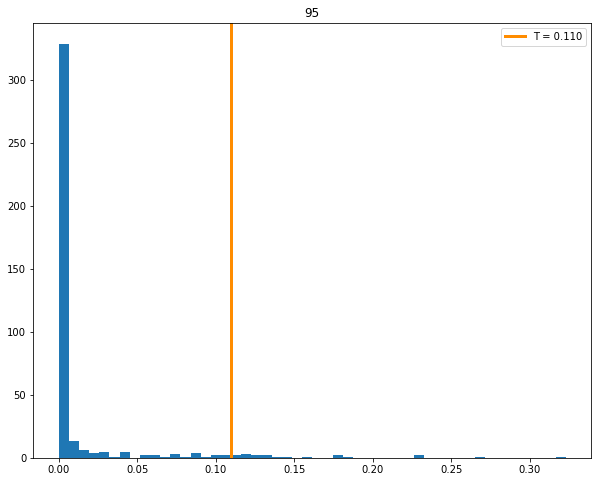

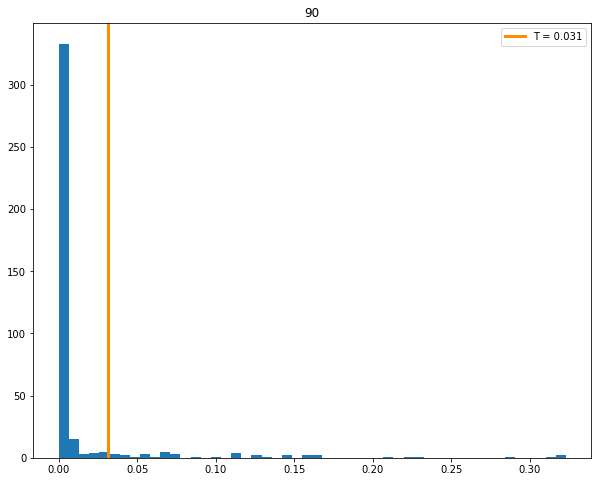

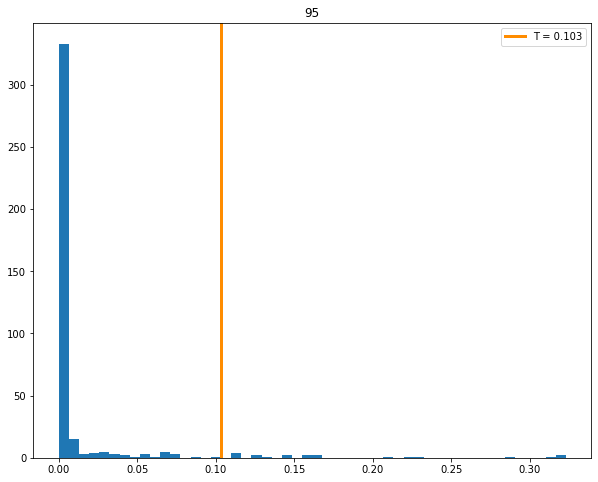

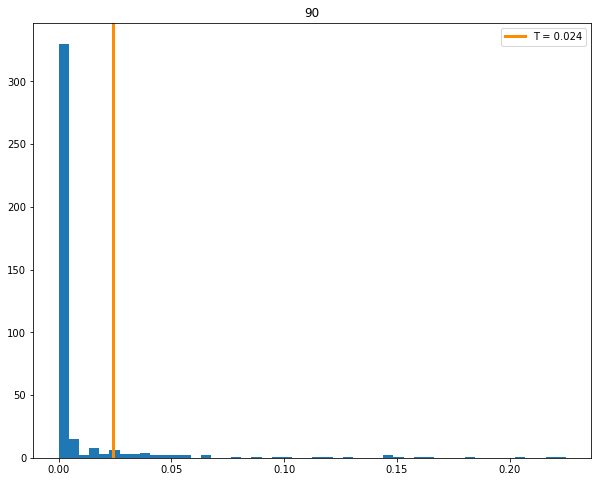

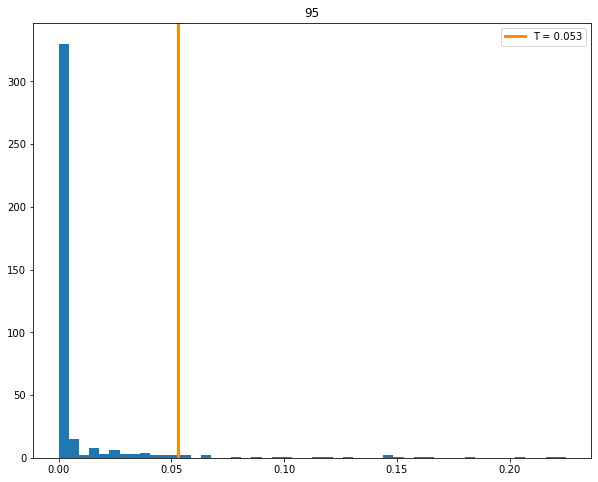

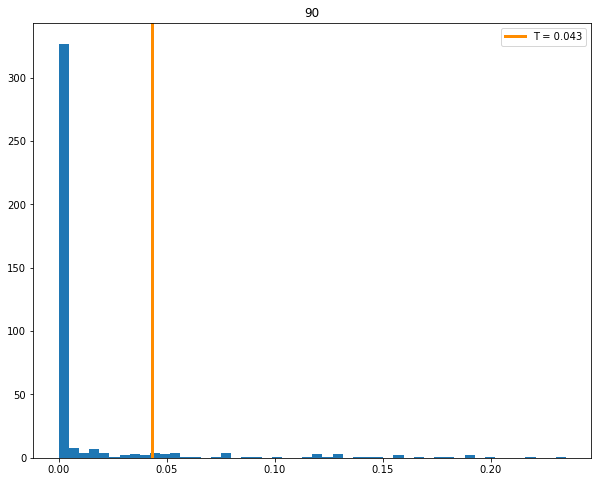

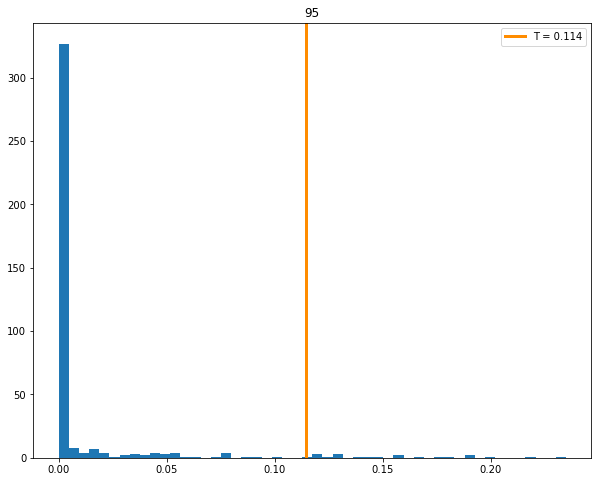

N =  450


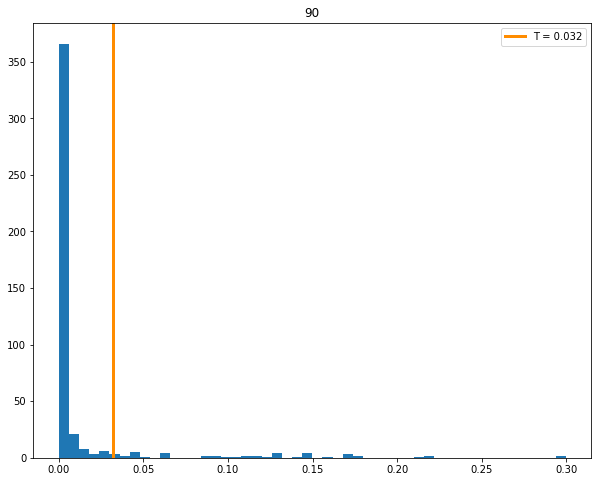

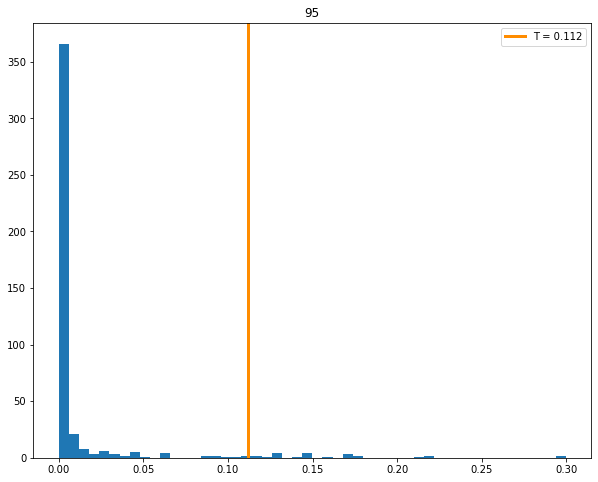

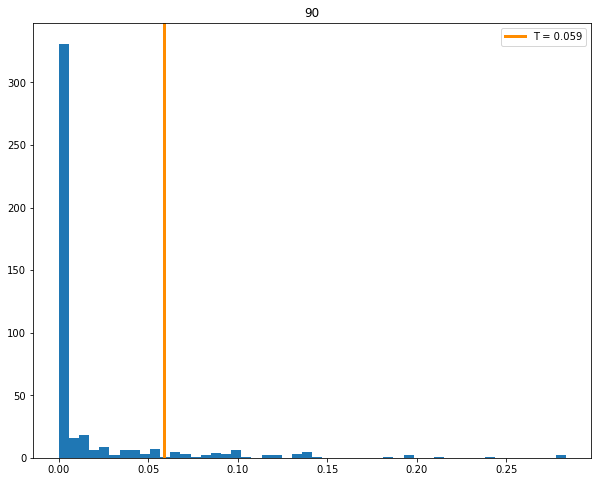

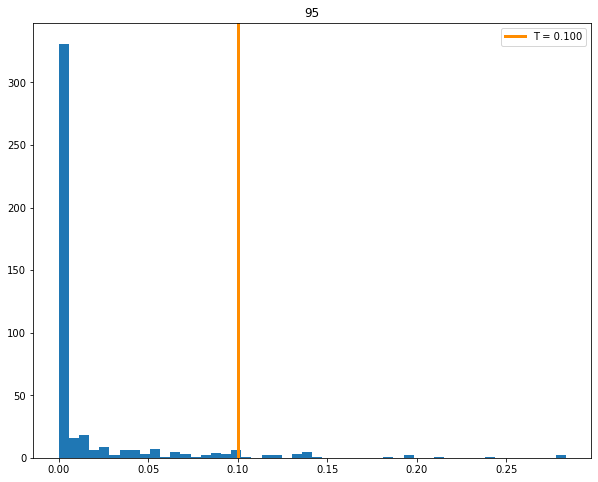

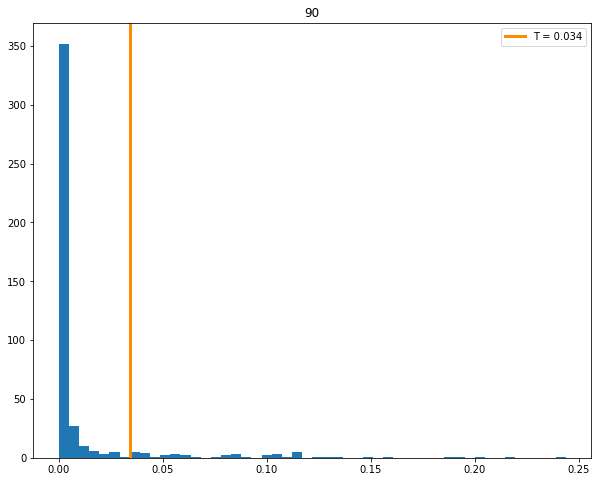

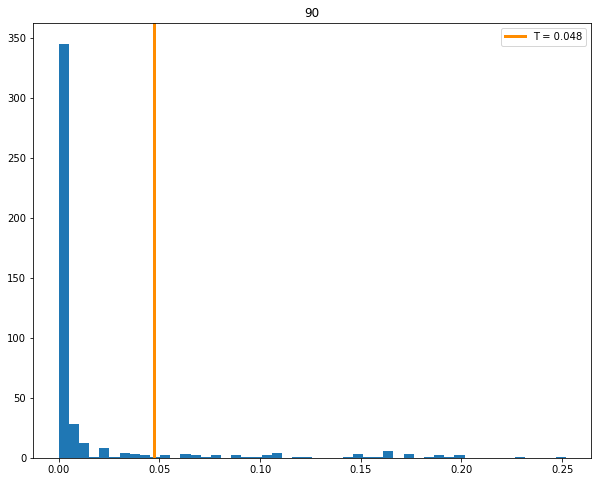

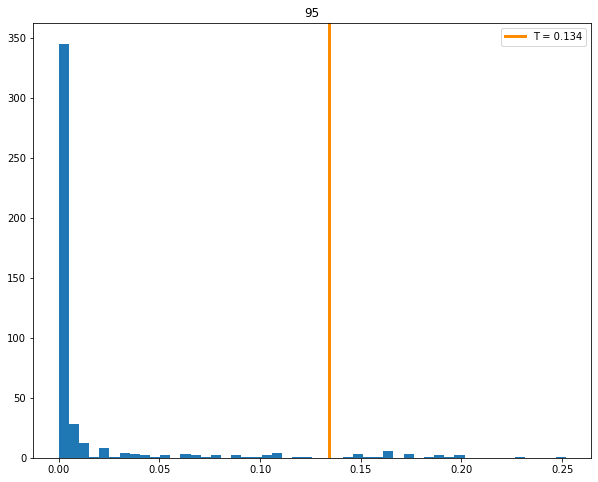

N =  500


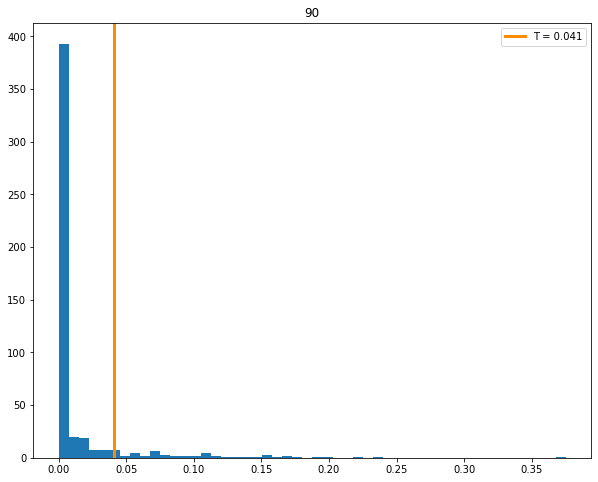

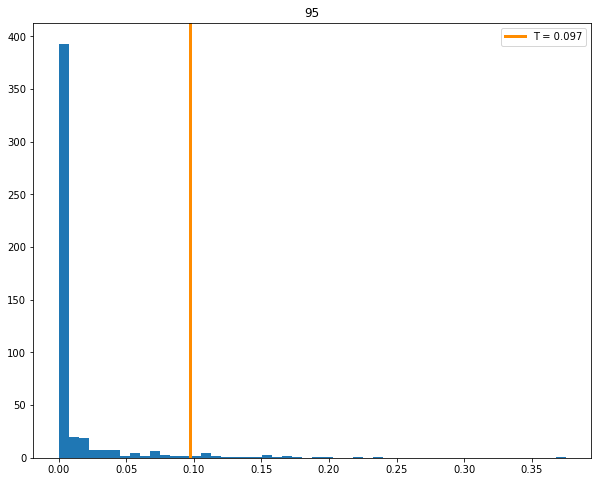

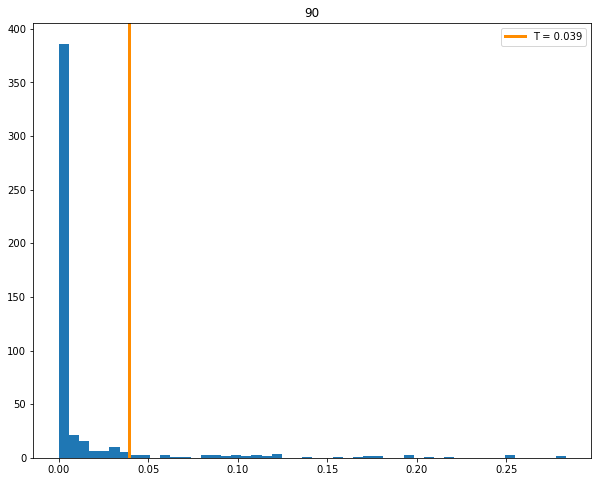

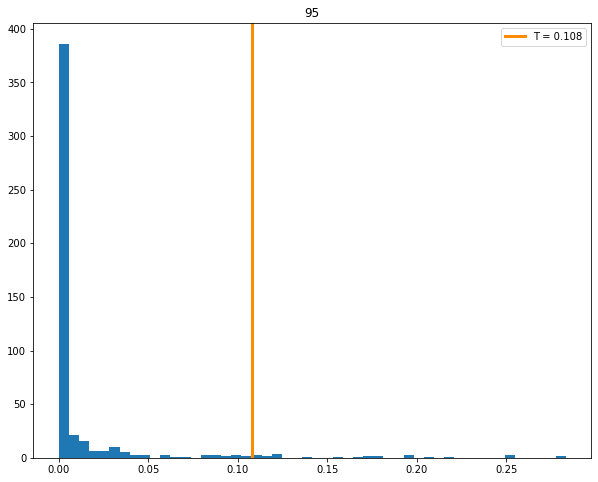

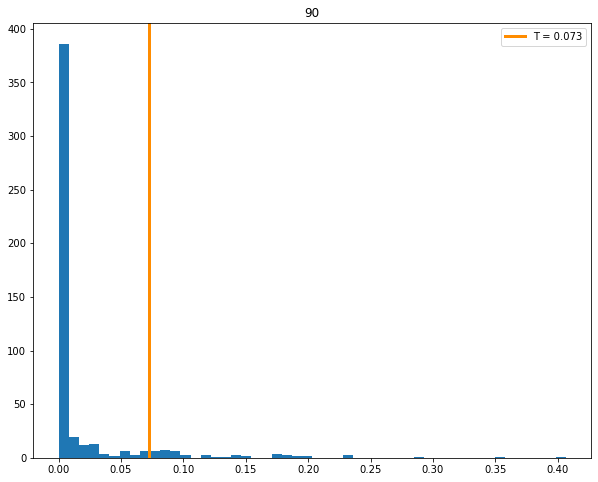

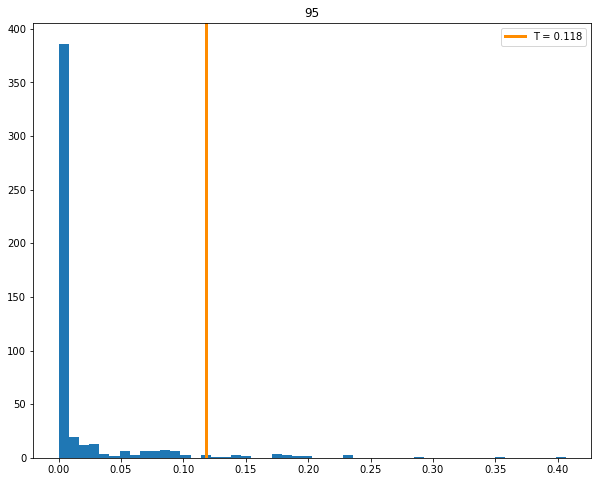

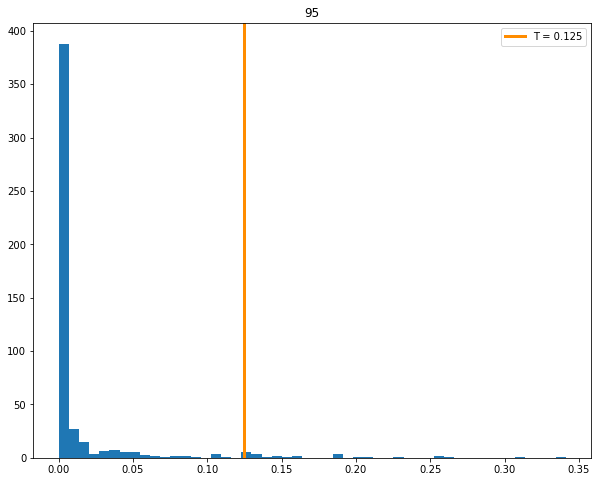

N =  550


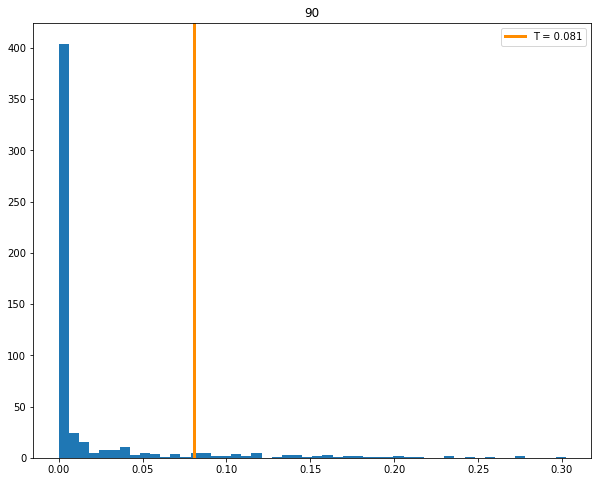

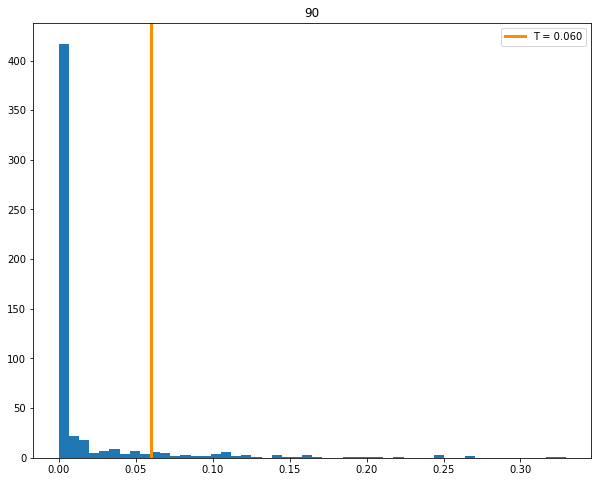

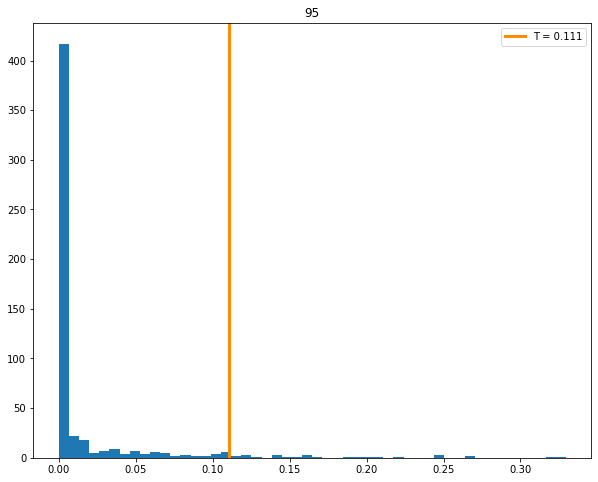

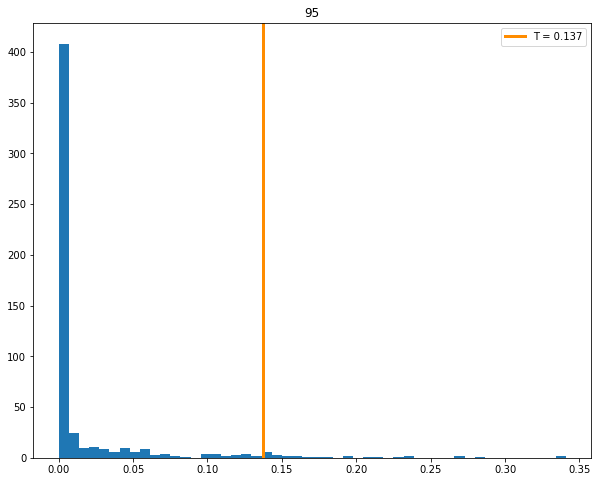

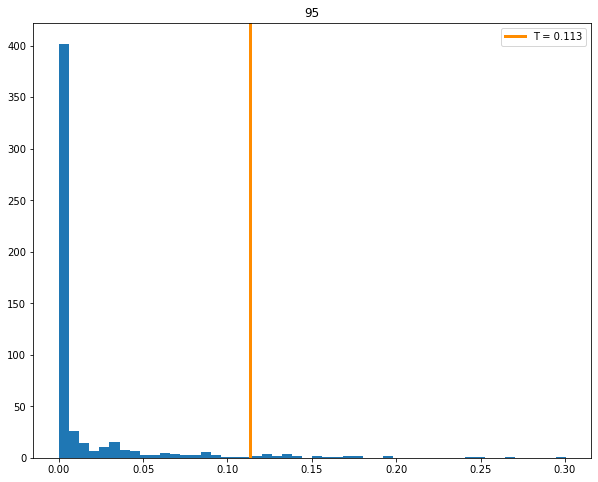

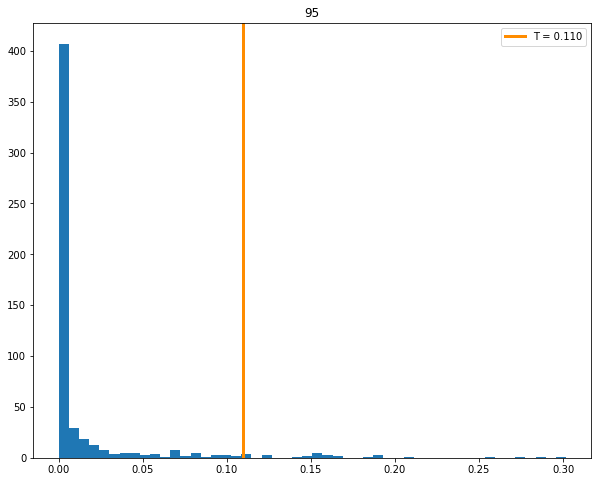

N =  600


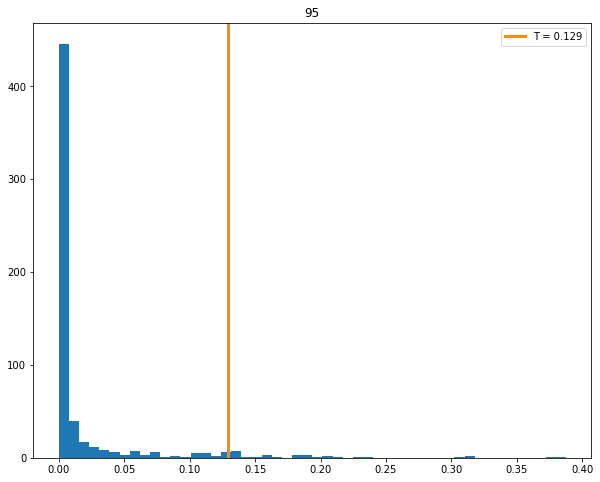

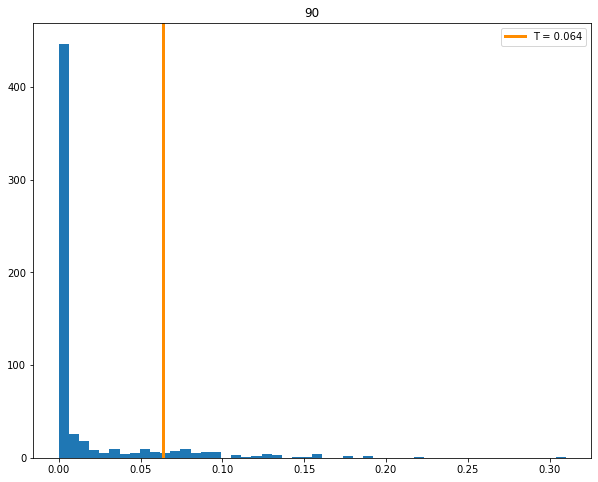

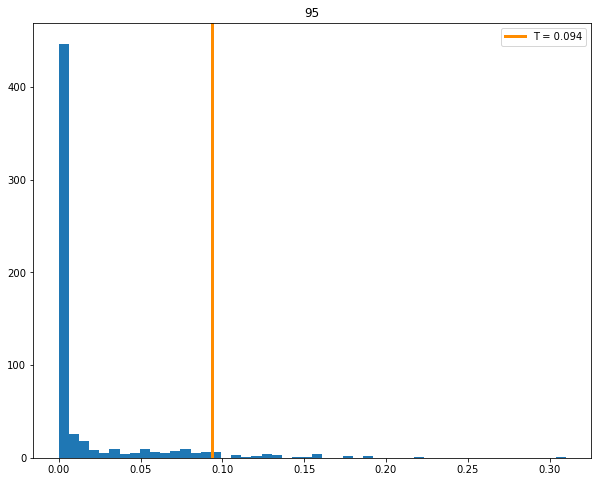

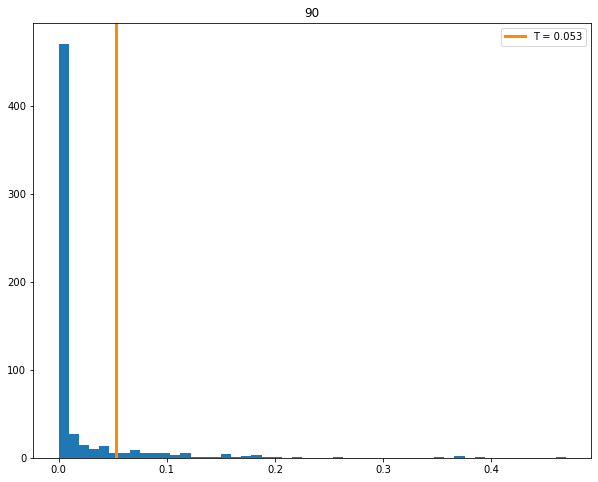

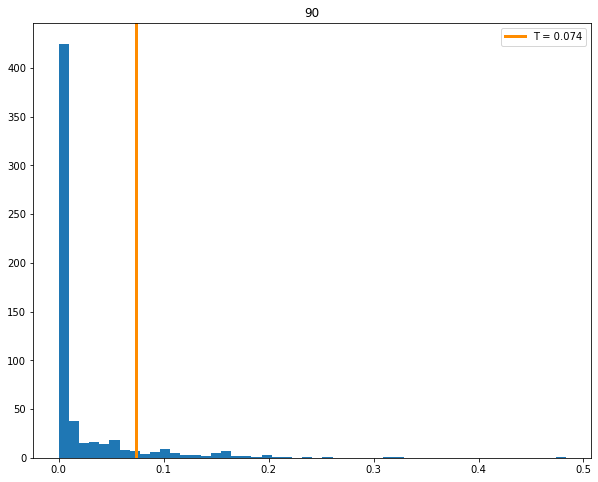

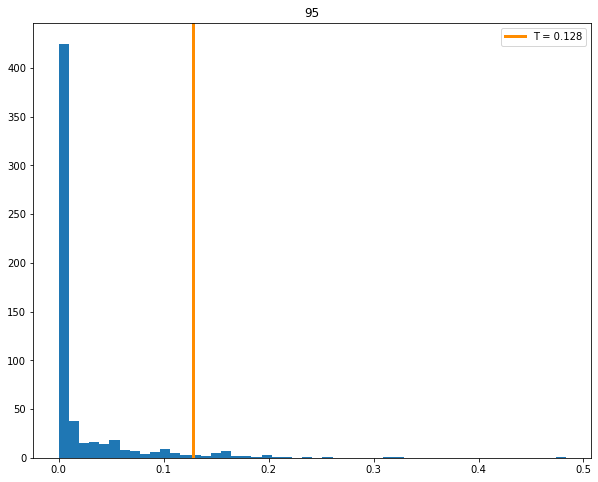

N =  650


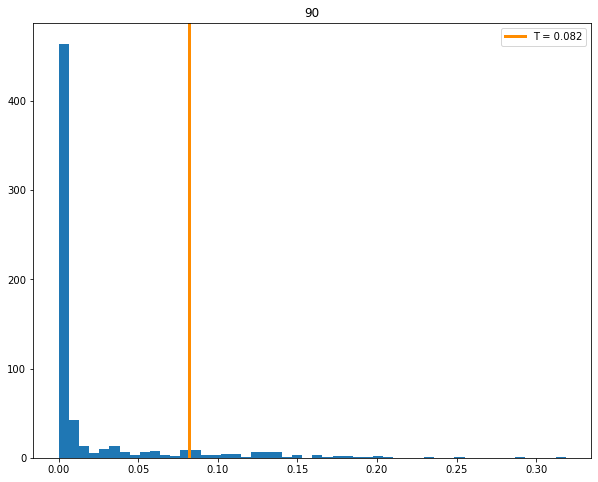

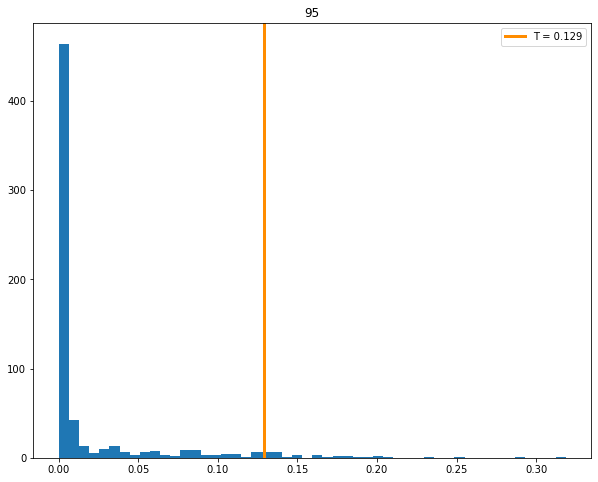

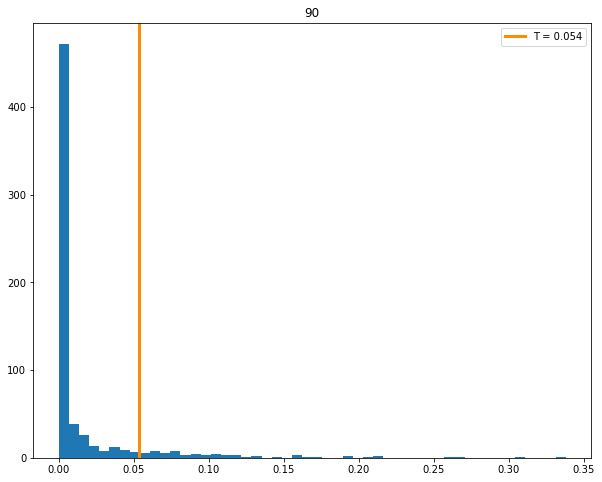

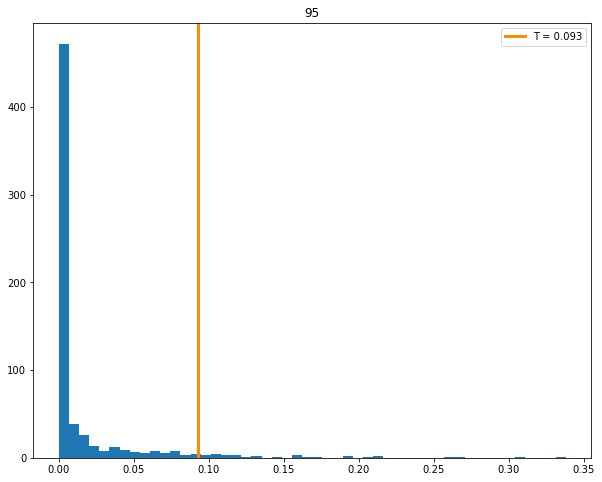

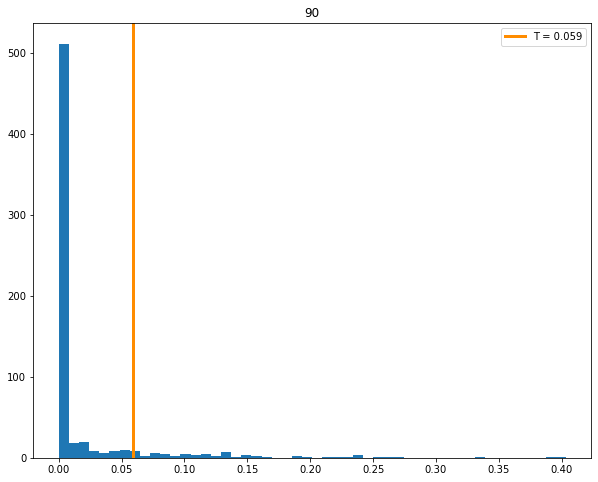

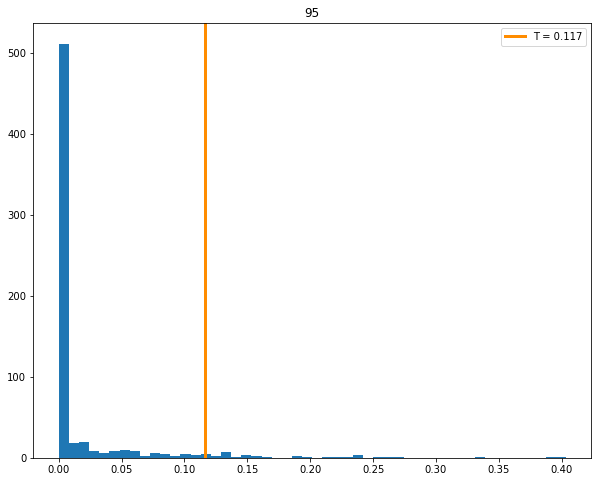

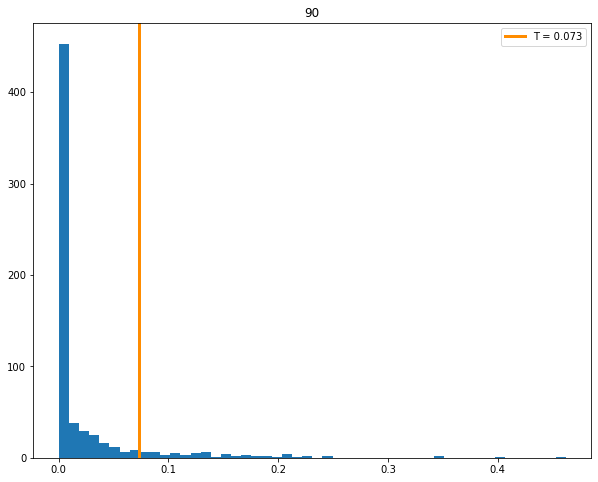

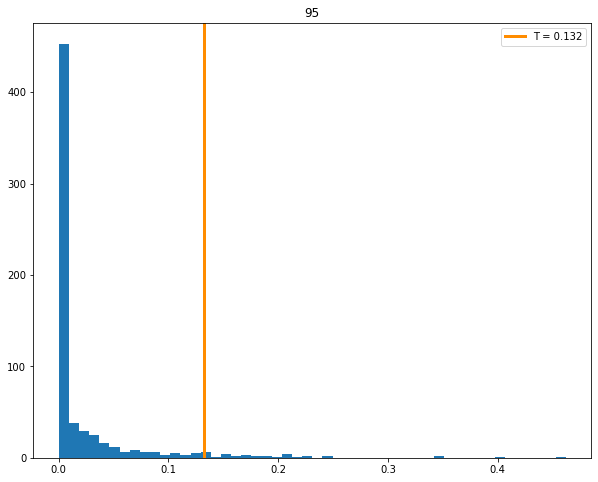

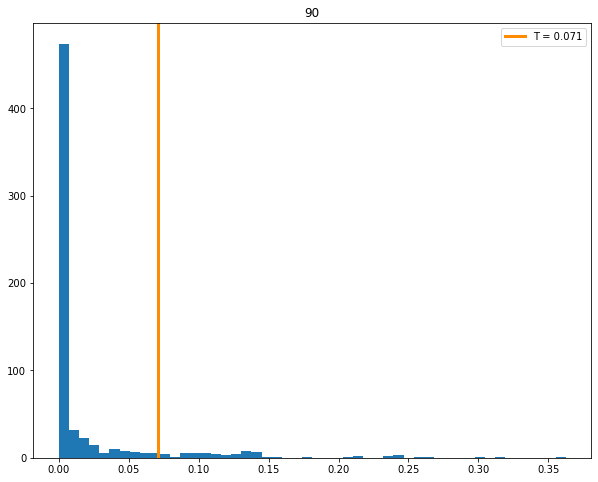

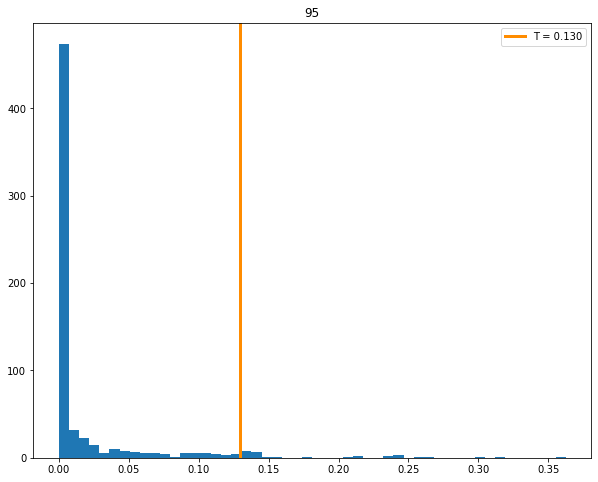

55
N =  300


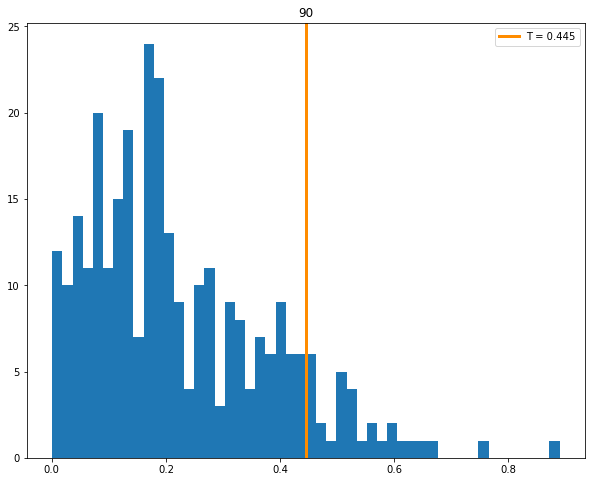

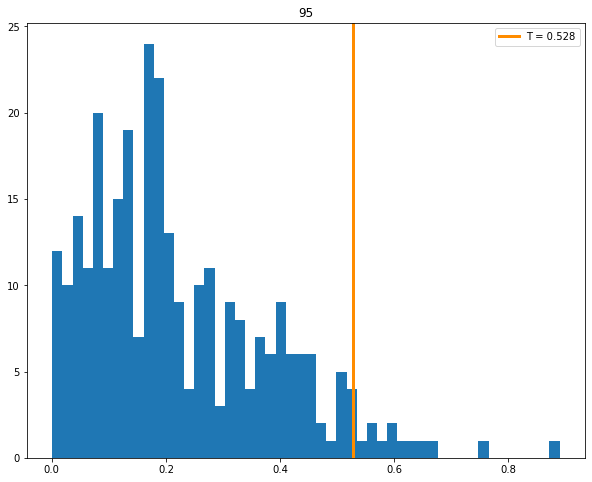

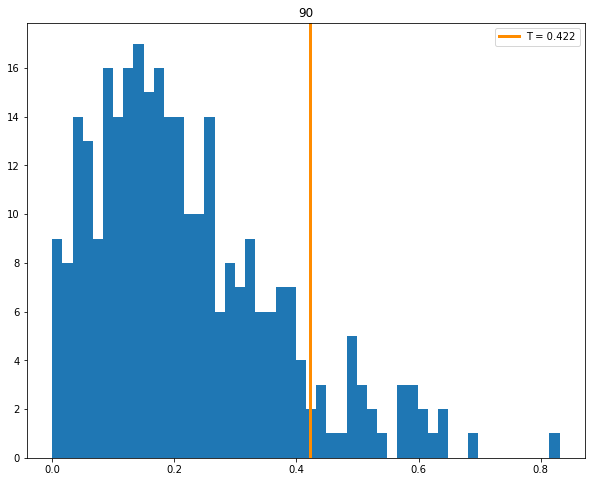

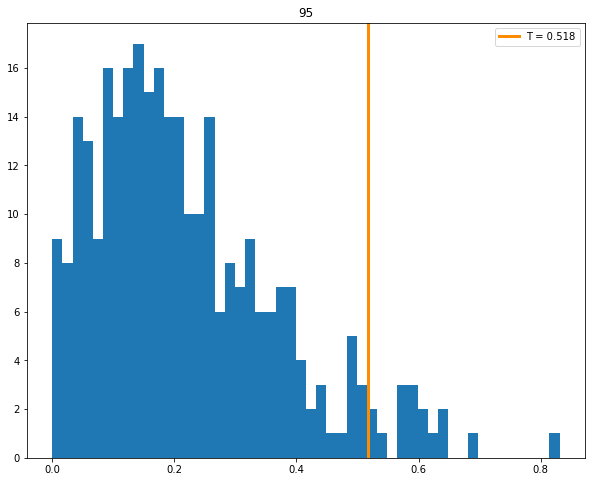

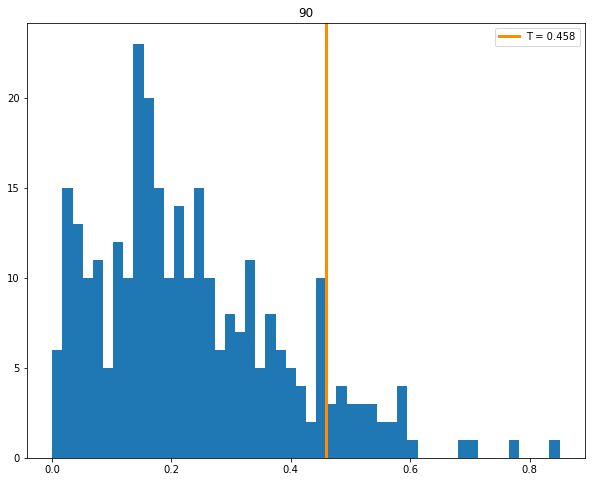

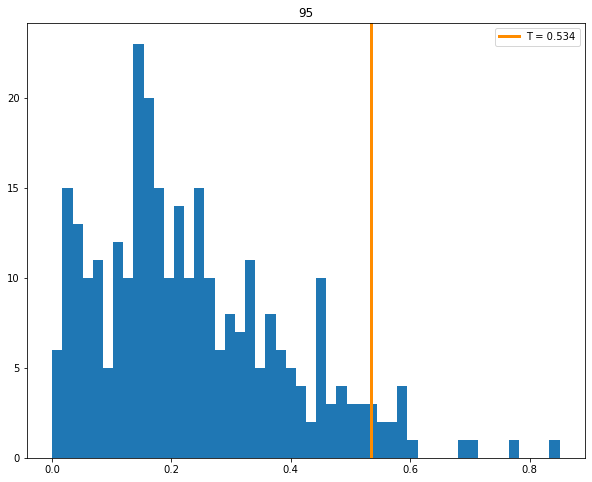

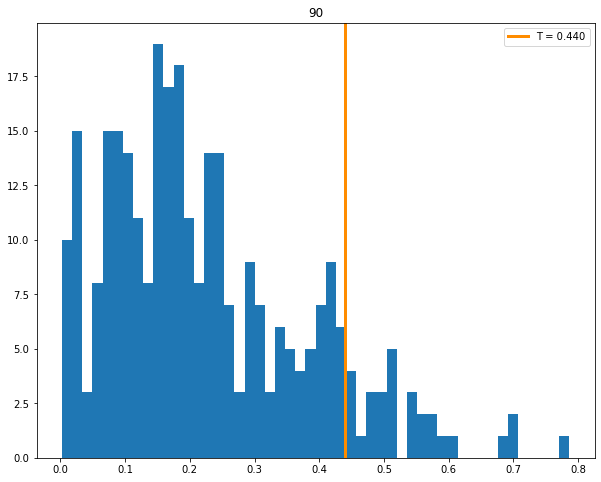

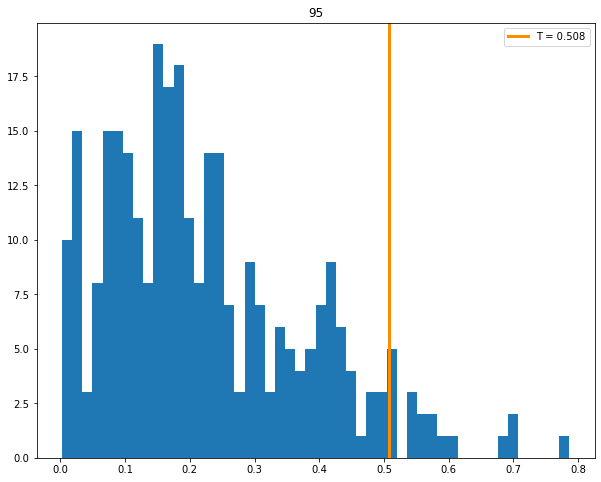

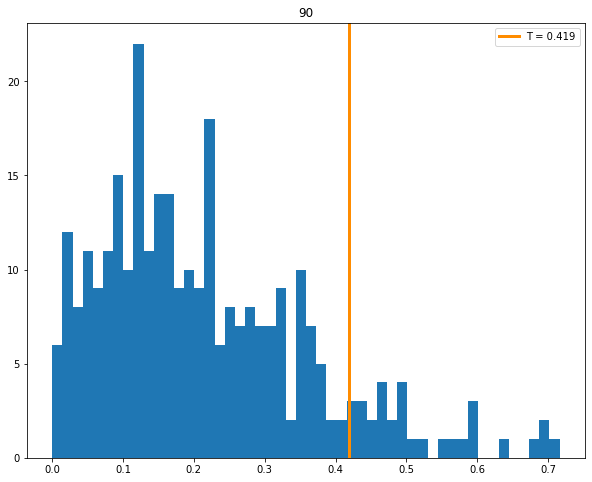

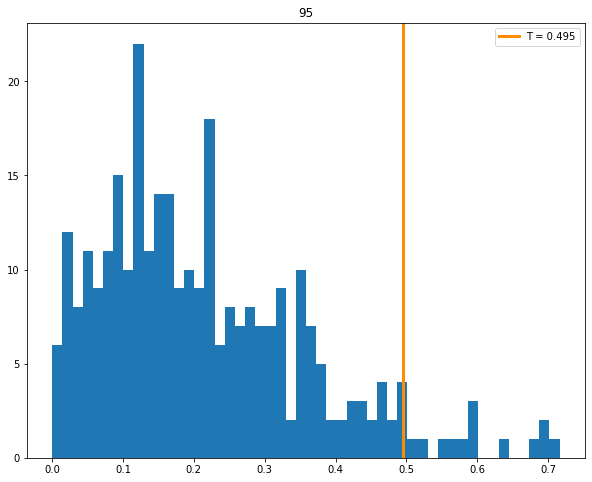

N =  350


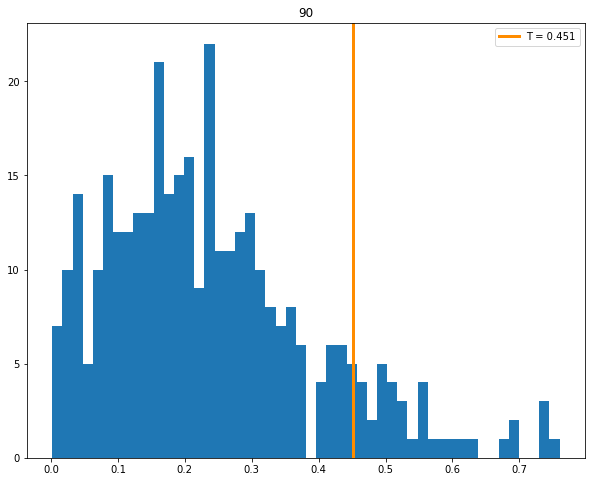

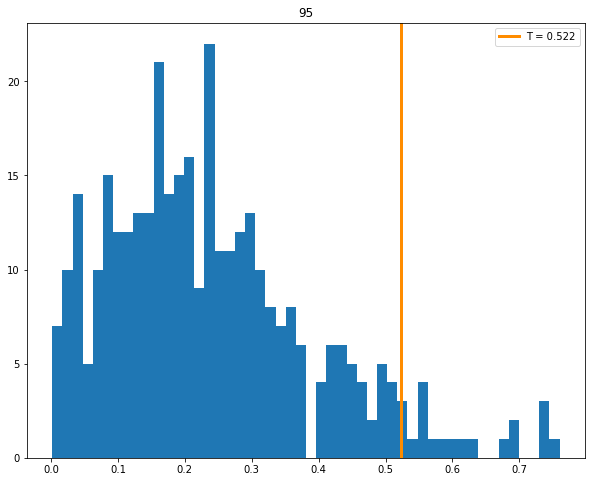

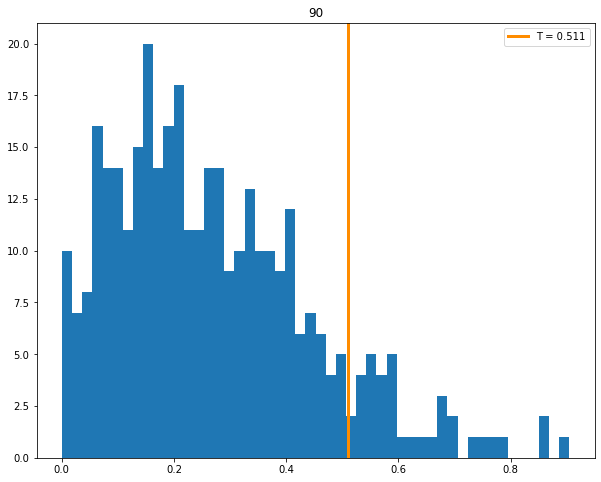

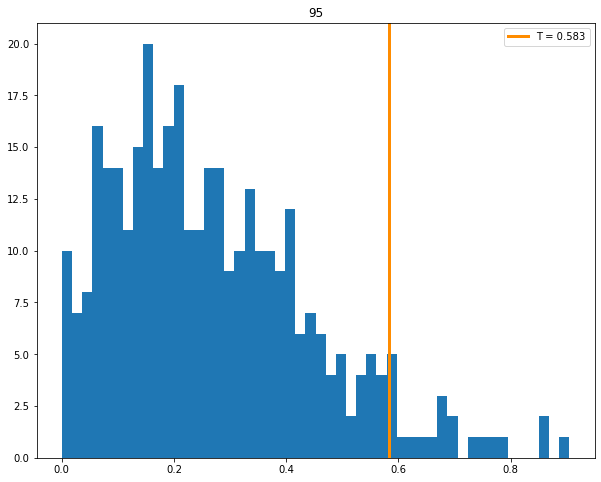

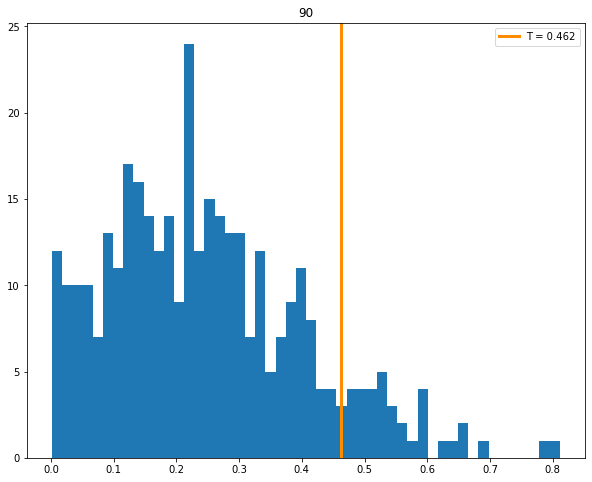

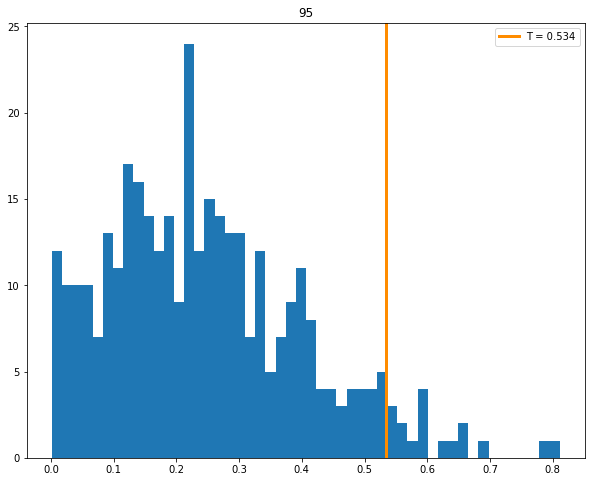

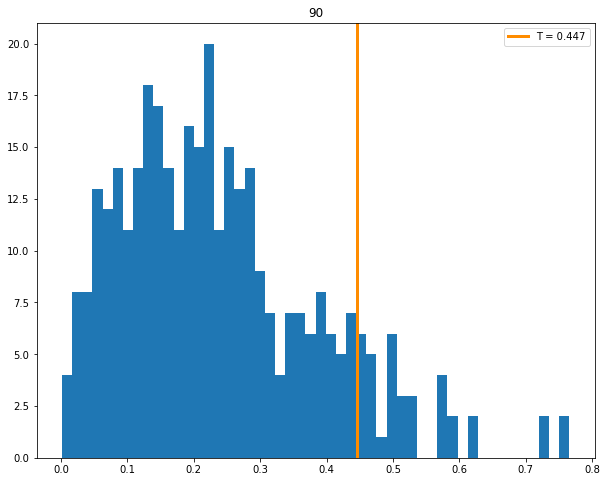

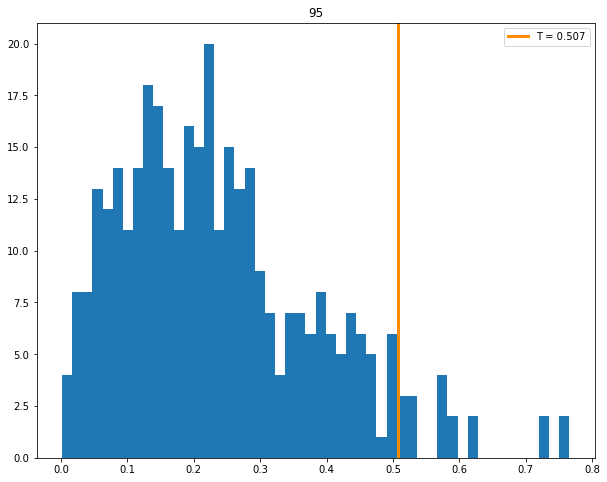

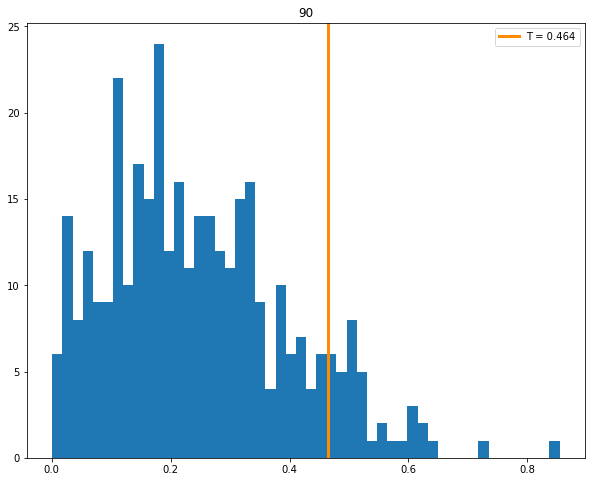

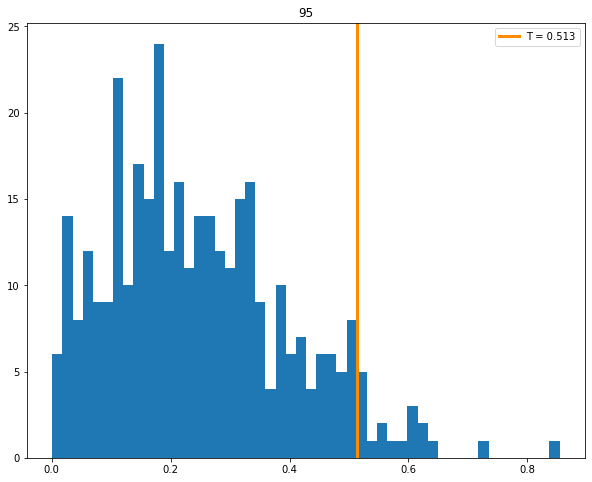

N =  400


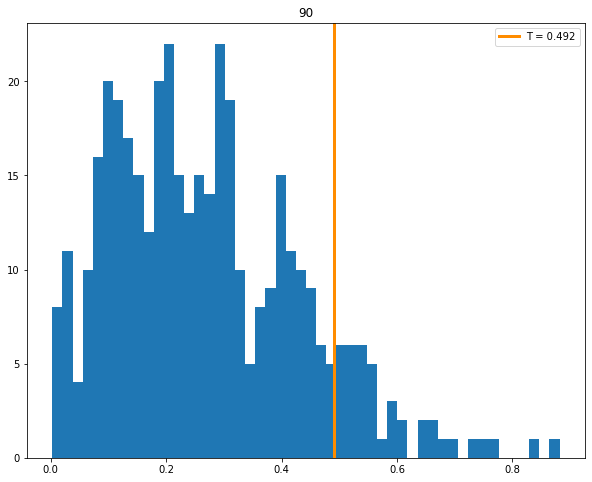

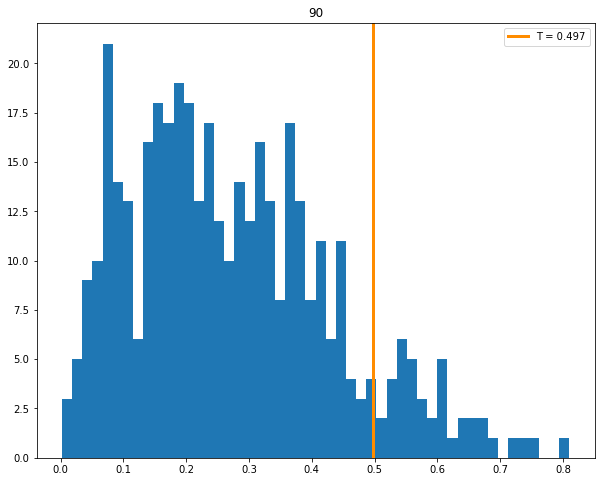

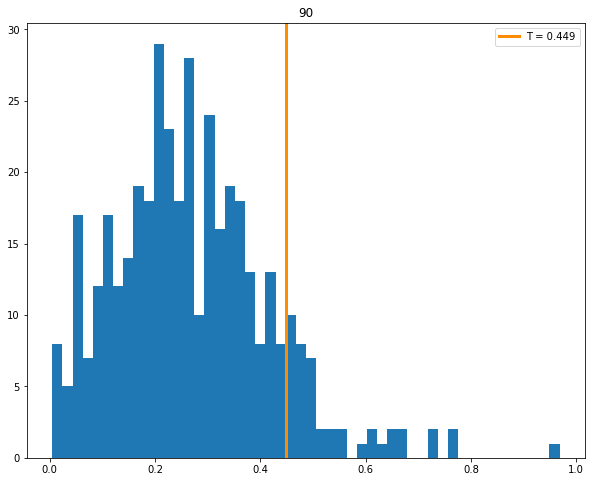

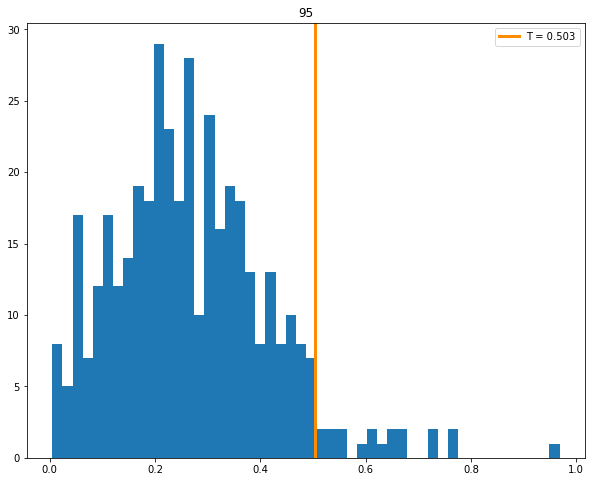

N =  450


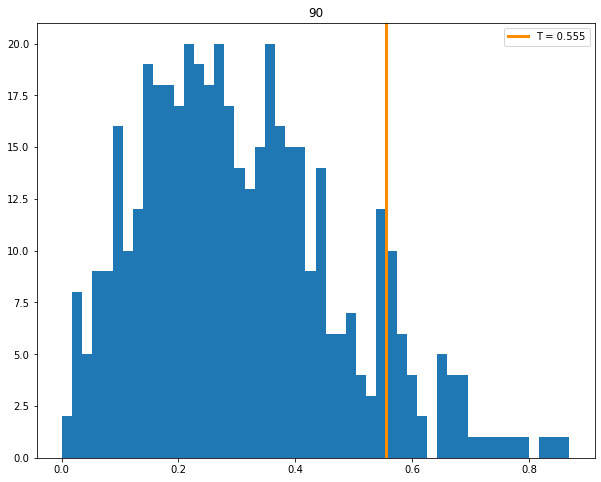

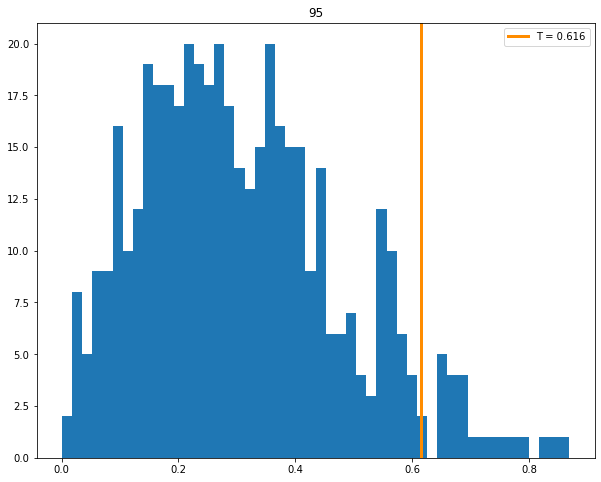

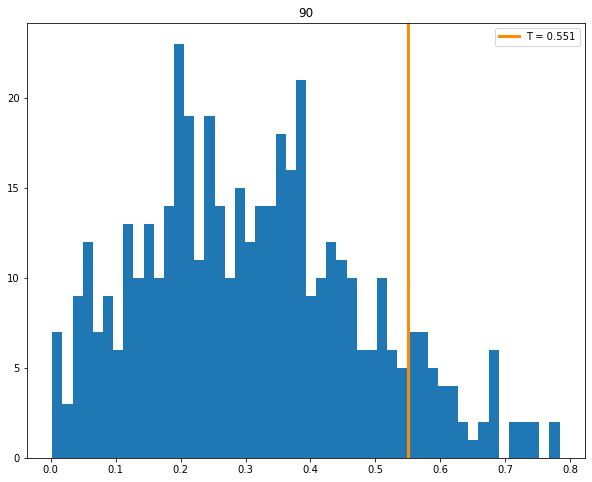

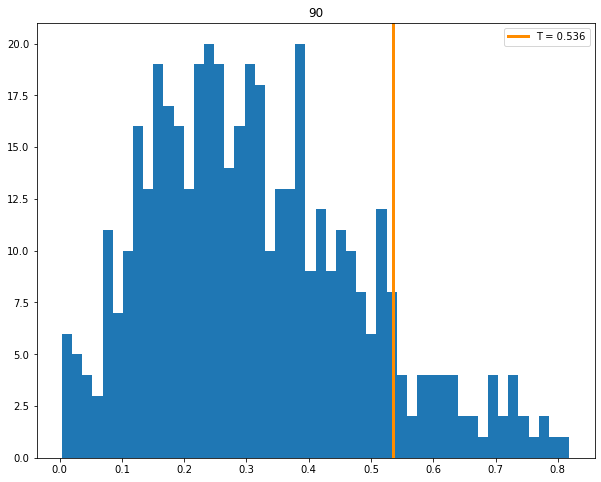

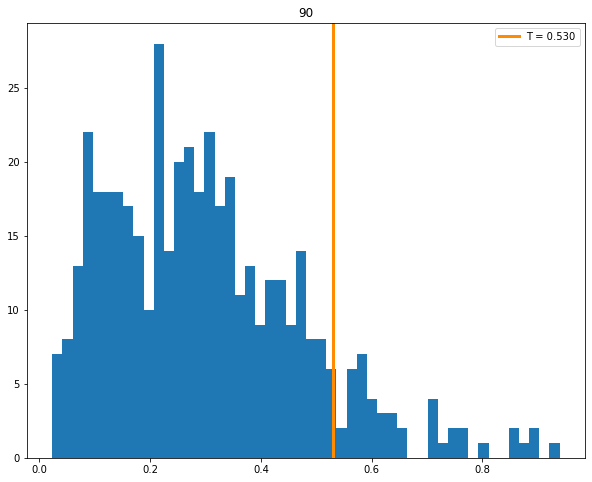

N =  500


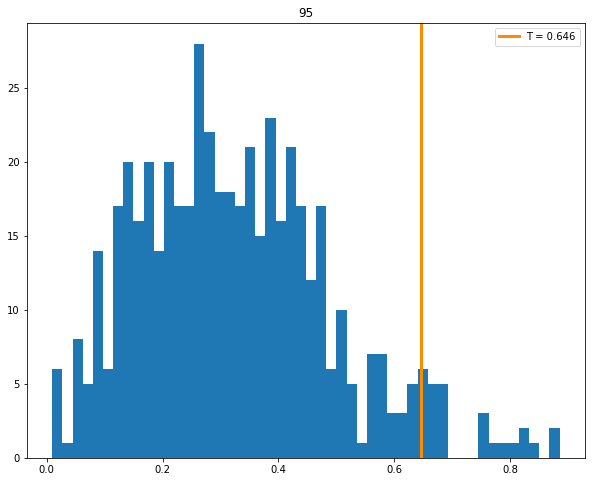

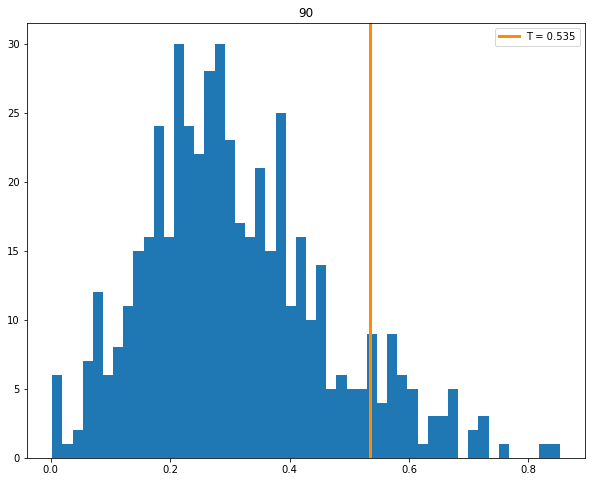

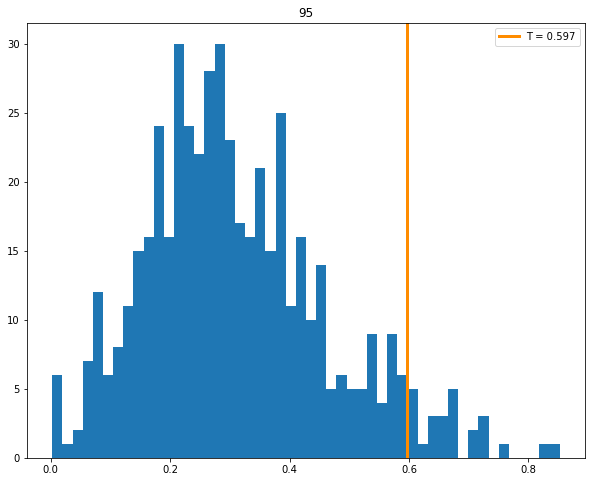

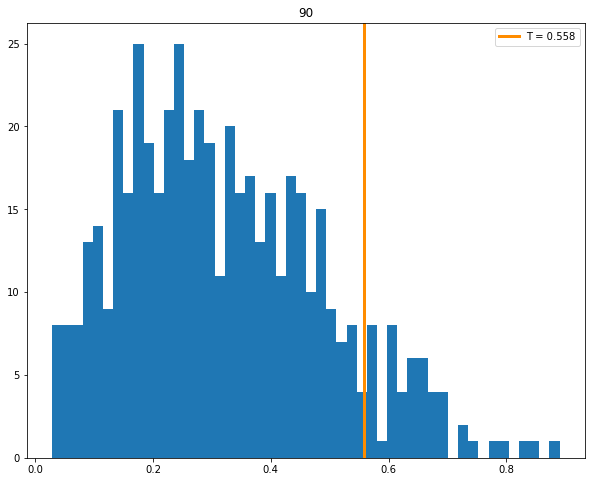

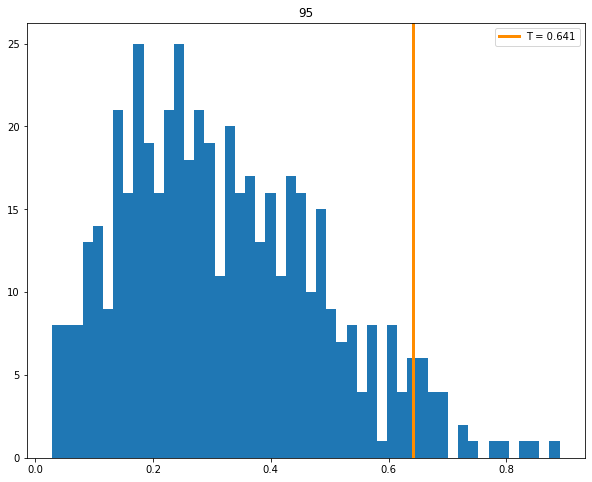

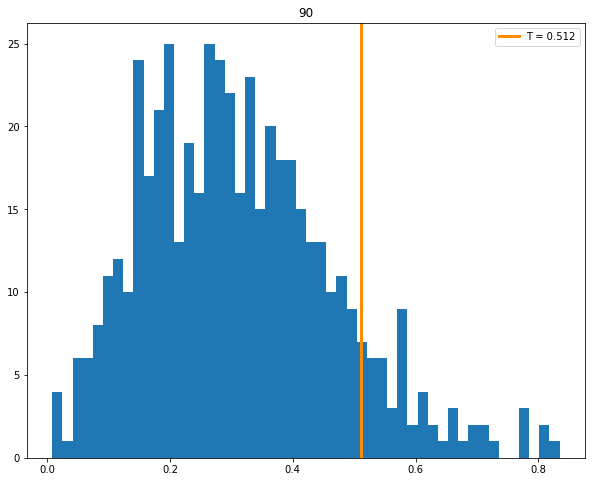

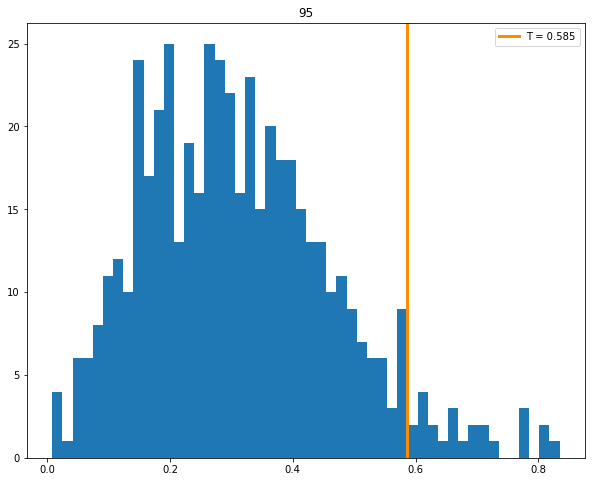

N =  550


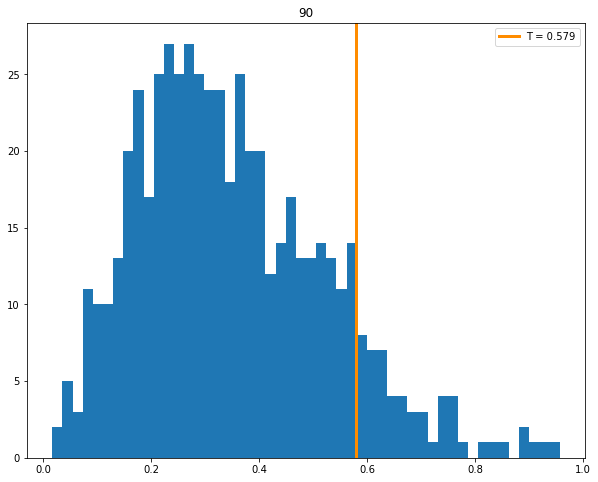

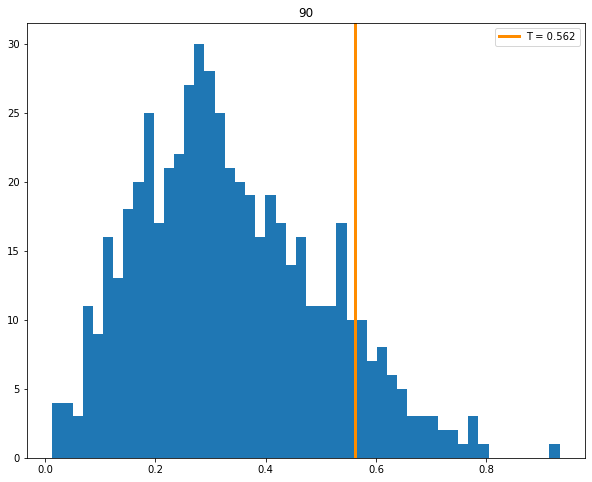

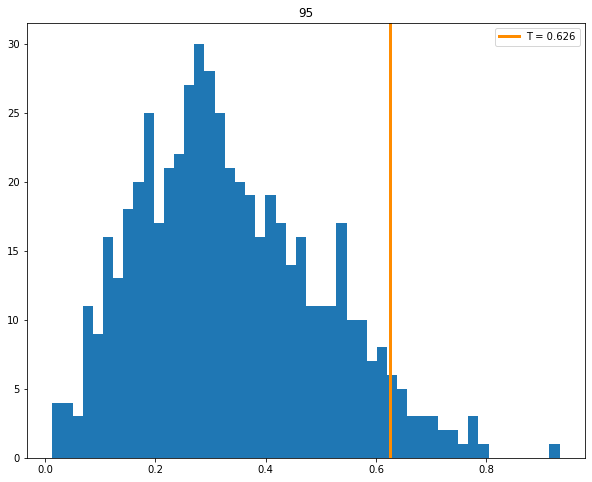

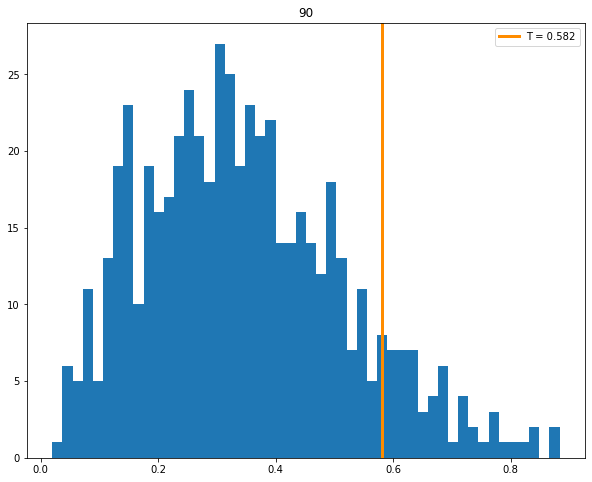

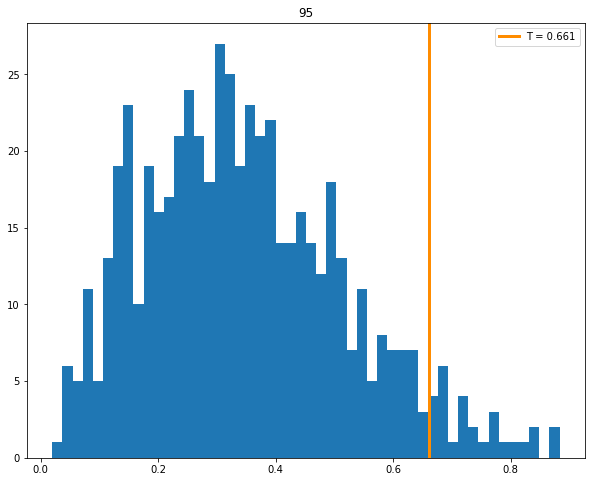

N =  600


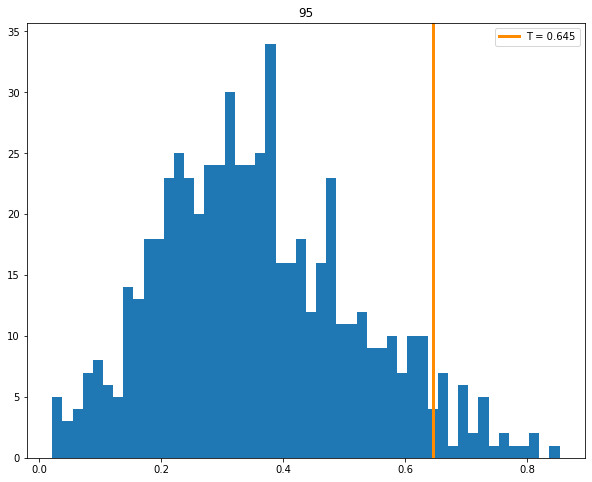

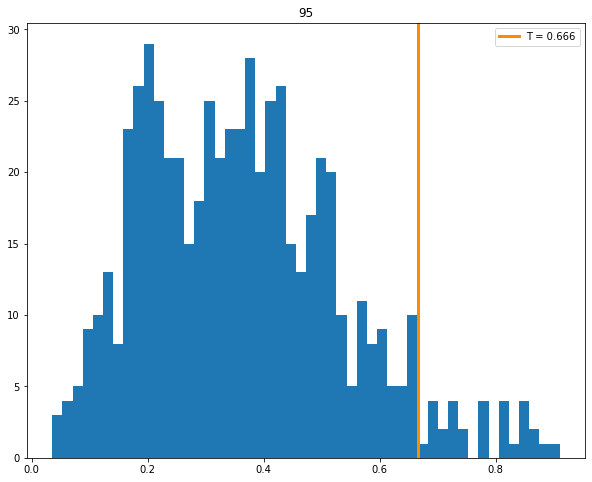

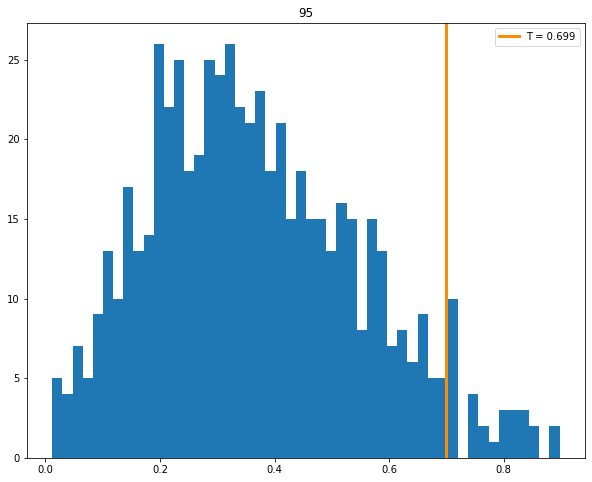

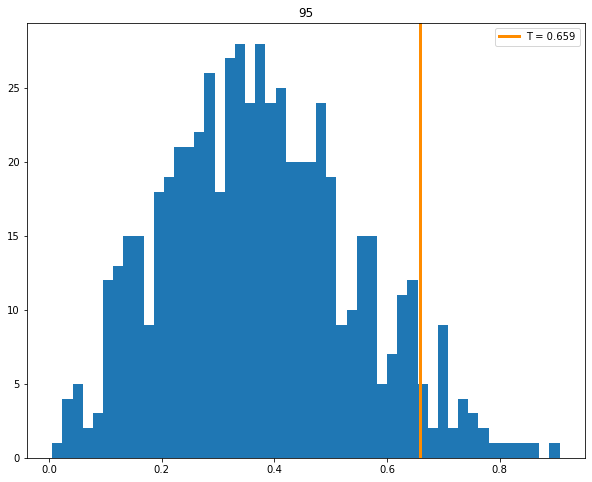

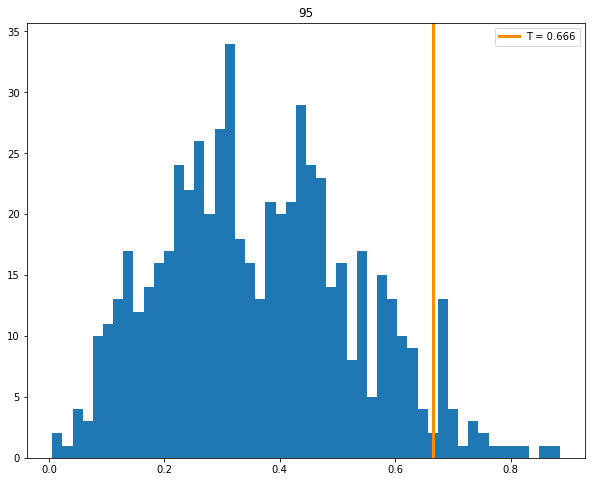

N =  650


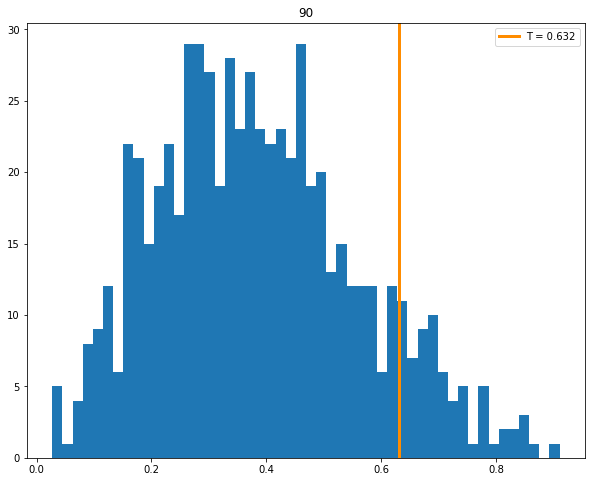

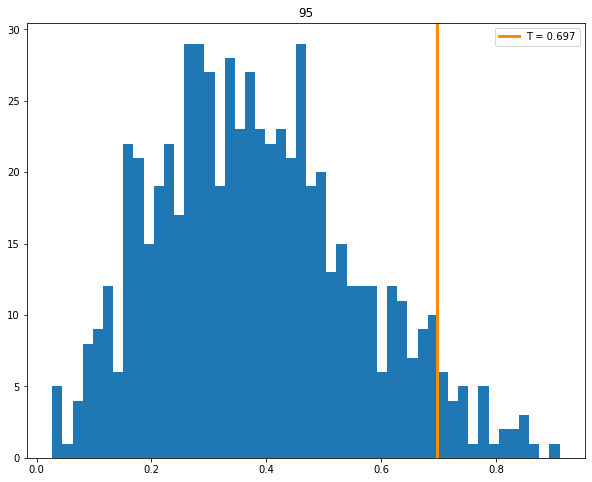

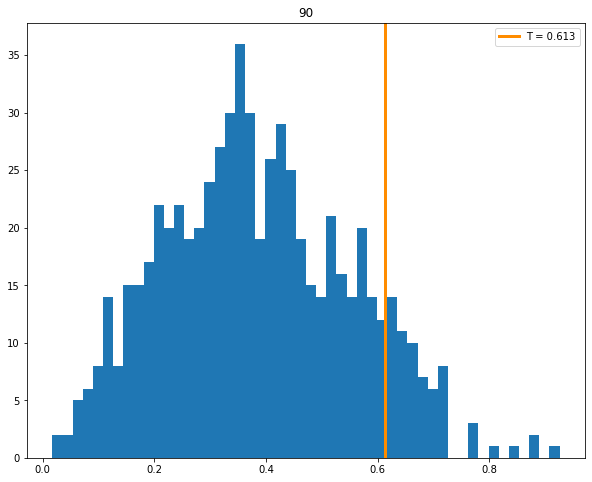

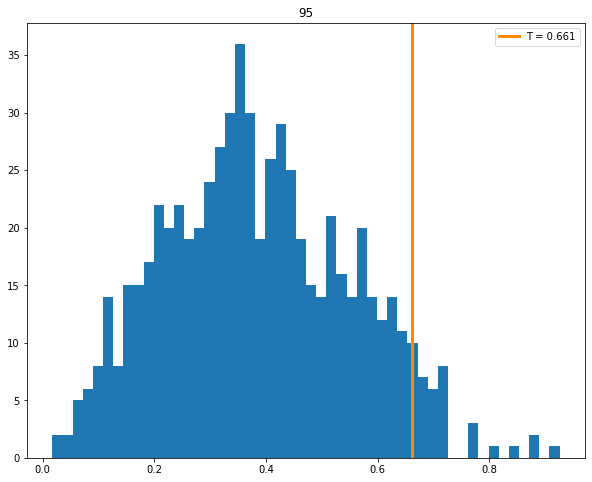

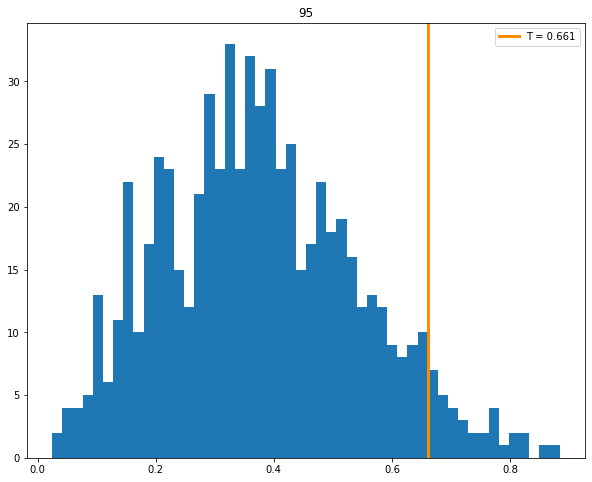

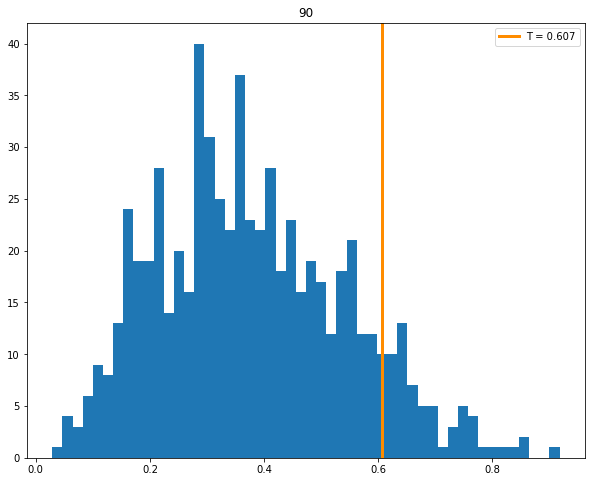

100
N =  300


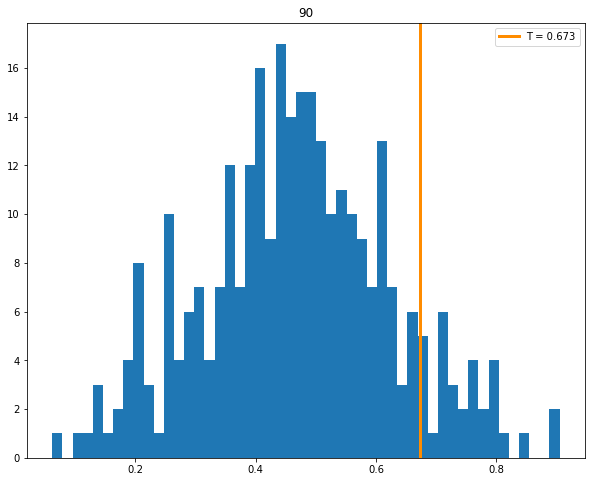

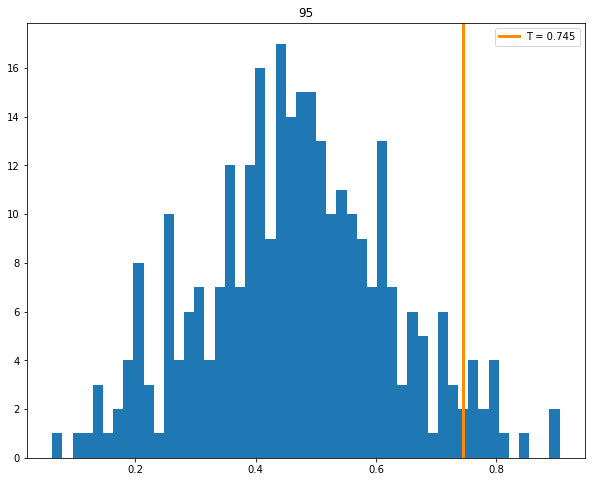

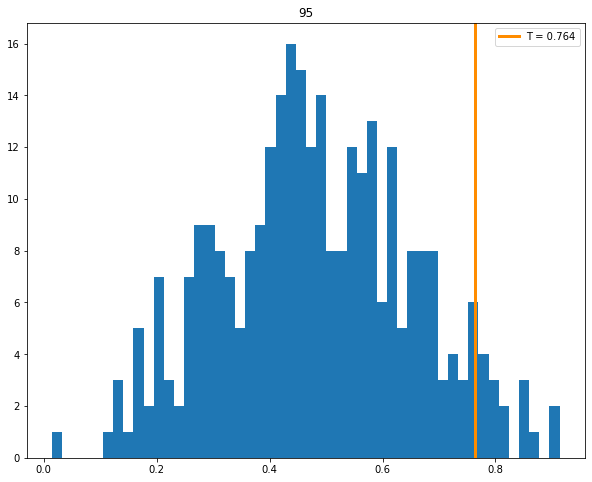

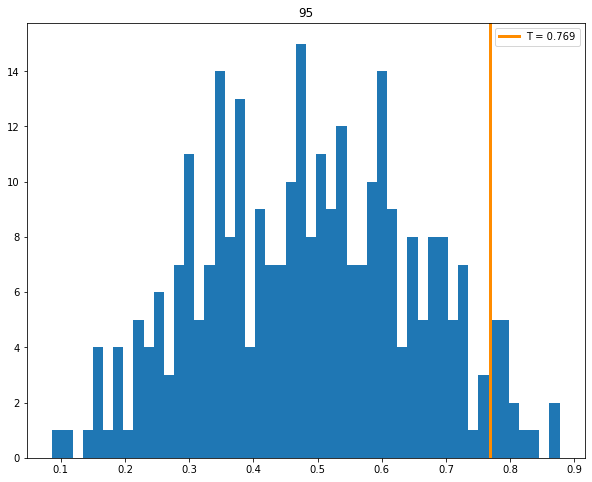

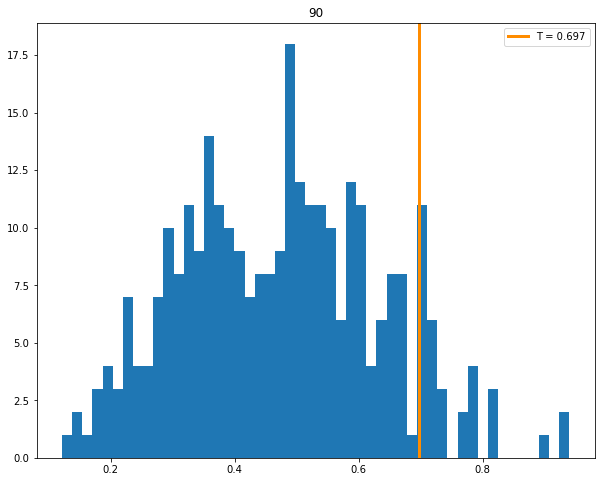

N =  350


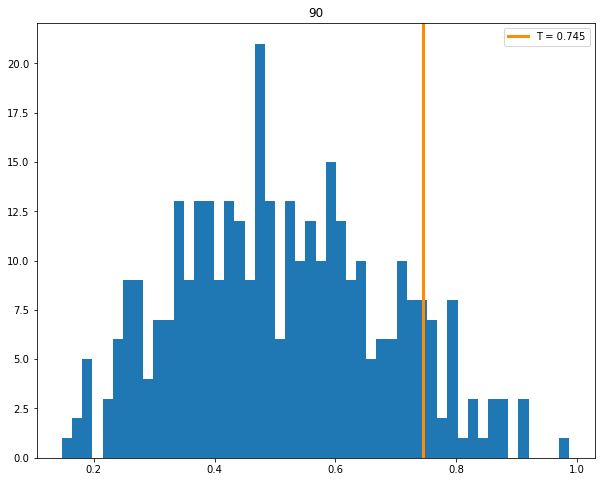

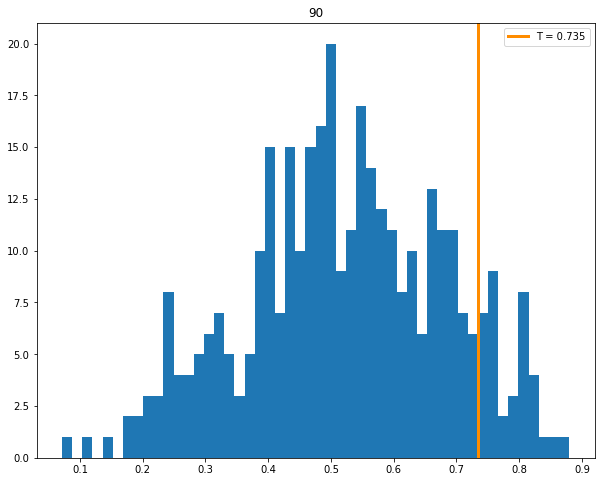

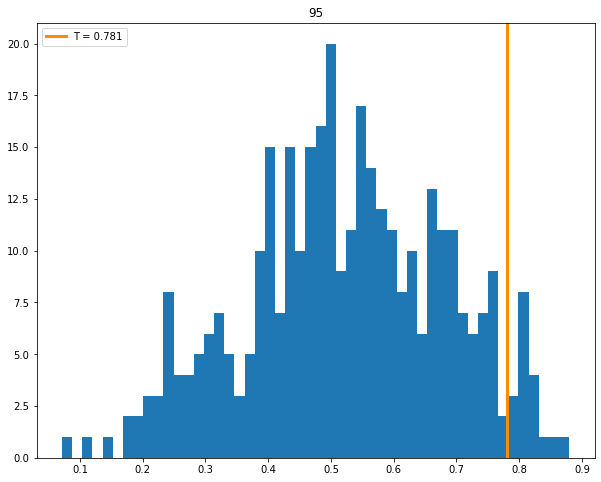

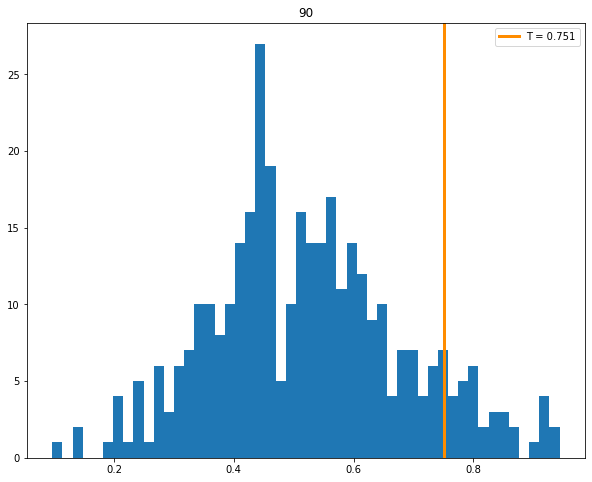

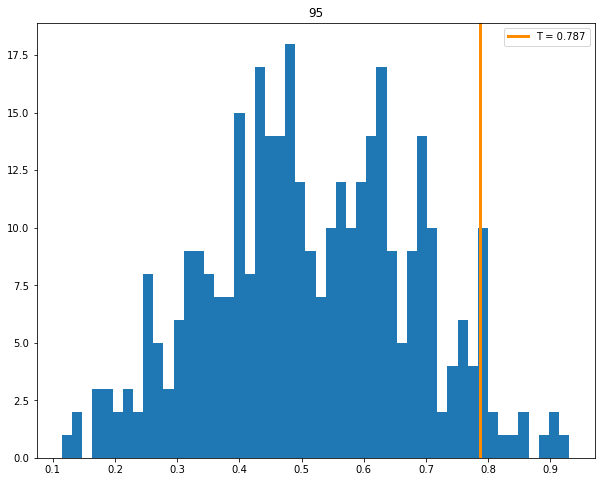

N =  400


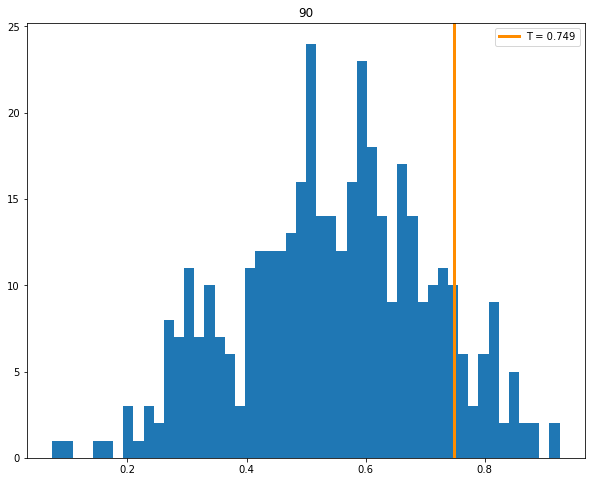

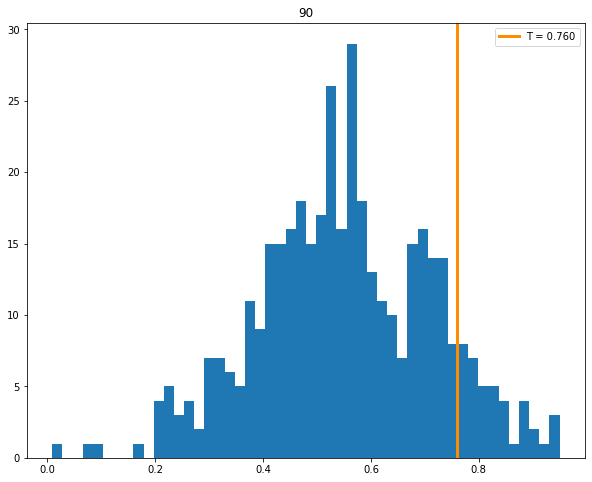

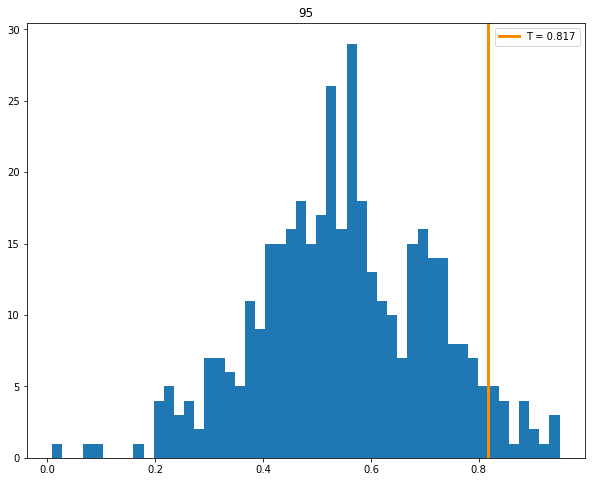

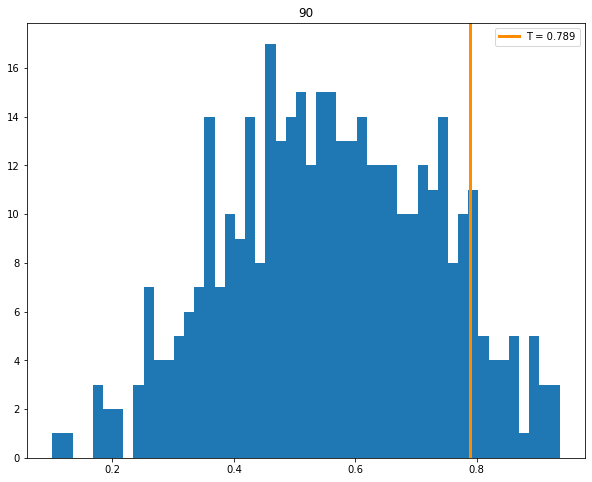

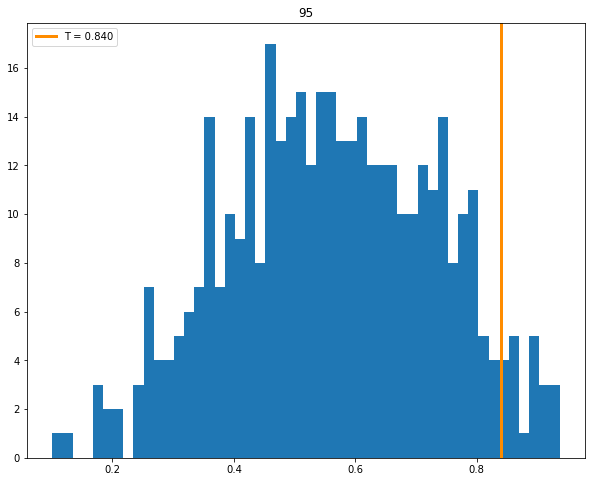

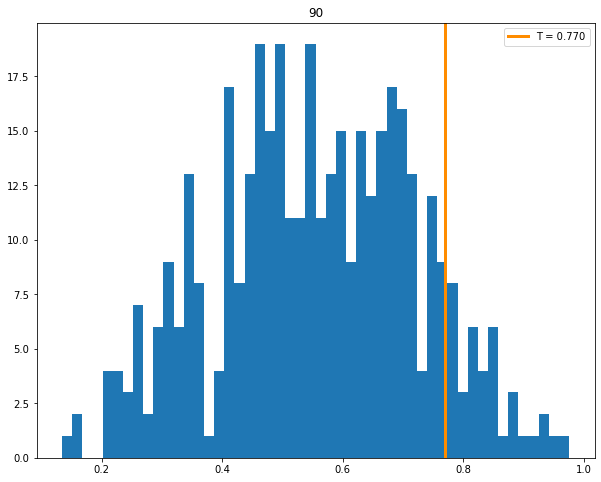

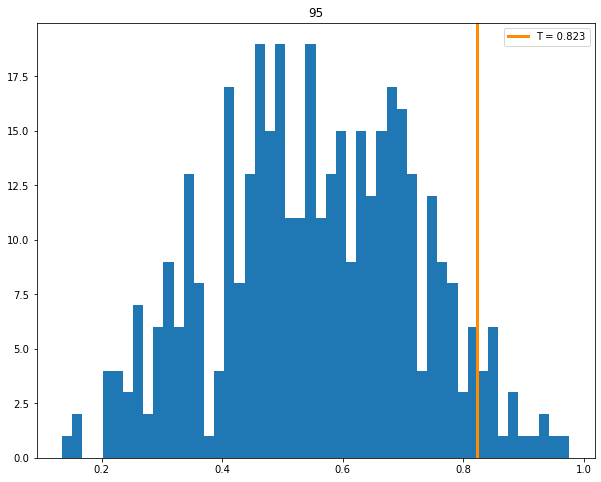

N =  450


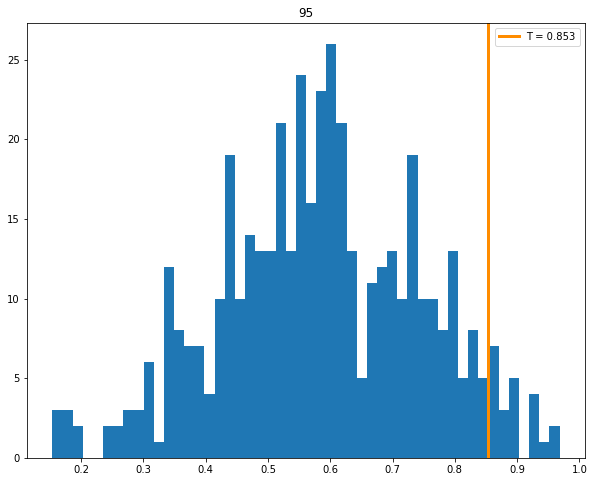

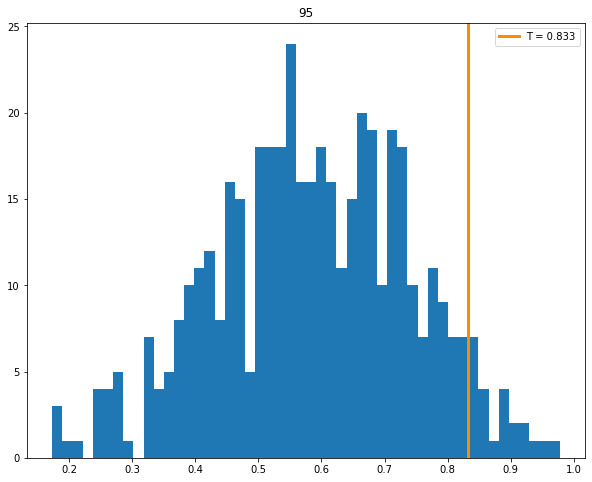

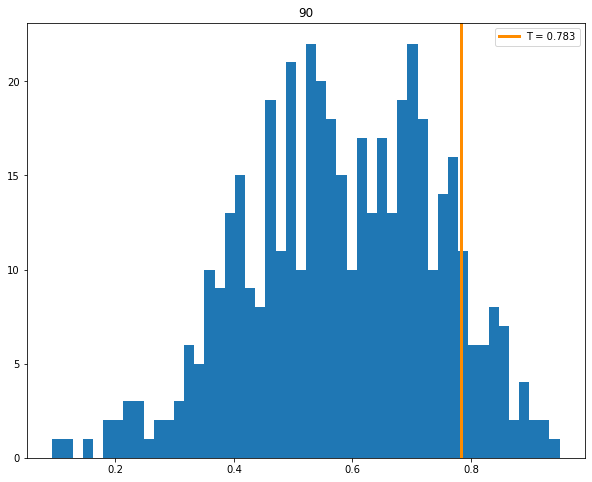

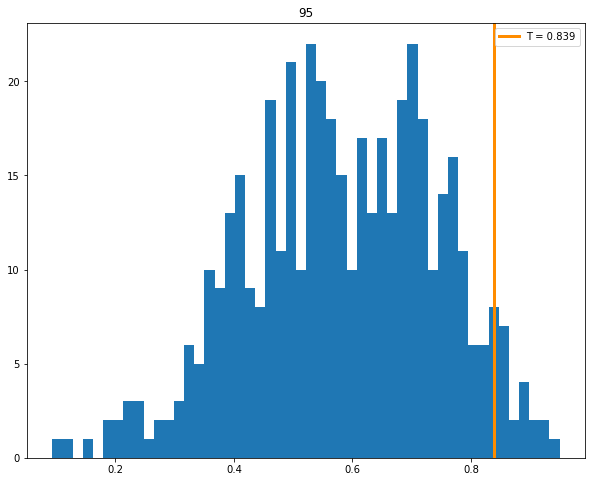

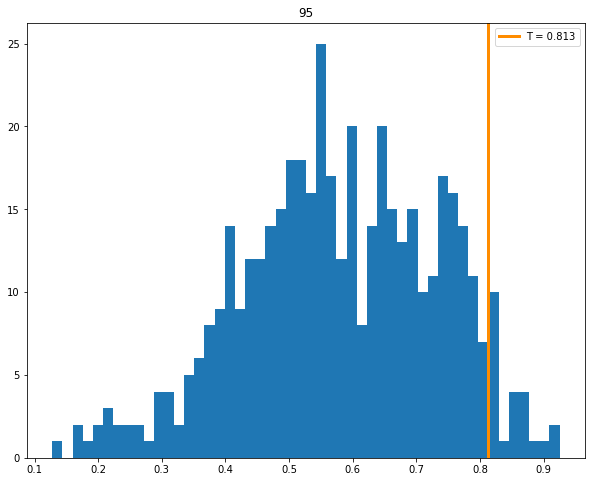

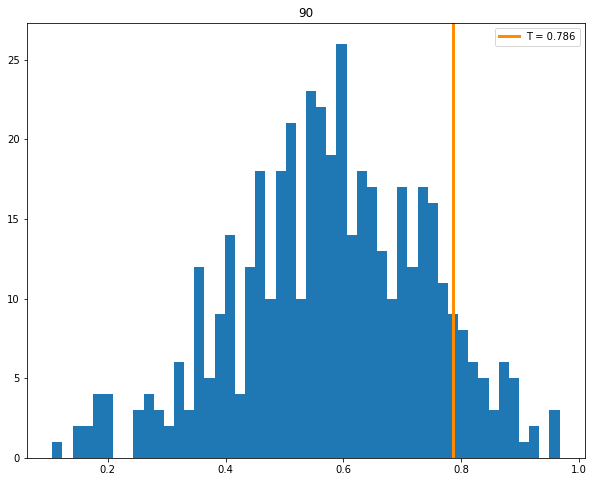

N =  500


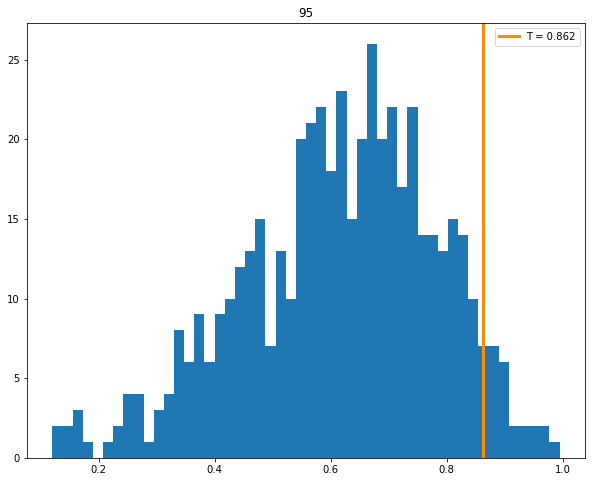

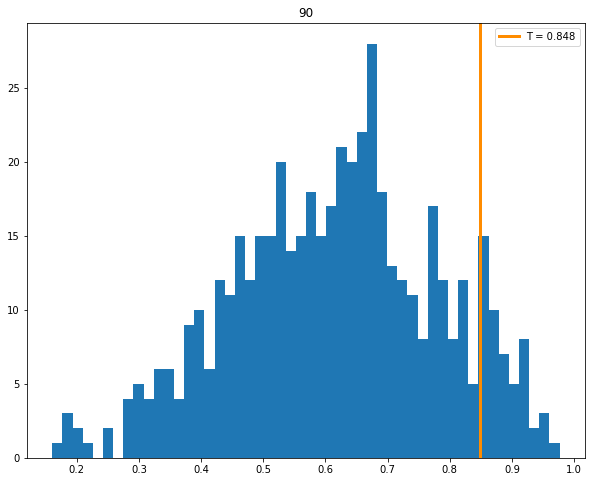

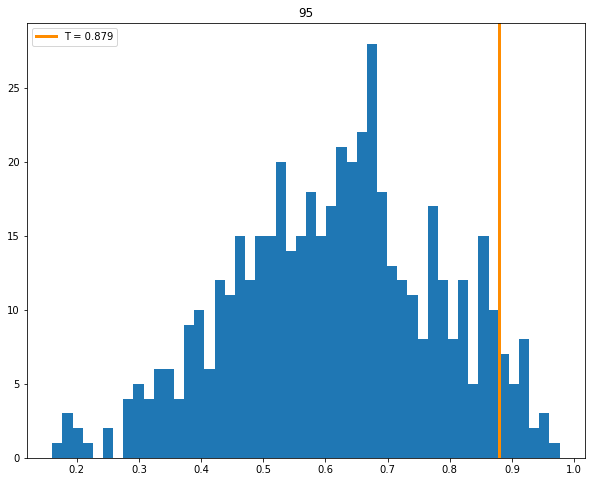

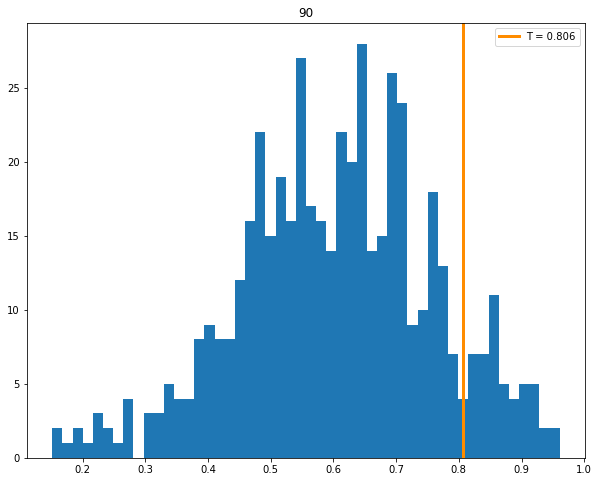

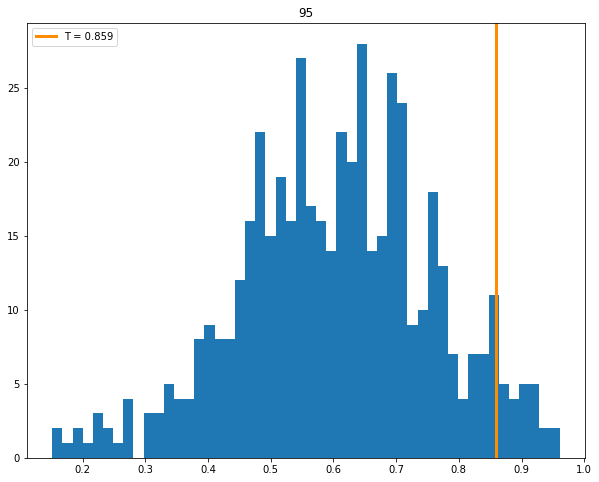

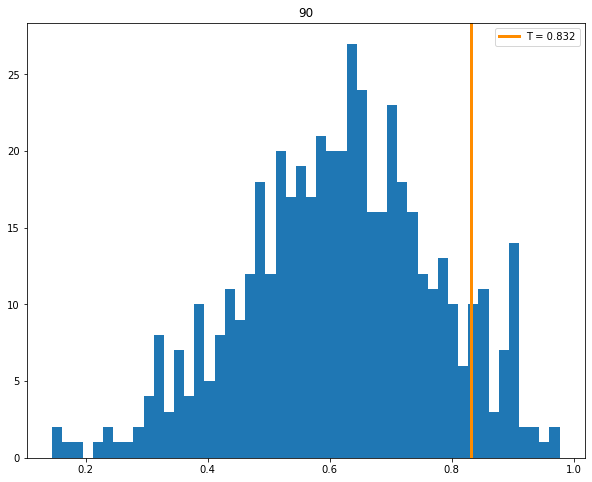

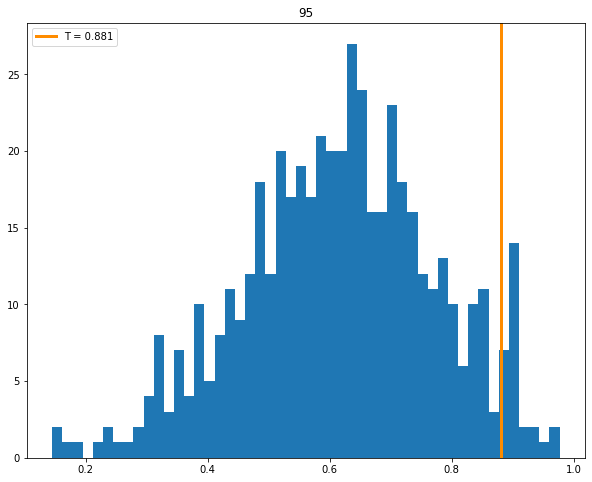

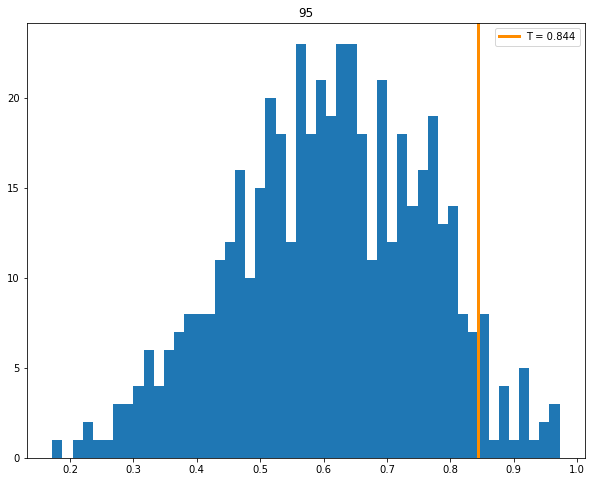

N =  550


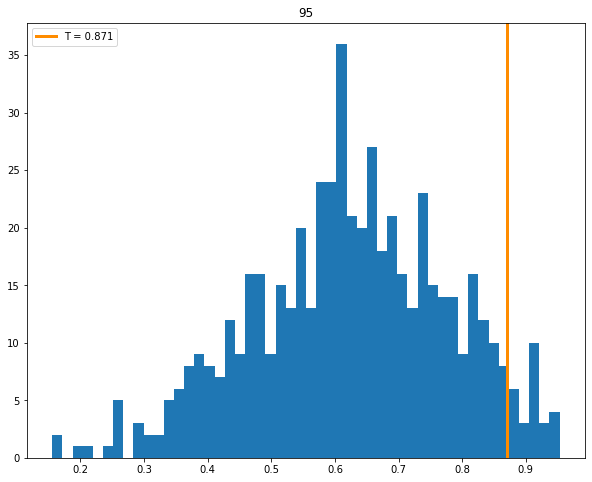

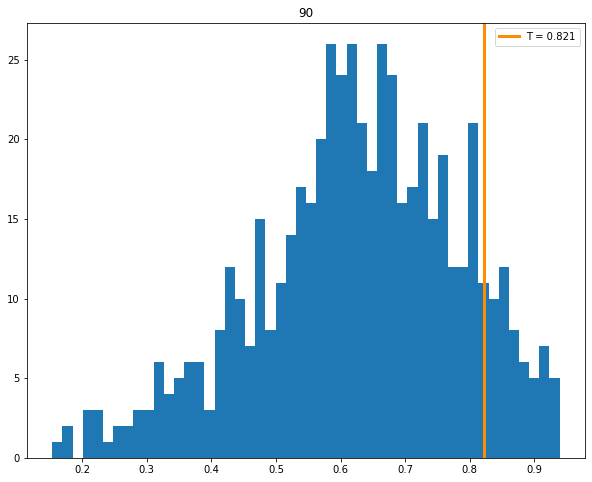

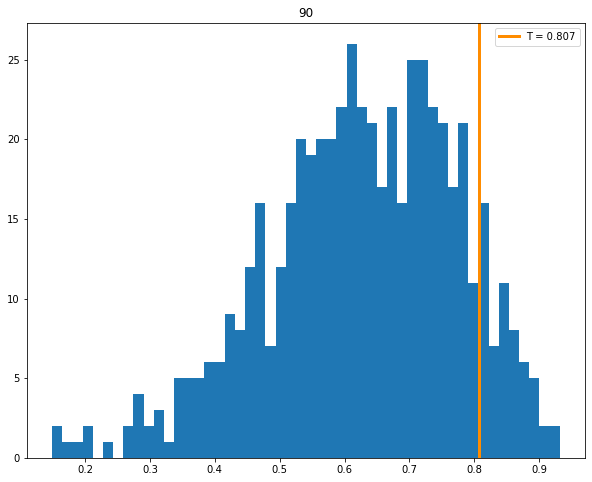

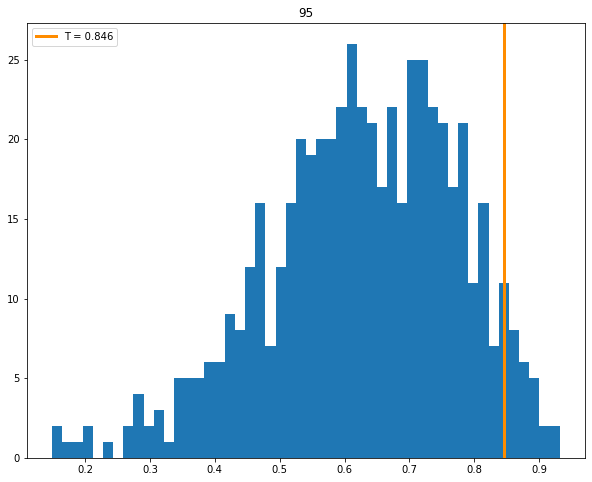

N =  600


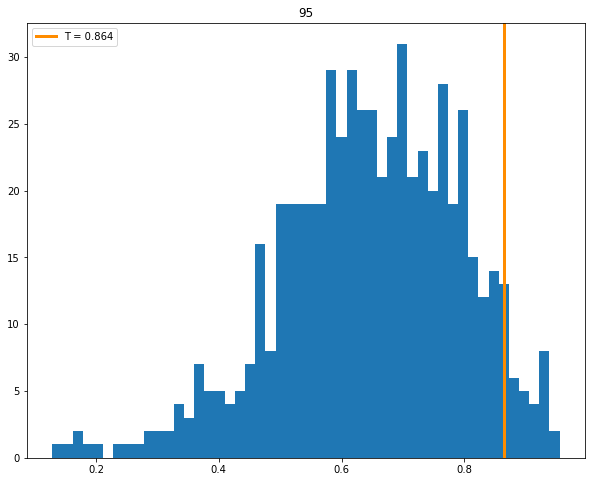

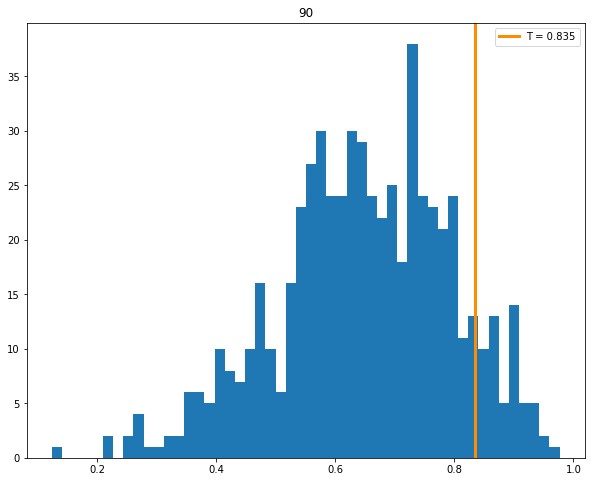

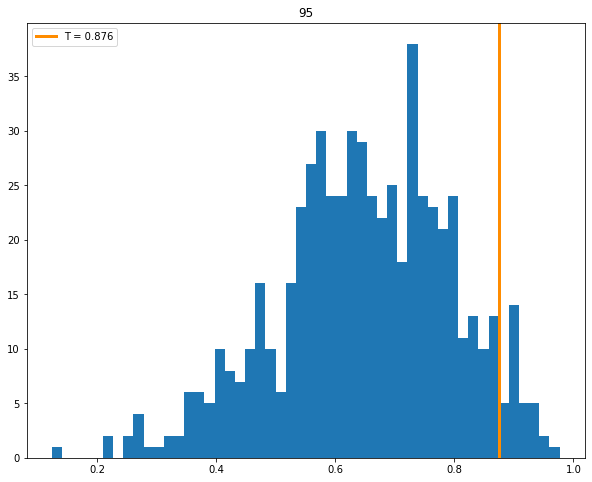

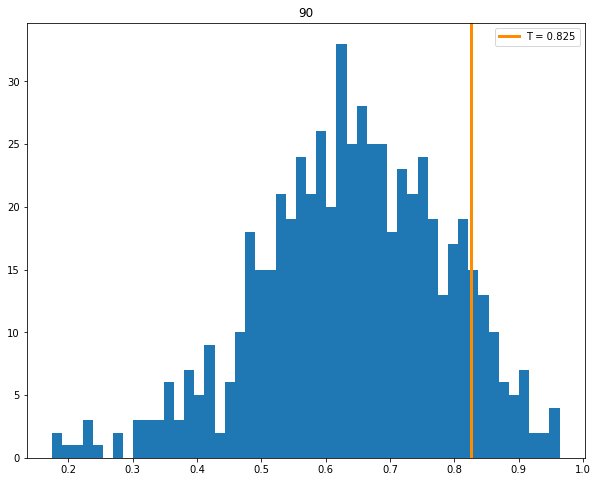

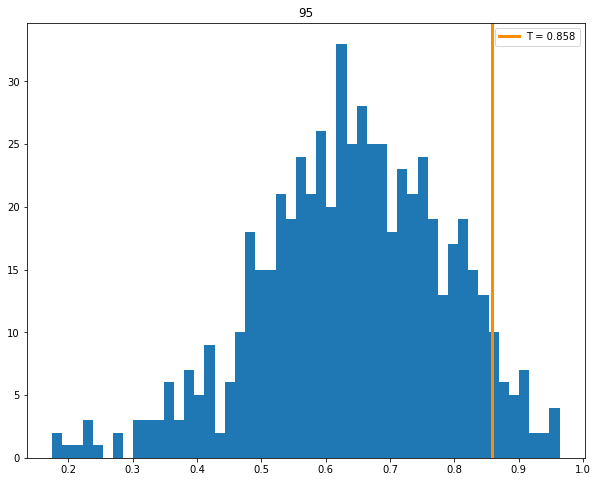

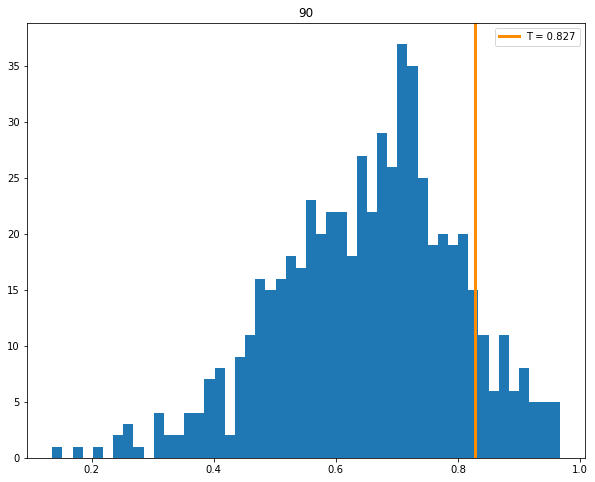

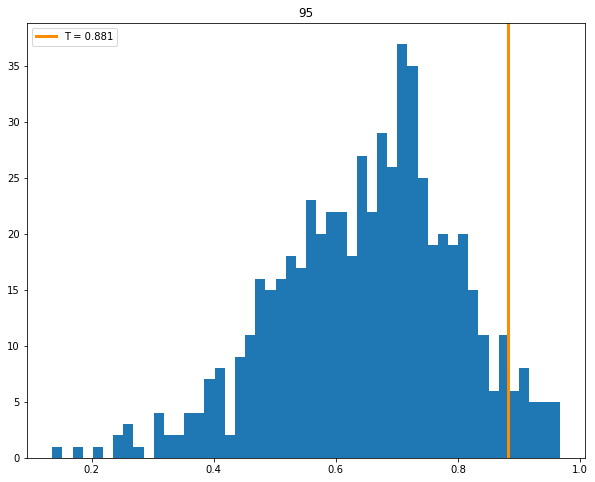

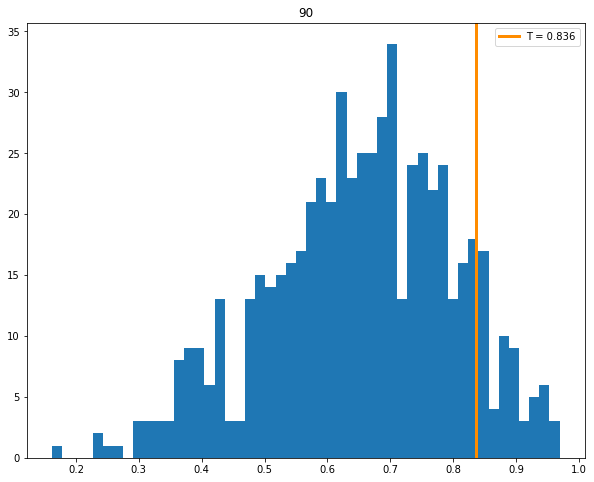

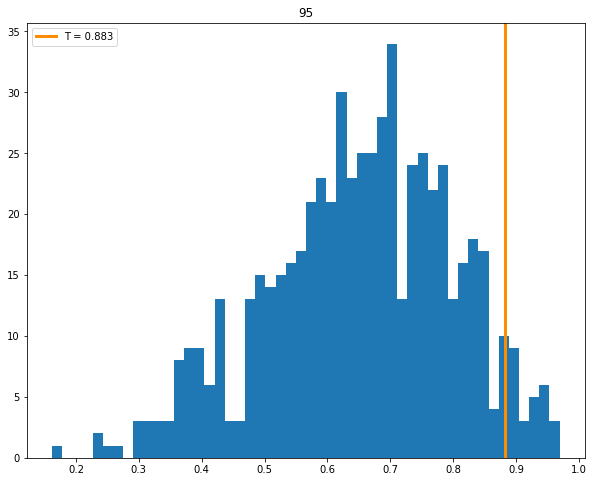

N =  650


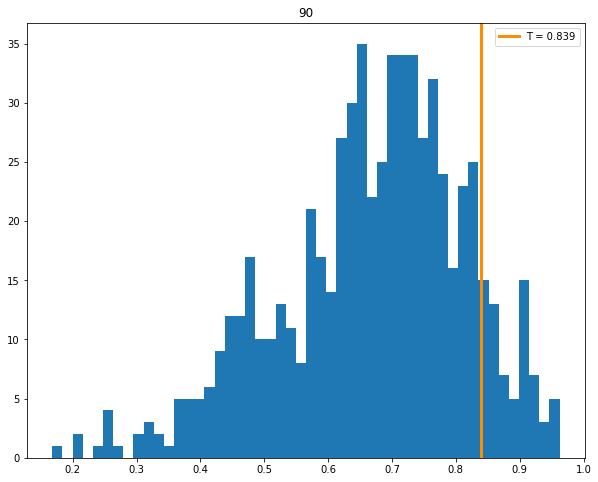

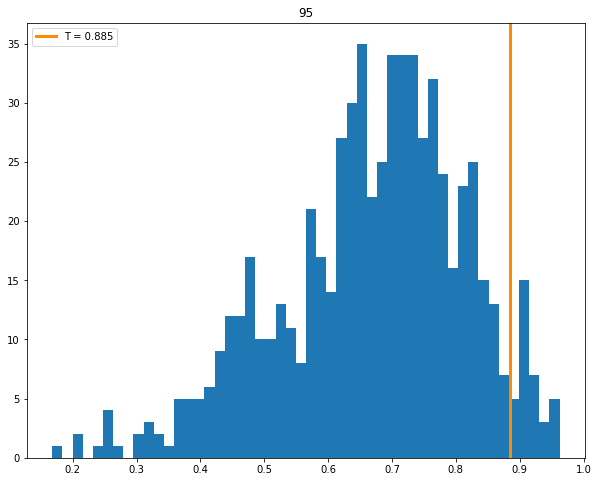

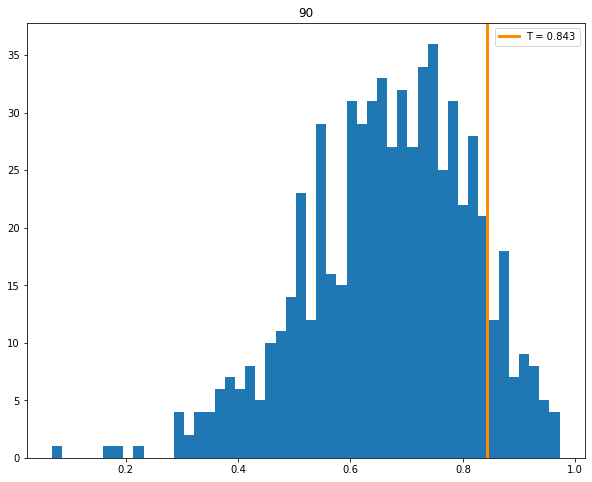

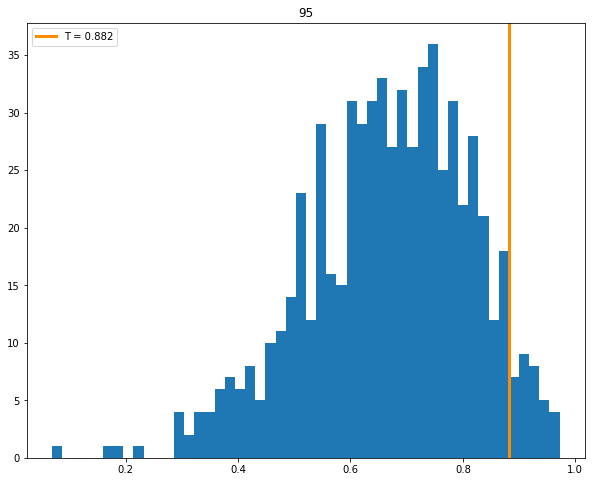

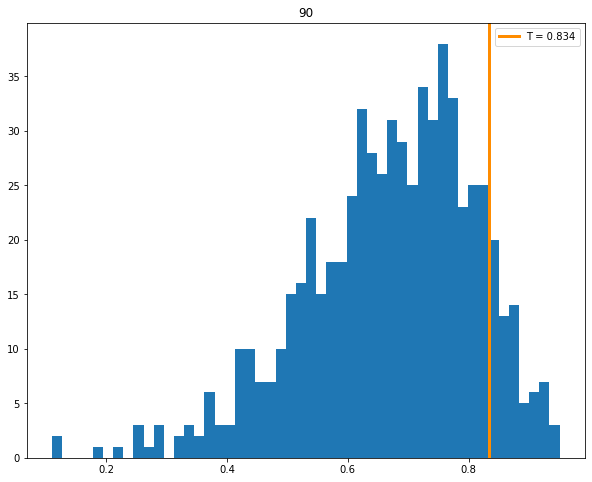

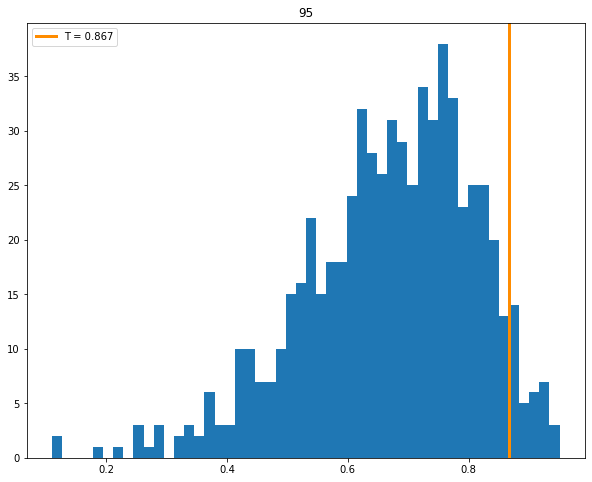

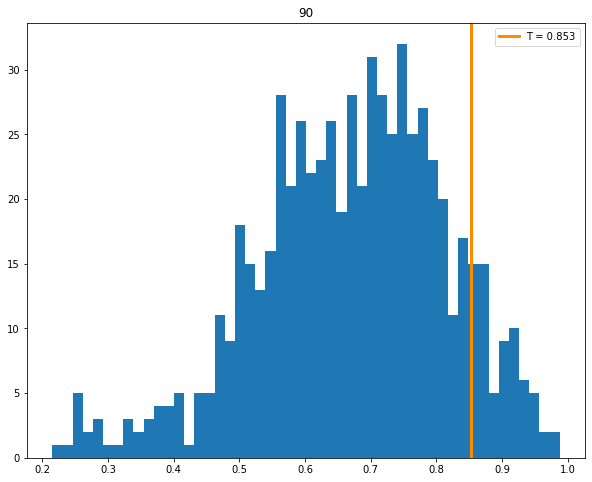

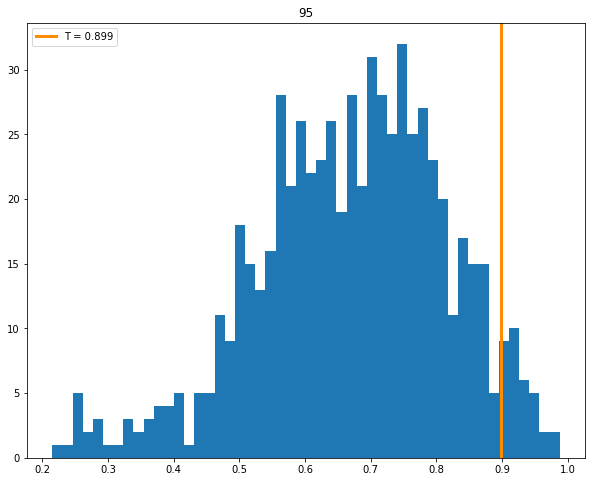

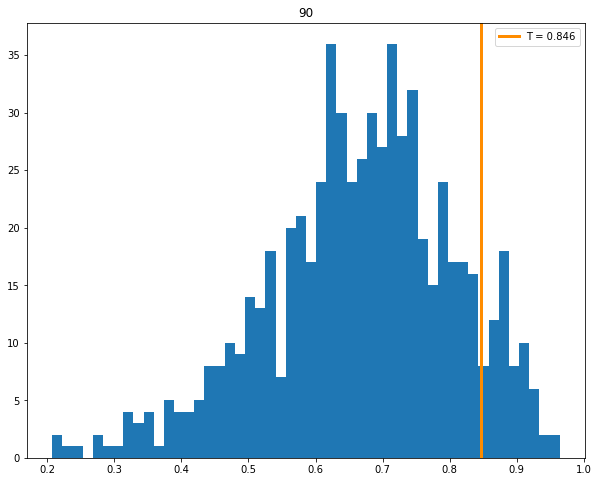

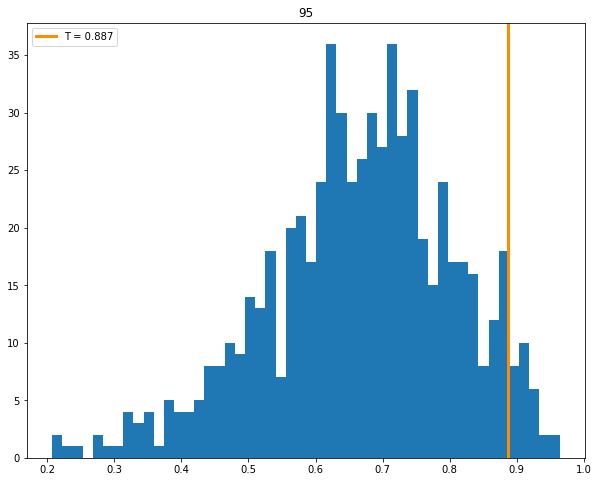

In [116]:
Sigma_s_s = [10, 55, 100]
Ns = np.arange(300, 651, 50).tolist()


all_T_av90 = []
all_T_av95 = []

for sigma_s in Sigma_s_s:
    print(sigma_s)
    T_N_av90 = []
    T_N_av95 = []
    for N in Ns:
        print('N = ', N)
        T90s = []
        T95s = []
        for i in range(5):
            T_90, T_95 = compute_T_90_95(N, sigma_s, x_lim = [0,2], y_lim = [0,2])
            T90s.append(T_90)
            T95s.append(T_95)
        T90s, T95s    = np.asarray(T90s), np.asarray(T95s)
        T_avg90 = np.mean(T90s)
        T_avg95 = np.mean(T95s)


        T_N_av90.append(T_avg90)
        T_N_av95.append(T_avg95)
        
    all_T_av90.append(T_N_av90)
    all_T_av95.append(T_N_av95)

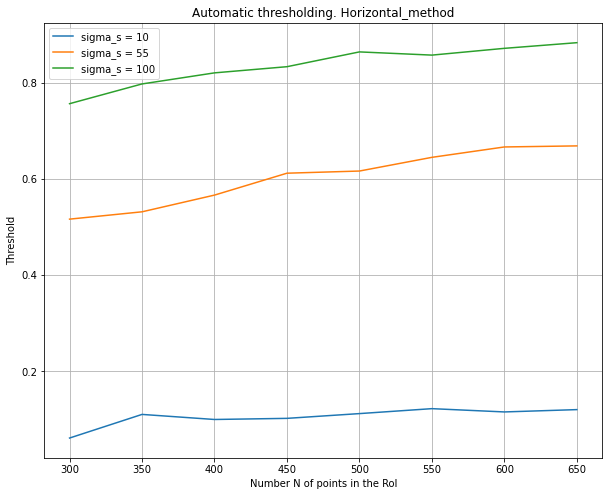

In [118]:
labels = ['sigma_s = ' + str(s) for s in Sigma_s_s]

x = Ns
plt.figure(figsize = (10,8))
for i, av in enumerate(all_T_av95):
    av = np.asarray(av)
    plt.plot(x,av, label = labels[i])

plt.title('Automatic thresholding. Horizontal_method')
plt.xlabel('Number N of points in the RoI')
plt.ylabel('Threshold')
plt.legend()
plt.grid()
plt.show()

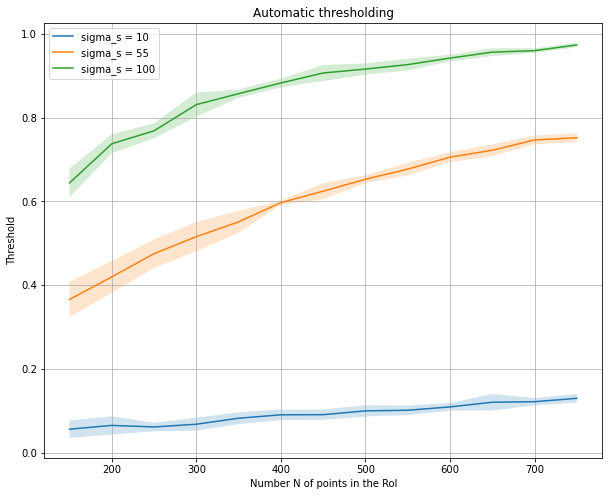

In [11]:

labels = ['sigma_s = ' + str(s) for s in Sigma_s_s]

x = Ns
plt.figure(figsize = (10,8))
for i, av in enumerate(all_T_av):
    av = np.asarray(av)
    sd = np.asarray(all_T_sd[i])
    plt.plot(x,av, label = labels[i])
    plt.fill_between(x, (av - sd), (av + sd), alpha=.2)

plt.title('Automatic thresholding')
plt.xlabel('Number N of points in the RoI')
plt.ylabel('Threshold')
plt.legend()
plt.grid()
plt.show()

## Voir la limitation que Manley redoute: 

In [66]:
param = Standard_Param()

param_NoNoise = Standard_Param()
param_NoNoise.NoisePercentage = 0

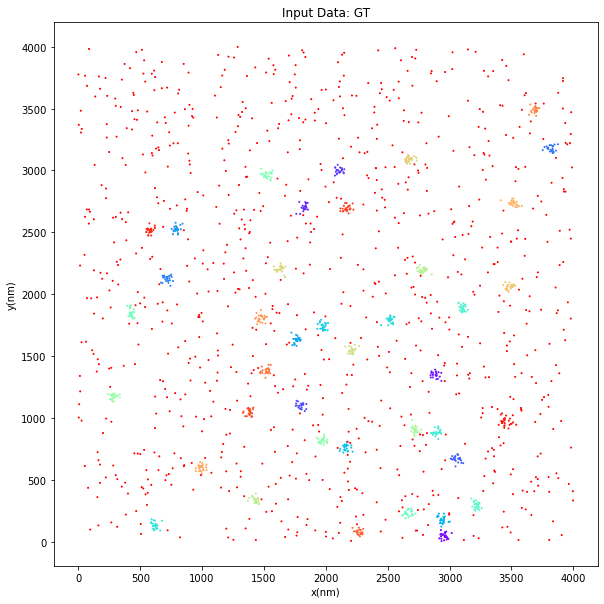

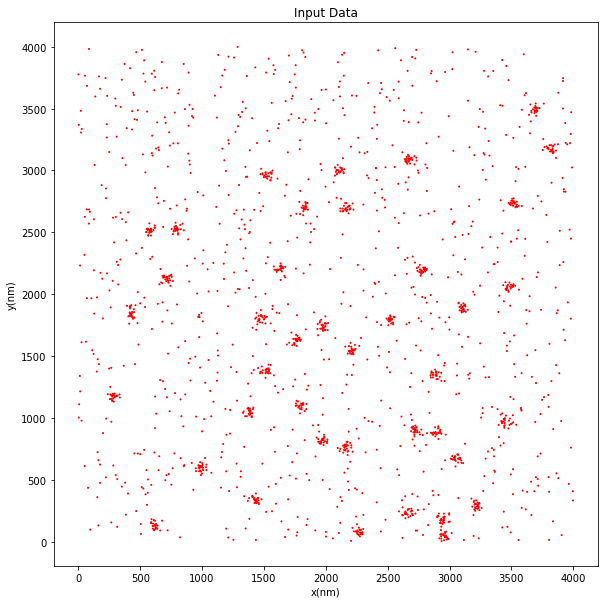

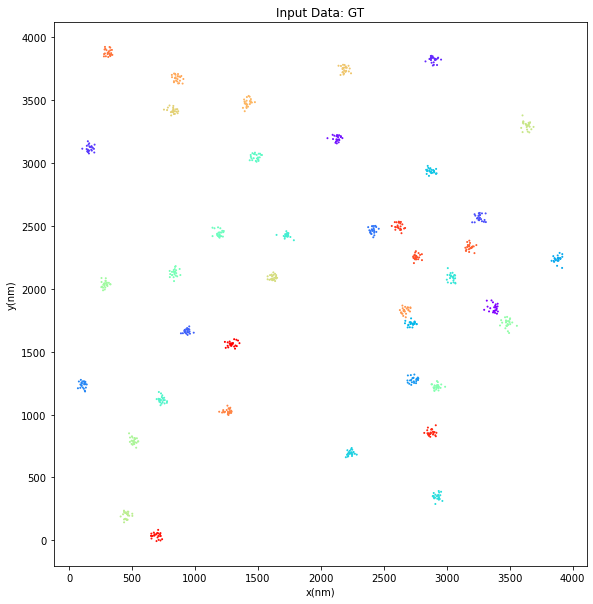

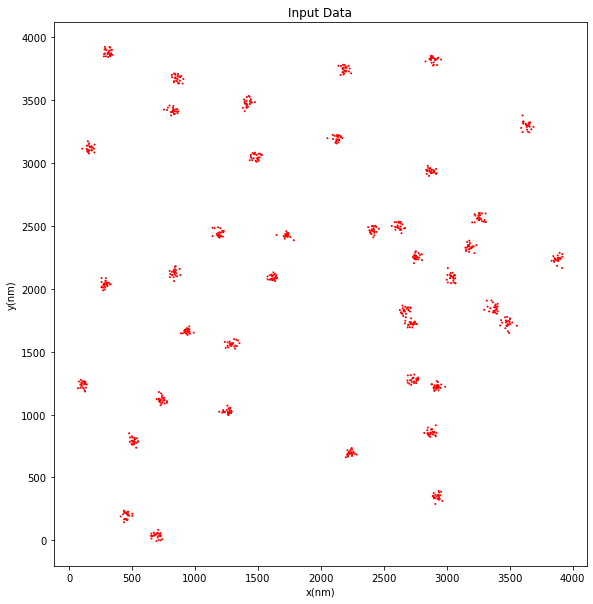

In [67]:
DataNoise = Call_DataGenerator(param)
DataNoise.plot_points()
DataNoNoise = Call_DataGenerator(param_NoNoise)
DataNoNoise.plot_points()

In [68]:
Noise_df = DataNoise.GetAllData()
N_Noise = len(DataNoise.GetPoints())
NoNoise_df = DataNoNoise.GetAllData()
N_NoNoise = len(DataNoNoise.GetPoints())
sigma_s = 35.0

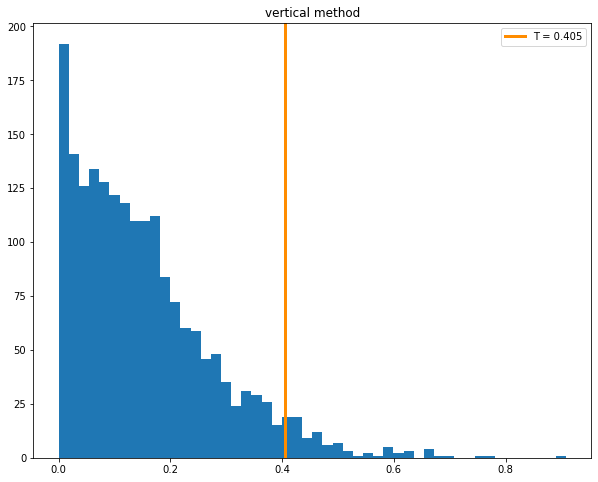

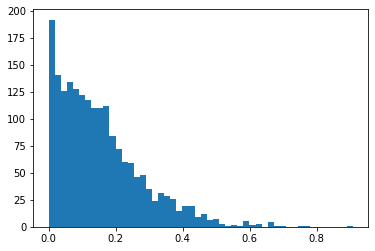

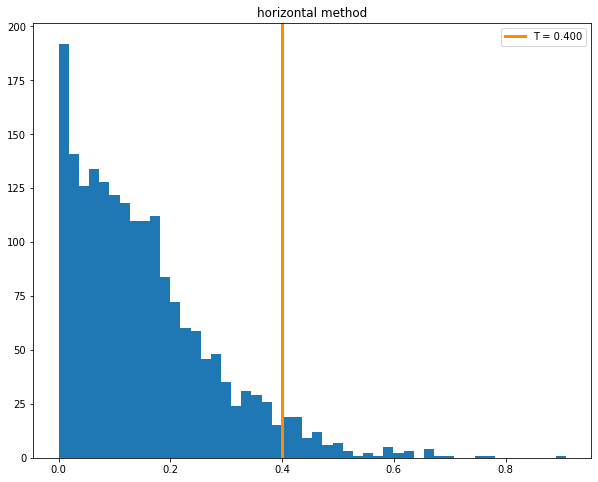

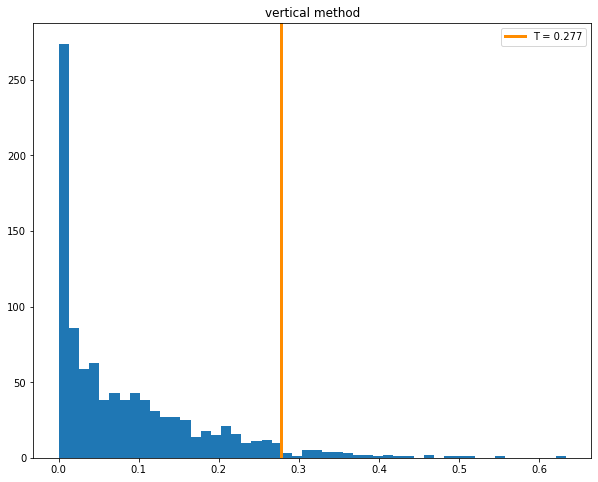

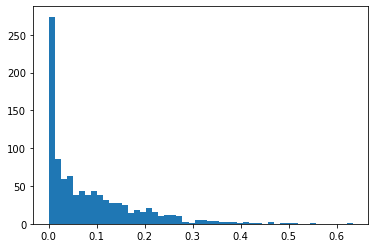

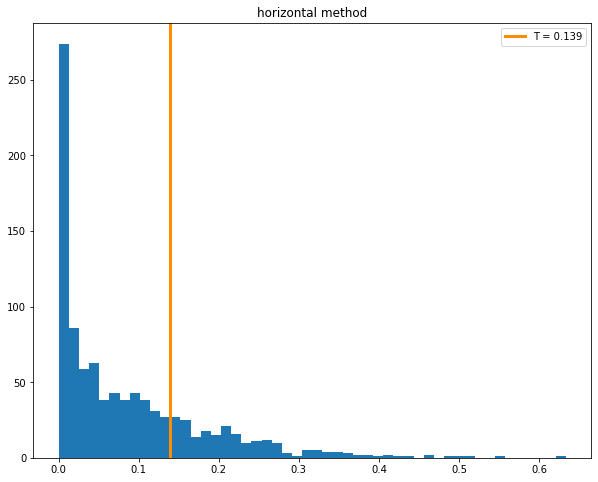

In [72]:
T_Noise, poubelle = compute_T(N_Noise, sigma_s)
T_NoNoise, poubelle = compute_T(N_NoNoise, sigma_s)

In [56]:
print('T_noise = ', T_Noise)
print('T_NoNoise = ', T_NoNoise)

T_noise =  0.40848280982367563
T_NoNoise =  0.2758114551728531


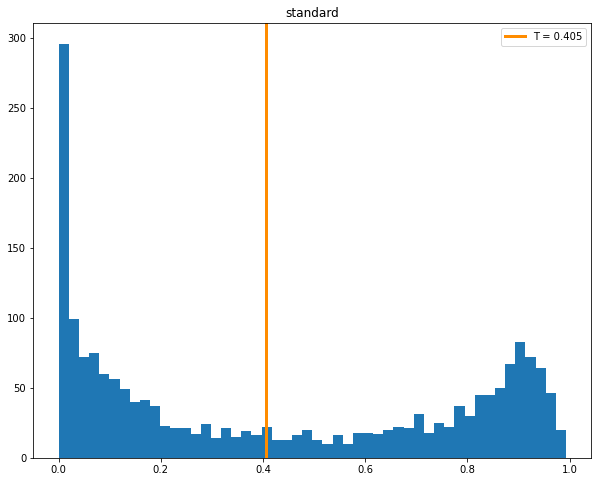

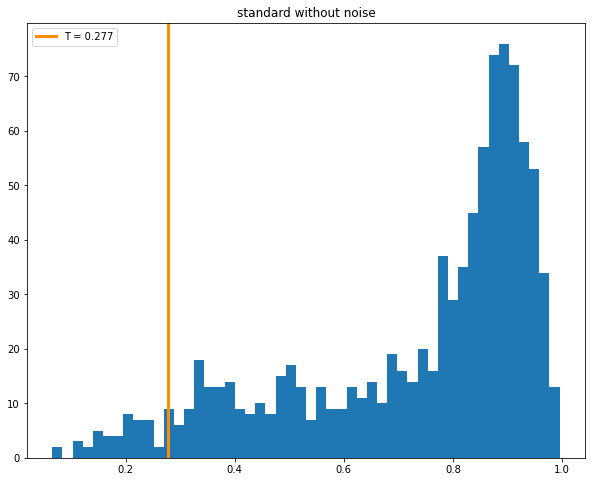

In [74]:
P_Noise = Noise_df[['x', 'y']].to_numpy()
P_NoNoise = NoNoise_df[['x', 'y']].to_numpy()

Sigma1          = np.ones((P_Noise.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P_Noise.shape[0], 1)).ravel()

density_Noise, G = compute_density(P_Noise, Sigma1, sigma_s)
see_histogram(density_Noise, T_Noise, 'standard')

Sigma1          = np.ones((P_NoNoise.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P_NoNoise.shape[0], 1)).ravel()

density_noNoise, G = compute_density(P_NoNoise, Sigma1, sigma_s)
see_histogram(density_noNoise, T_NoNoise, 'standard without noise')



T_Noise =  0.48199720541797286
T_NoNoise =  0.31839390778532173


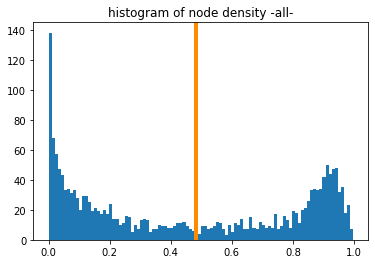

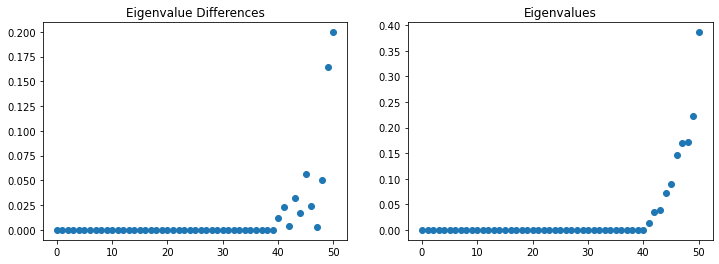

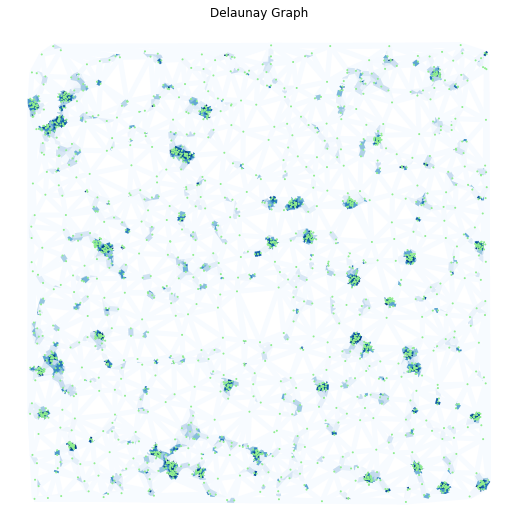

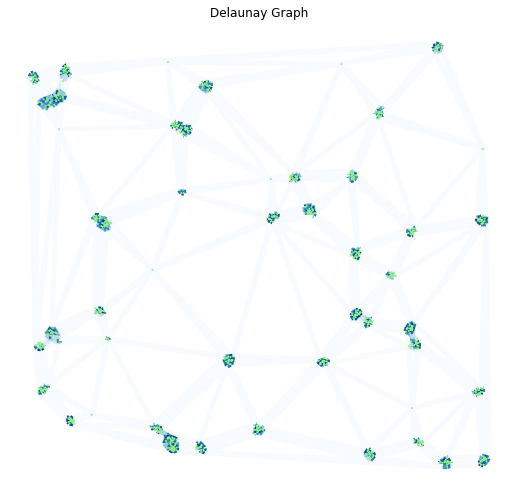

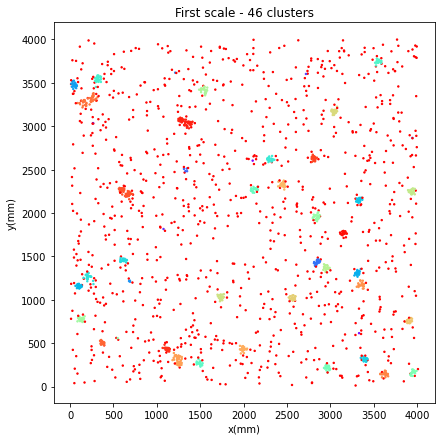

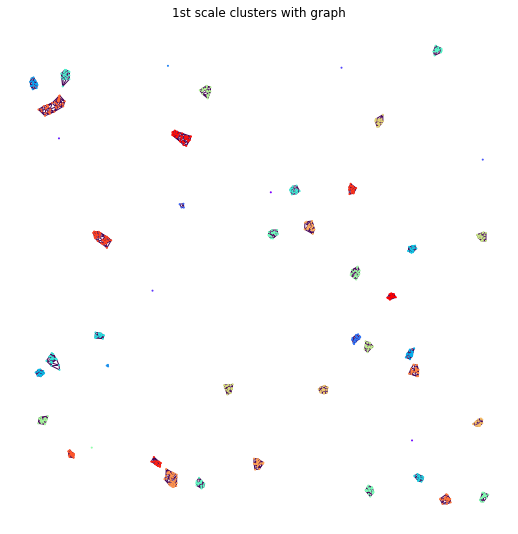

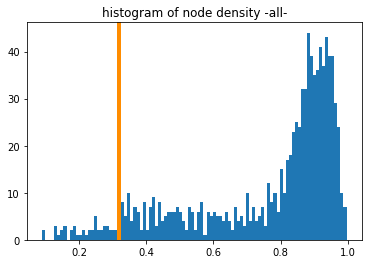

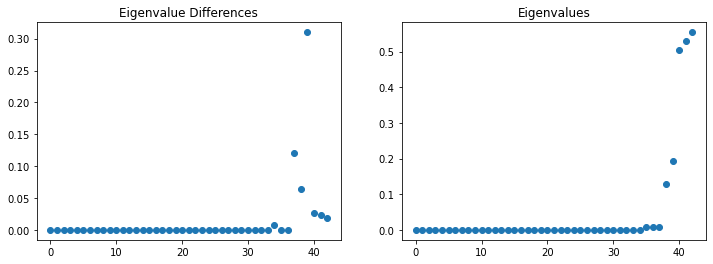

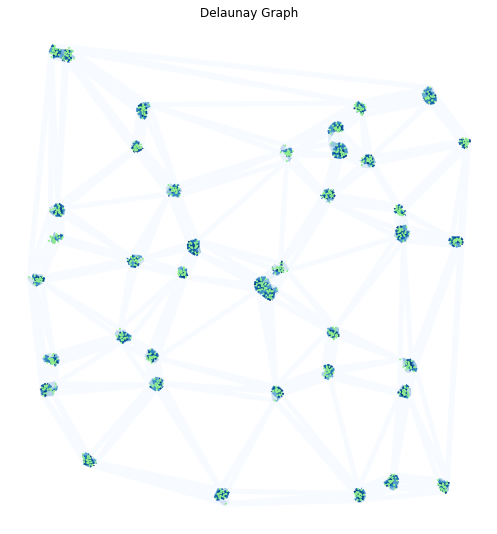

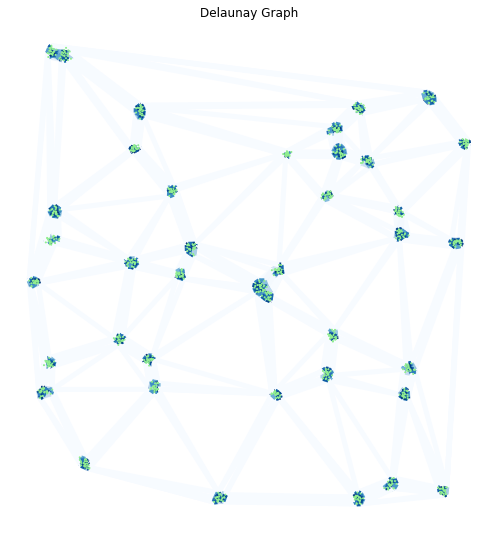

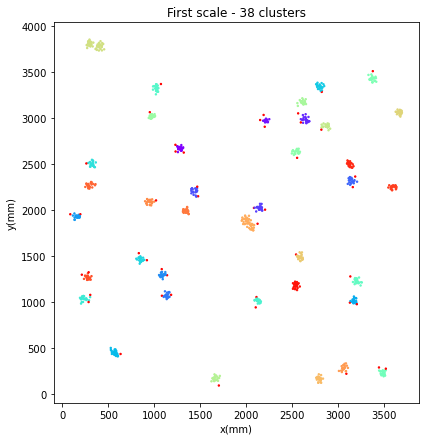

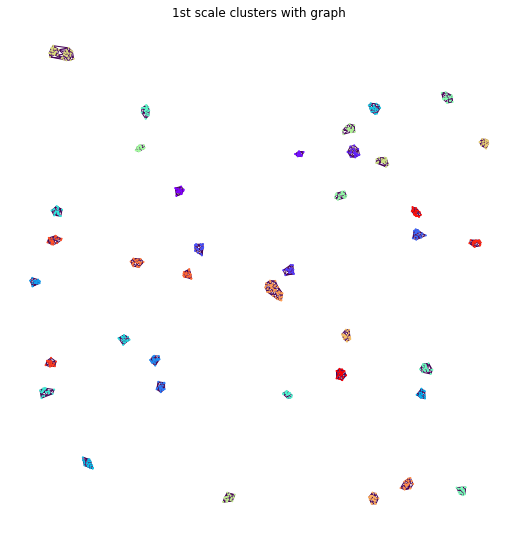

In [49]:
# CA CA A éTé OBTENU AVEC SIGMA_S = 40.0

# - T_noise =  0.48199720541797286
# - T_NoNoise =  0.31839390778532173

T_Noise =  0.4048880293696683
T_NoNoise =  0.2773844982933877


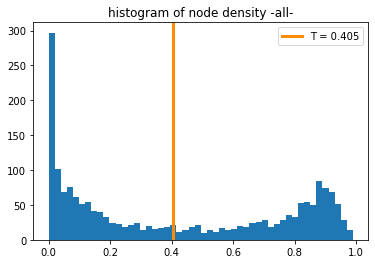

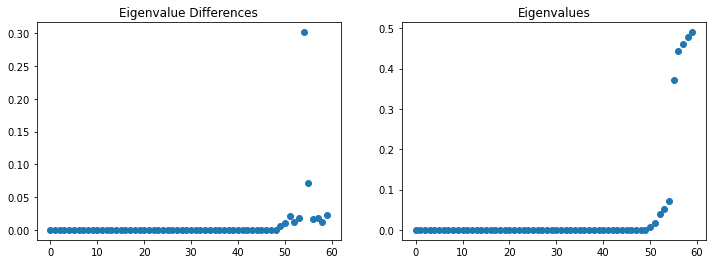

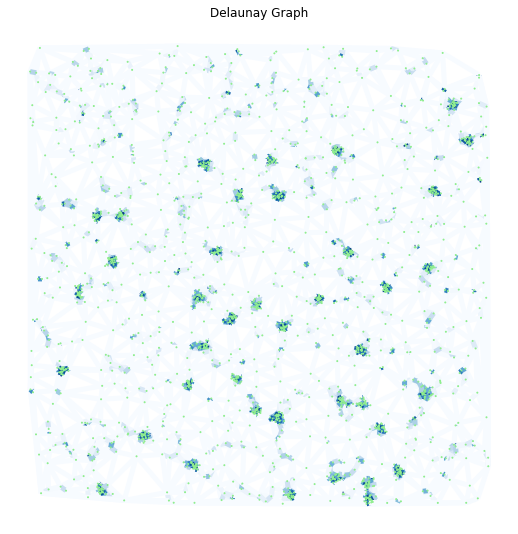

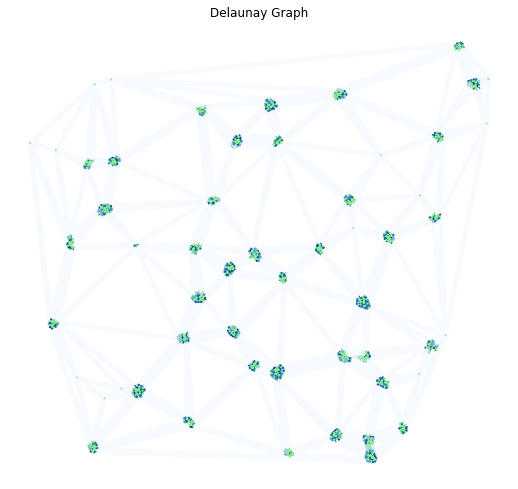

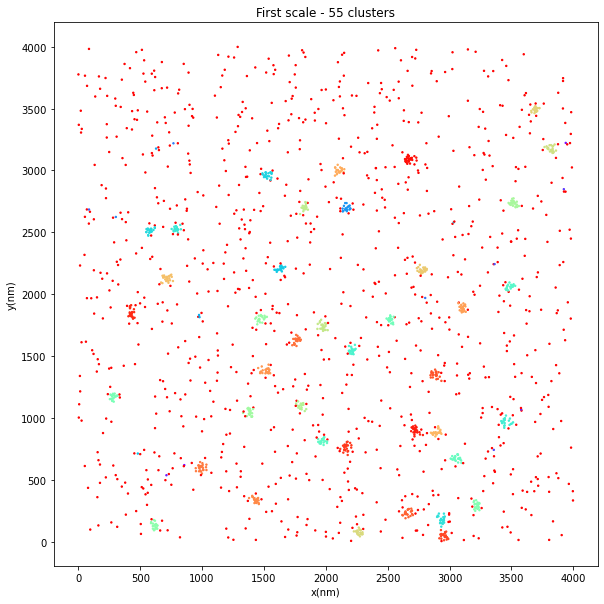

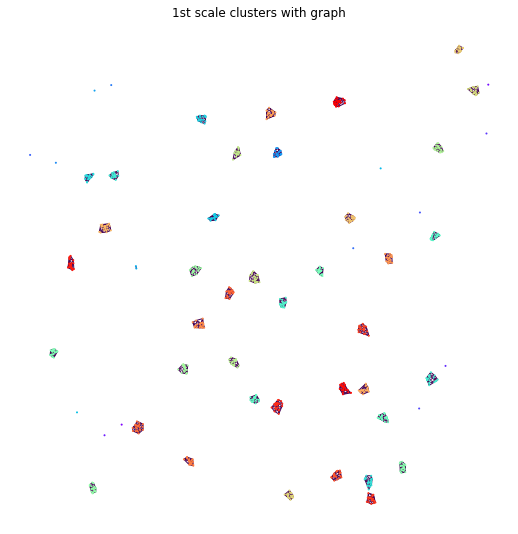

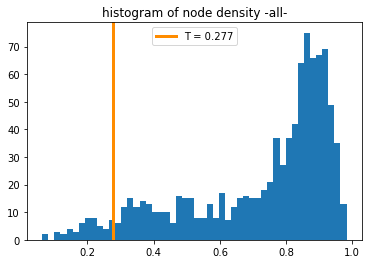

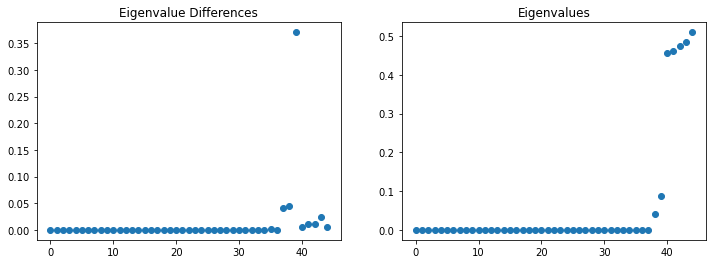

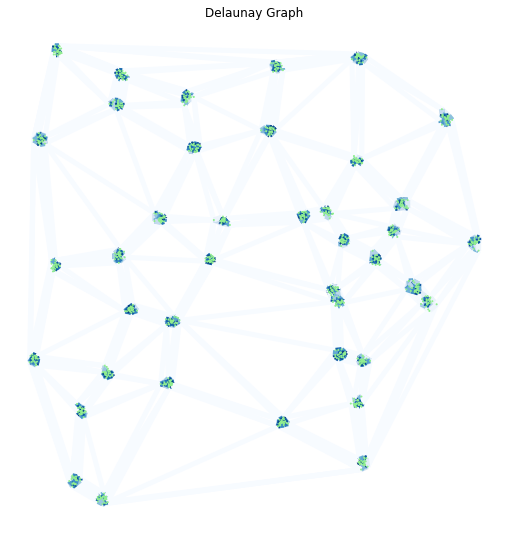

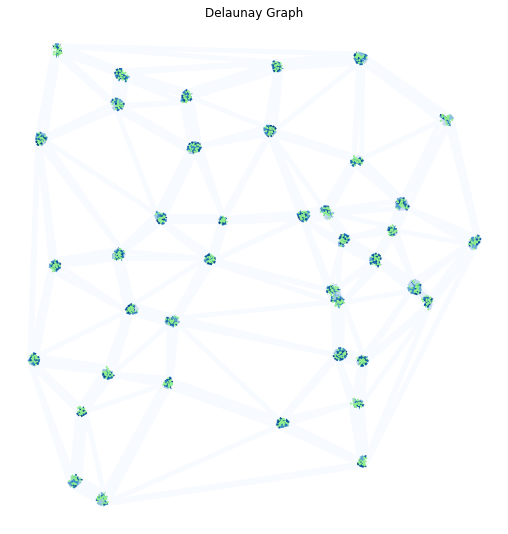

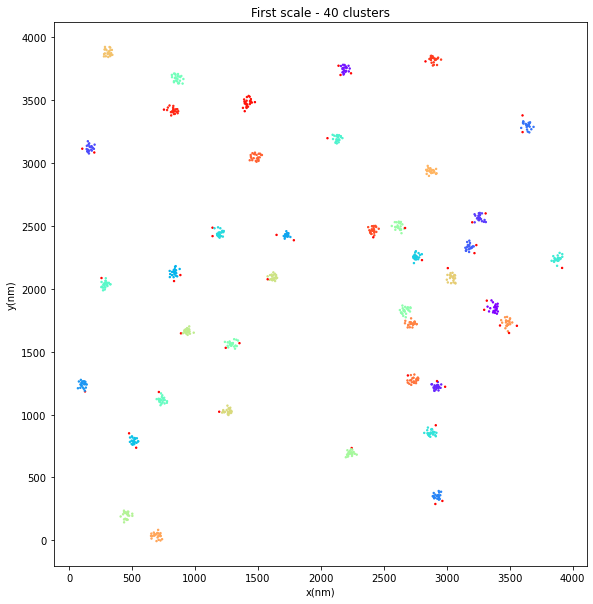

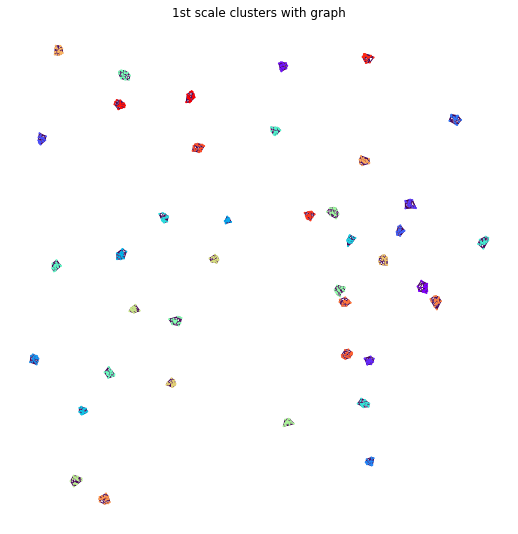

In [75]:
# Avec sigma = 35
print('T_Noise = ', T_Noise)
print('T_NoNoise = ', T_NoNoise)
labels_Noise = calling_graphic(Noise_df, sigma_s, T_Noise)
labels_Noise = calling_graphic(NoNoise_df, sigma_s, T_NoNoise)

In [60]:
# EXACTEMENT LES MEMES DONNéES MAIS AVEC UN SIGMA PLUS PETIT. 
sigma_s = 25.0
T_Noise = compute_T(N_Noise, sigma_s)
T_NoNoise = compute_T(N_NoNoise, sigma_s)

T_Noise =  0.27420449667372176
T_NoNoise =  0.1666346050355632


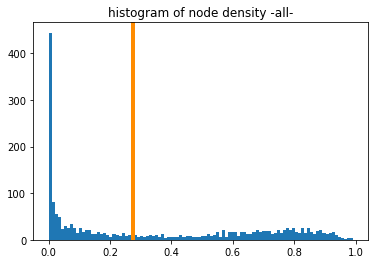

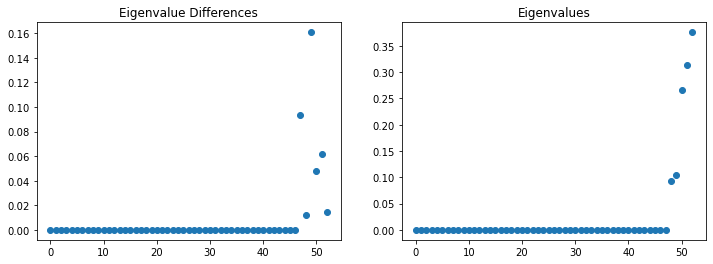

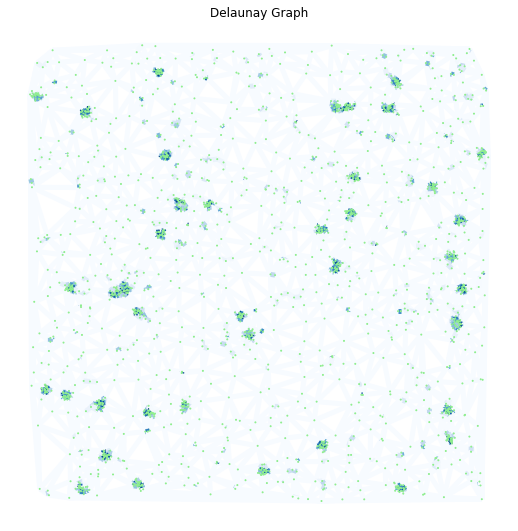

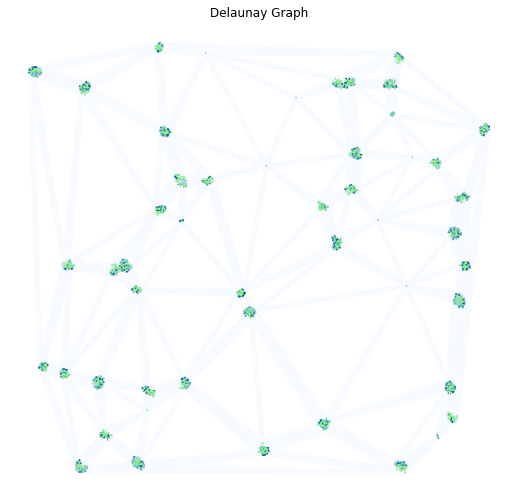

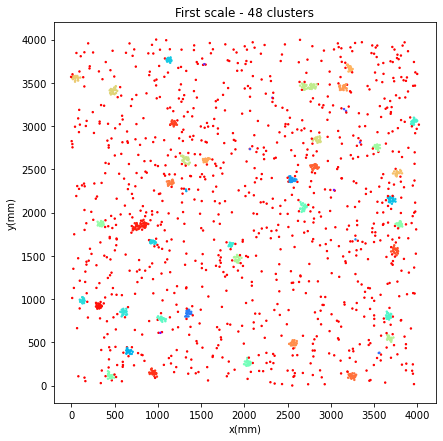

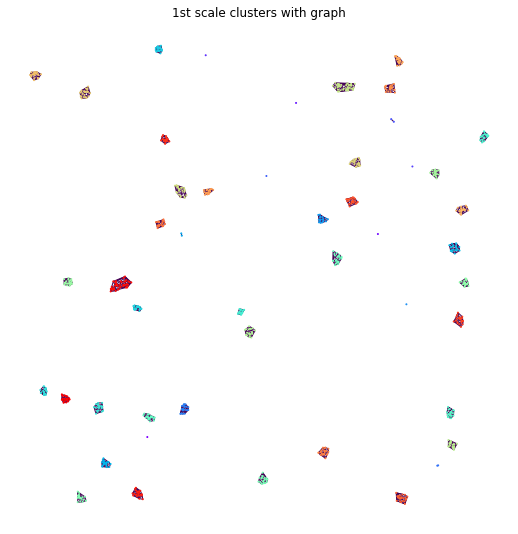

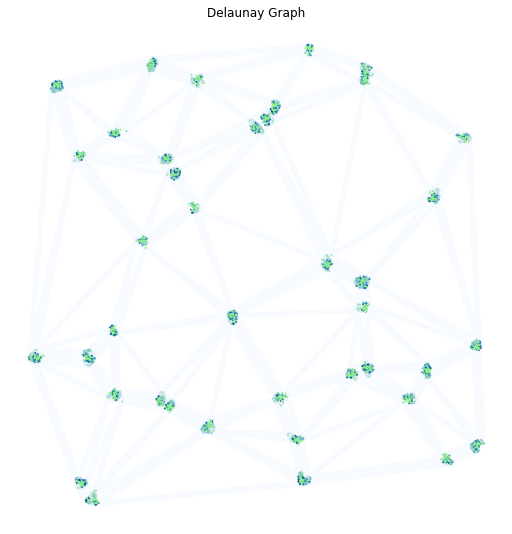

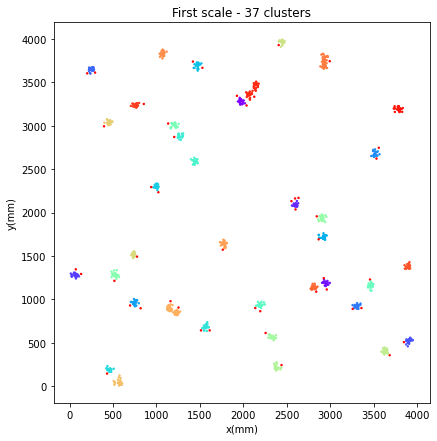

In [61]:
# Avec sigma = 25
print('T_Noise = ', T_Noise)
print('T_NoNoise = ', T_NoNoise)
labels_Noise = calling_graphic(Noise_df, sigma_s, T_Noise)
labels_Noise = calling_graphic(NoNoise_df, sigma_s, T_NoNoise)

In [76]:
# Another extreme situation that does not really make any sense

In [4]:
pcr = Standard_Param(NumberOfClusters = 100)
pcr.NoisePercentage = 0
pcr.x_lim = [0,2]
pcr.y_lim = [0,2]
DataCrowded = Call_DataGenerator(pcr)
DataCrowded.plot_points()

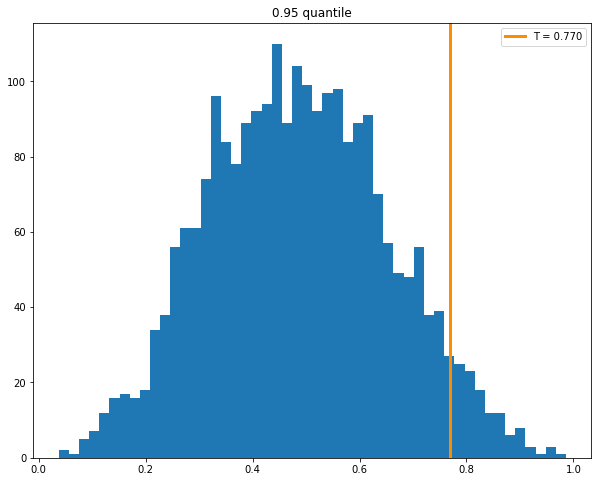

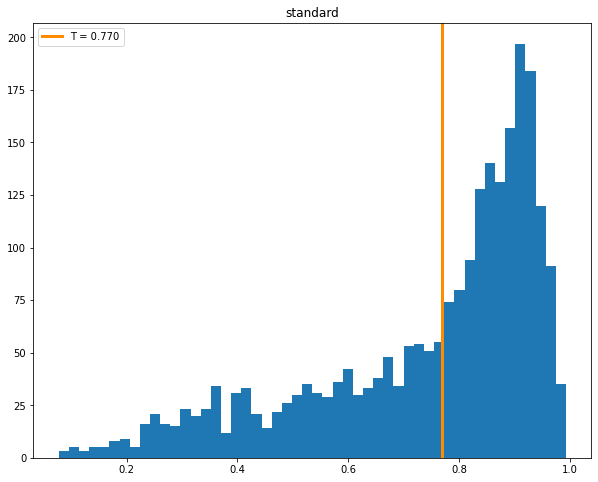

In [6]:
crowded_df = DataCrowded.GetAllData()
N_crowded = len(DataCrowded.GetPoints())

sigma_s = 35.0

T_crowded = compute_T_95(N_crowded, sigma_s = sigma_s, x_lim = [0,2], y_lim= [0,2])


P_crowded = crowded_df[['x', 'y']].to_numpy()

Sigma1          = np.ones((P_crowded.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P_crowded.shape[0], 1)).ravel()

density_crowded, G = compute_density(P_crowded, Sigma1, sigma_s)
see_histogram(density_crowded, T_crowded, 'standard')

In [7]:
T_crowded

0.7700123943656837

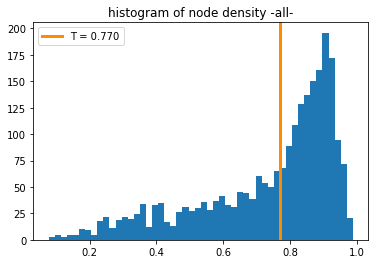

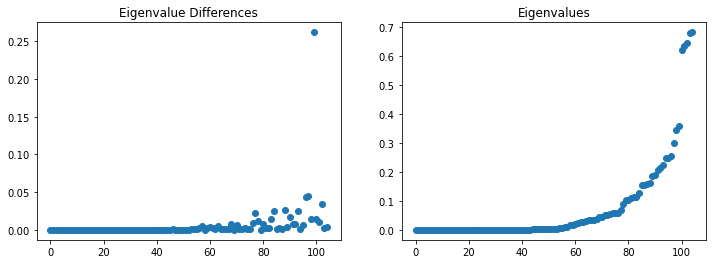

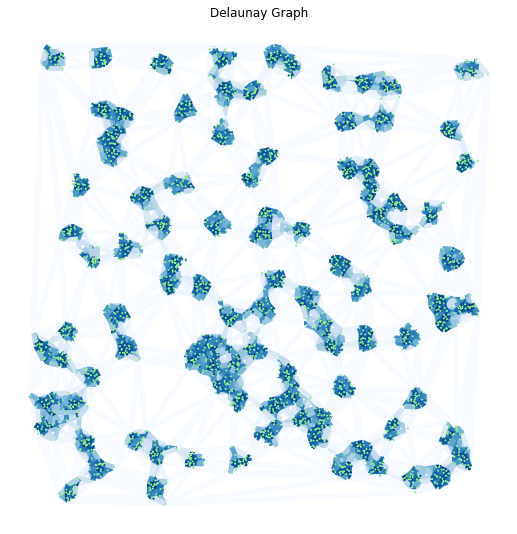

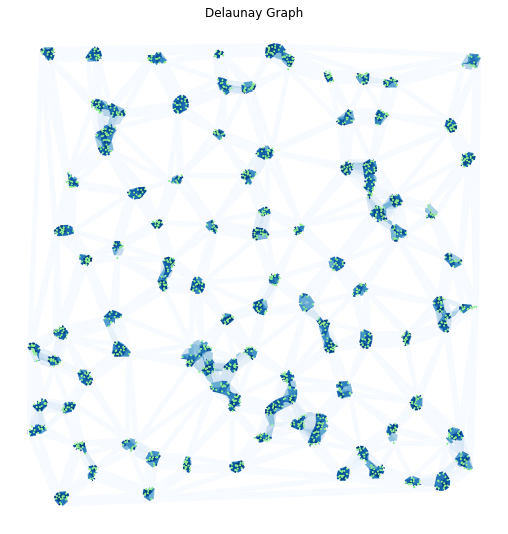

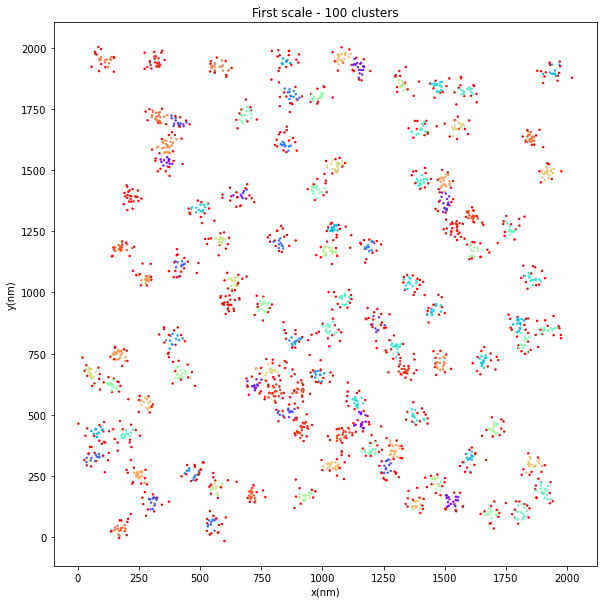

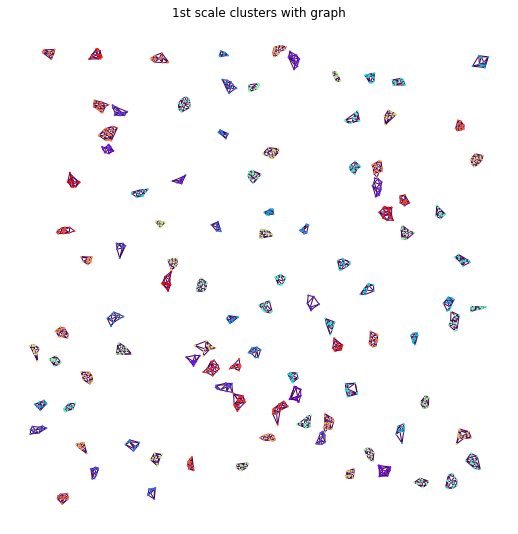

In [8]:
labels_crowded = calling_graphic(crowded_df, sigma_s, T_crowded)

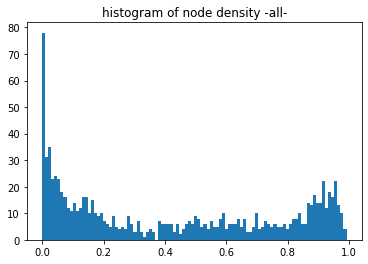

In [86]:
data_cluster = datagen.GetAllData()
P = data_cluster[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
truelabels = data_cluster['labels_1'].to_numpy()

Sigma1          = np.ones((P.shape[0], 2, 2)) * 0.5
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P.shape[0], 1)).ravel()

density1, G0 = see_histogram(P, Sigma1, sigma_s)

In [ ]:
def plot_with_error(distances, y_avg, y_std, NumberOfSim = 30,
                    title = 'Power Of Seperation',
                    xlabel = 'distance [nm]',
                    ylabel = 'FMI'):
    x = distances
    y_avg = np.asarray(y_avg)
    y_std = np.asarray(y_std) / np.sqrt(NumberOfSim) 
    plt.plot(x,y_avg, color ='b', label='GrapHiC')
    plt.fill_between(x, (y_avg - y_std), (y_avg + y_std), color='b', alpha=.1)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

New method: with quantile. THreshold at 90% or 95% of the points. 

In [99]:
csr = CsrGenerator(N=2000)
data = csr.GetAllData()
P = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
truelabels = data['labels_1'].to_numpy()

Sigma1          = np.ones((P.shape[0], 2, 2)) * 0
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P.shape[0], 1)).ravel()

density_csr, G0 = compute_density(P, Sigma1, sigma_s)

In [108]:
res = np.quantile(density_csr, 0.5)

In [109]:
res

0.13035068328045135

In [110]:
np.median(density_csr)

0.13035068328045135

(array([638., 543., 342., 229., 116.,  68.,  38.,  16.,   6.,   4.]),
 array([5.21026018e-06, 7.80780322e-02, 1.56150854e-01, 2.34223676e-01,
        3.12296498e-01, 3.90369320e-01, 4.68442142e-01, 5.46514964e-01,
        6.24587786e-01, 7.02660608e-01, 7.80733430e-01]),
 <BarContainer object of 10 artists>)

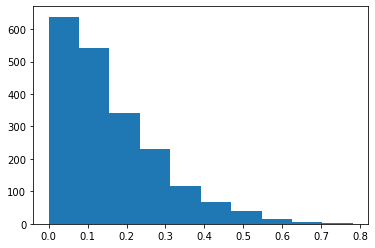

In [107]:
plt.hist(density_csr)